# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,  roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

##Loading the dataset

In [ ]:
df_main = pd.read_csv("INNHotelsGroup.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Data Overview

- Observations
- Sanity checks

###View the first and last 5 rows of  the dataset.

In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

Checking unique values of each columns with string data type.

In [ ]:
#checking unique values for type meal plan
meal_plan = data['type_of_meal_plan'].unique()
#checking unique values for room_type_reserved
room_type_reserved = data['room_type_reserved'].unique()
#checking unique values for market_segment_type
market_segment_type = data['market_segment_type'].unique()
#checking unique values for booking_status
booking_status = data['booking_status'].unique()
print('type_of_meal_plan values are',meal_plan)
print('room_type_reserved unique values are',room_type_reserved)
print('market_segment_type unique values are',market_segment_type)
print('booking_status unique values are',booking_status)

type_of_meal_plan values are ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved unique values are ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type unique values are ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status unique values are ['Not_Canceled' 'Canceled']


In [ ]:
data['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [ ]:
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
data = data.drop('Booking_ID', axis=1)  # Remove 'Booking_ID' column (axis=1 for columns)

###Understand the shape of the data

In [ ]:
data.shape

(36275, 18)

###Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

###Checking for missing values

In [ ]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- no missing values in data set.

###Dropping duplicate values

In [ ]:
data.duplicated().sum()

10275

- 10275 duplicated rows in data set

###Statistical summary of data.

In [ ]:
data.describe(include='all').T

count unique           top   freq  \
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_

In [ ]:
data.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [ ]:
data['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?

- Answer The top 3 busiest months were August, September, and October.


2. Which market segment do most of the guests come from?

- Answers: Most guests came from the online market segment with this segment contributing around 64% of the total guests.


3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

- Answers: The online and aviation market segment tend to spend the highest average prices around 100 - 125 Euros. However, their are some online guest who booked for rooms as high as 200 Euros. The corporate and offline segments were priced around 75 - 100 Euros. While, as expected almost all complimentary rooms were free though there are some few exceptions that was priced which may be due to data entry errors or discounted rooms.



4. What percentage of bookings are canceled?

- Answer: About 32.8% of guests cancelled their bookings.

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

- Answers: Over 75% percent of repeat guests cancelled their reservation at least ones.


6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

- Answers: No, special requirements may not have any effect in booking cancellations.

In [ ]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

###CUSTOM FUNCTION TO CARRY OUT EDA

In [ ]:
#Defining custom variable t plot combine histogram and box plot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
#Defining function to plot stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###UNIVARIATE ANALYSIS

####Visualizing features with countinous variables

<Figure size 640x480 with 0 Axes>

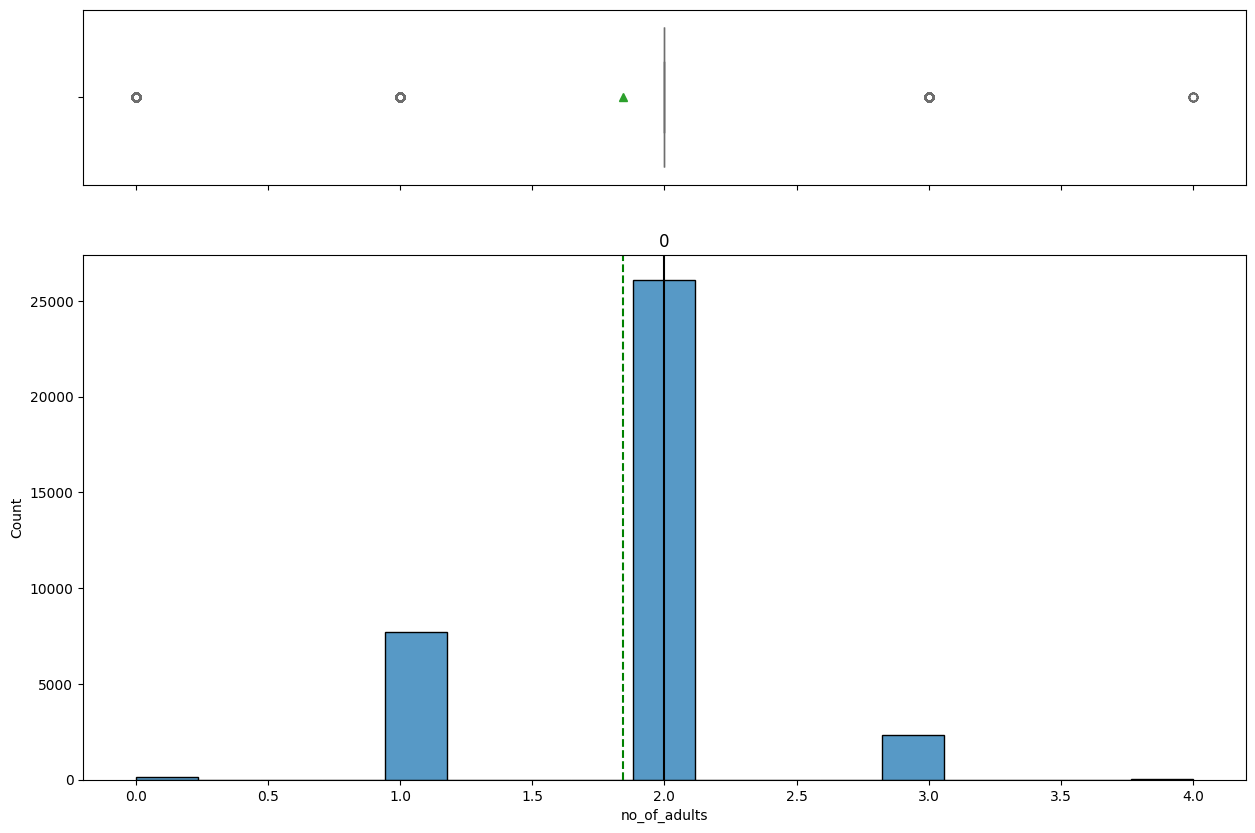

<Figure size 640x480 with 0 Axes>

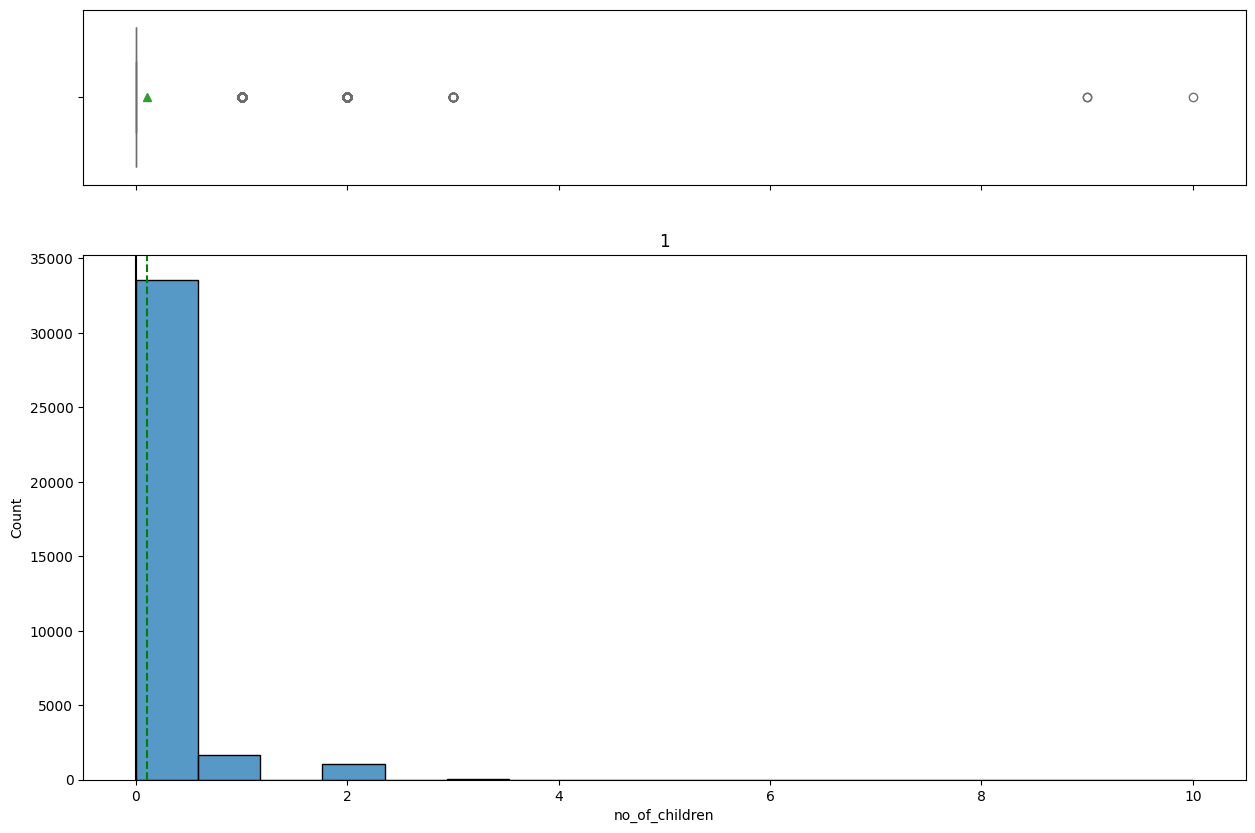

<Figure size 640x480 with 0 Axes>

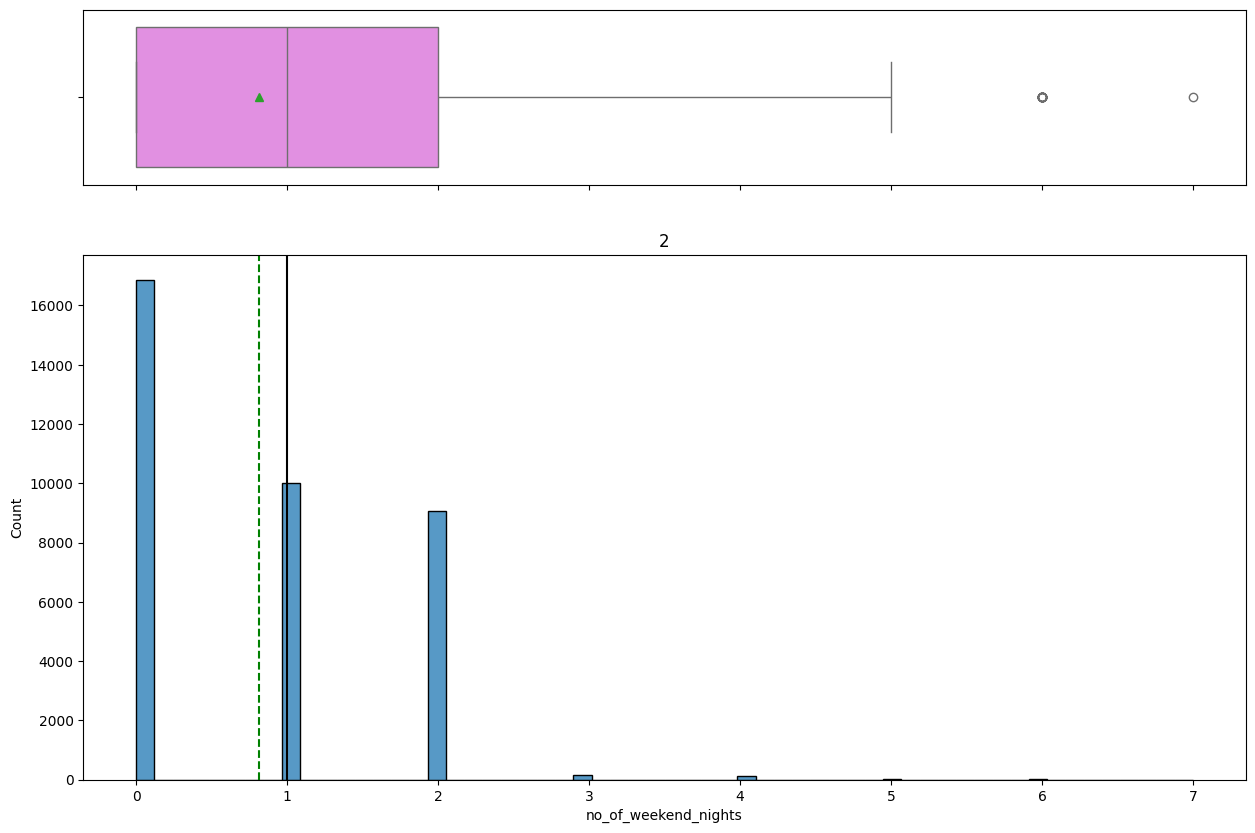

<Figure size 640x480 with 0 Axes>

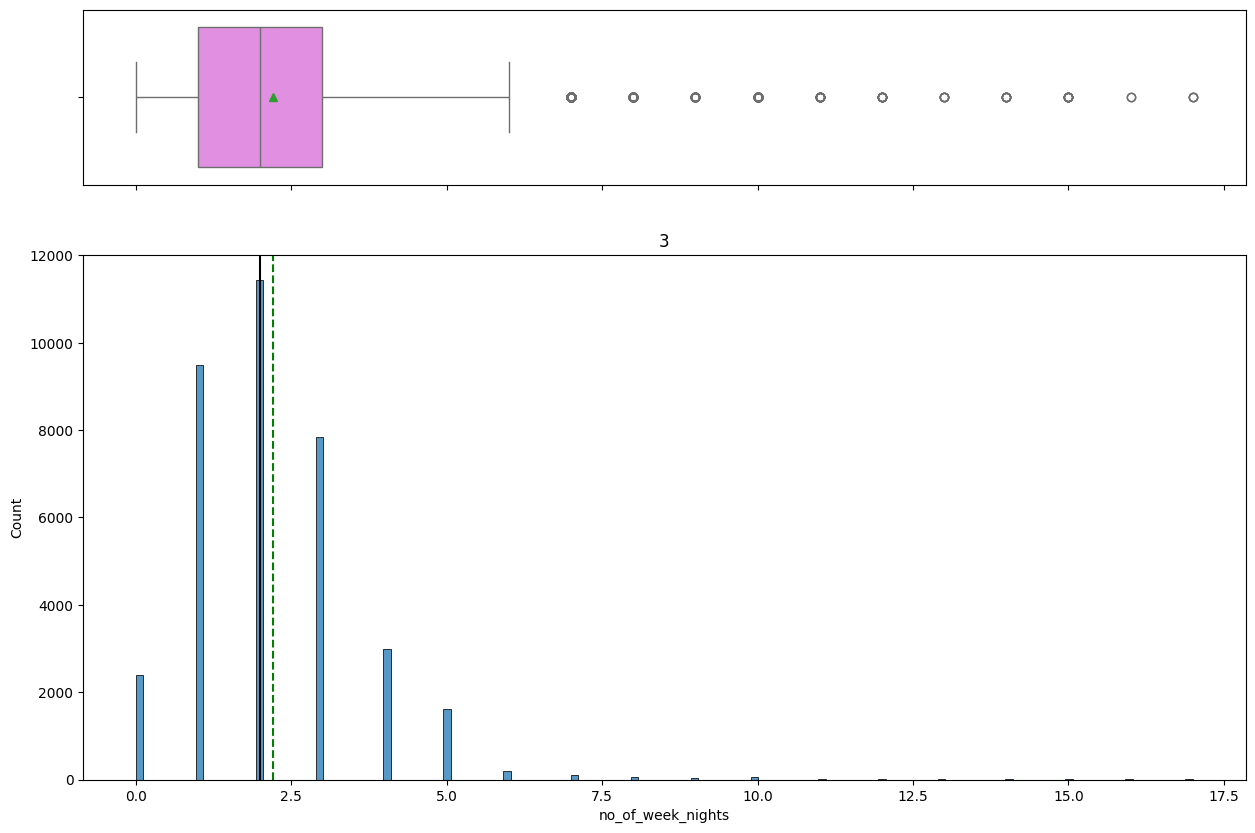

<Figure size 640x480 with 0 Axes>

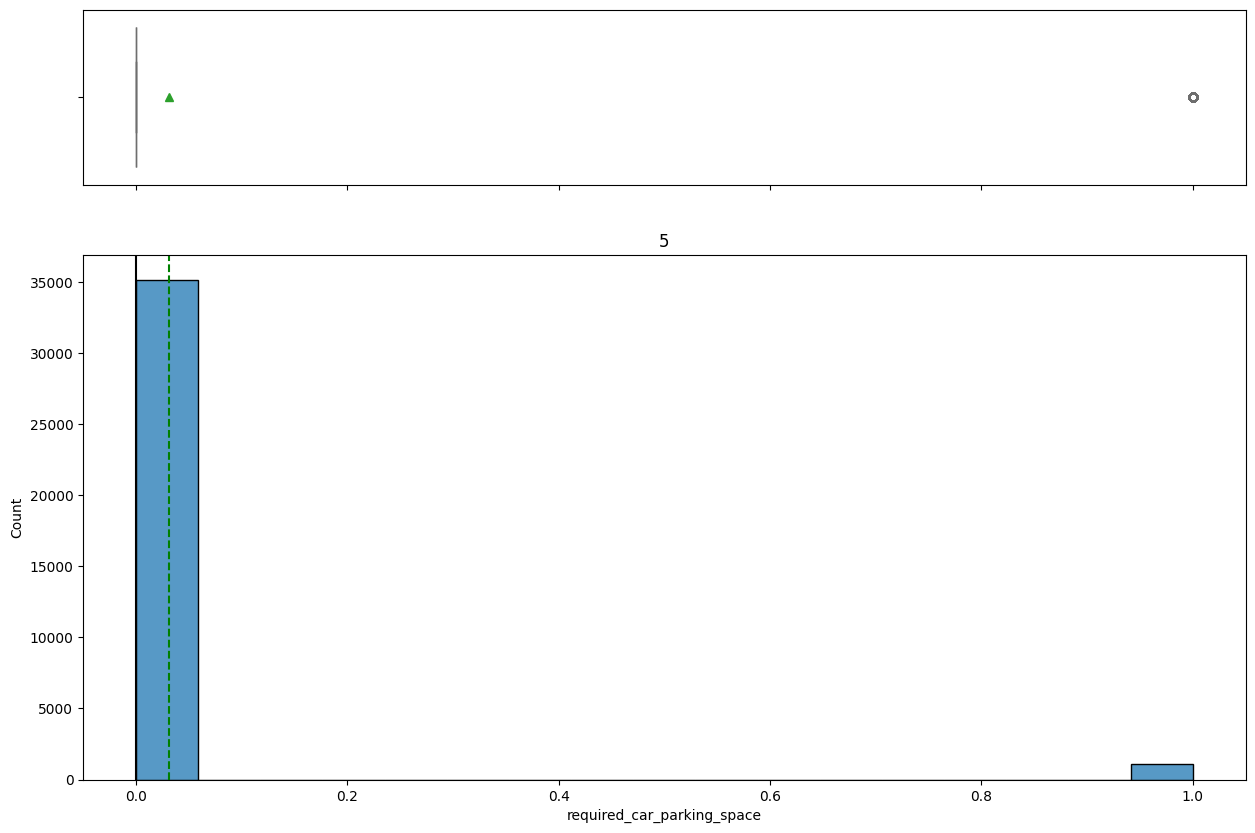

<Figure size 640x480 with 0 Axes>

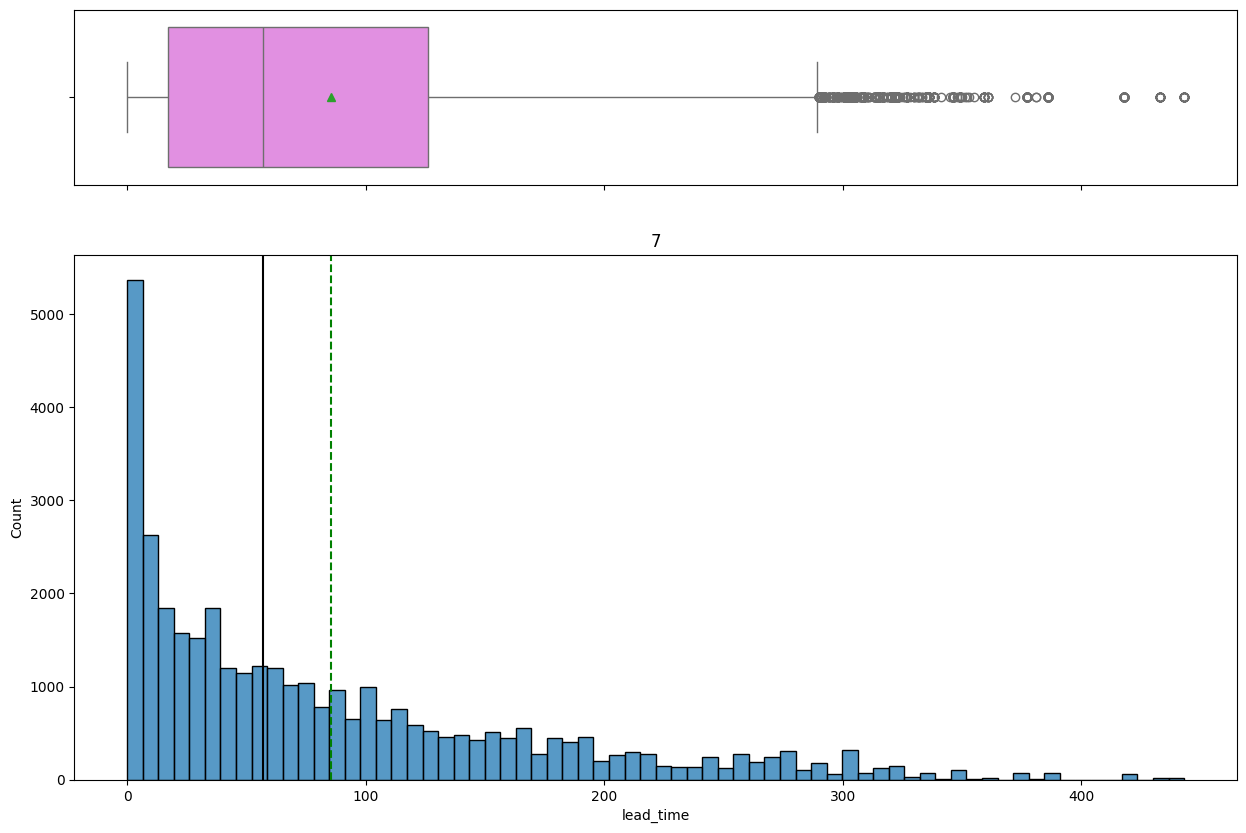

<Figure size 640x480 with 0 Axes>

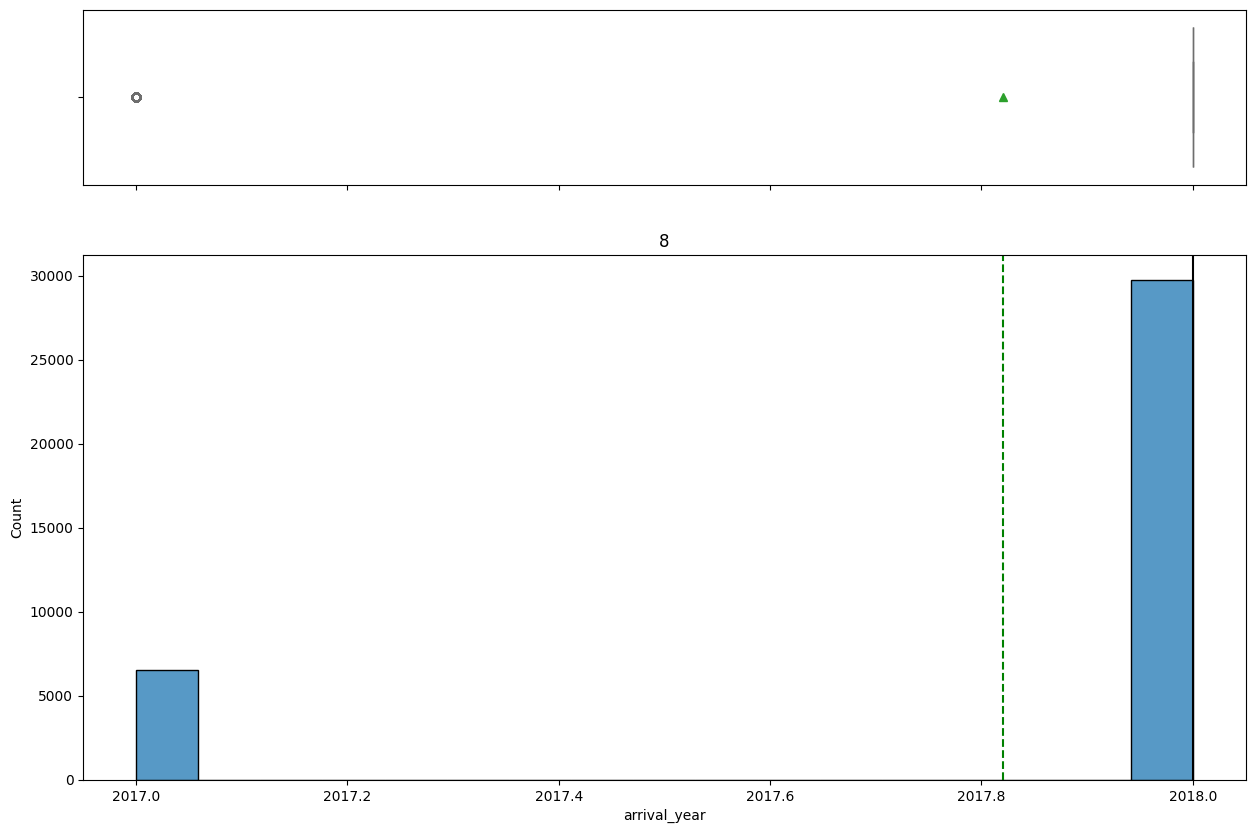

<Figure size 640x480 with 0 Axes>

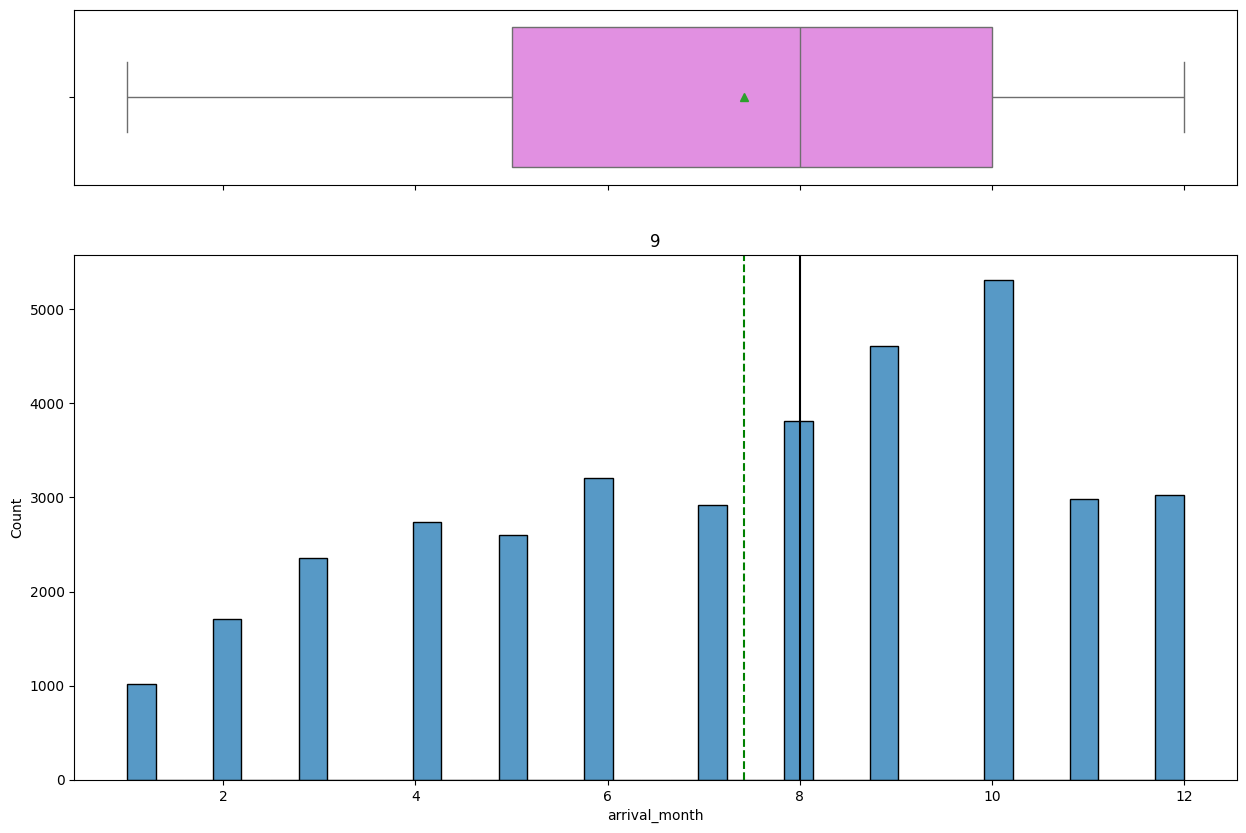

<Figure size 640x480 with 0 Axes>

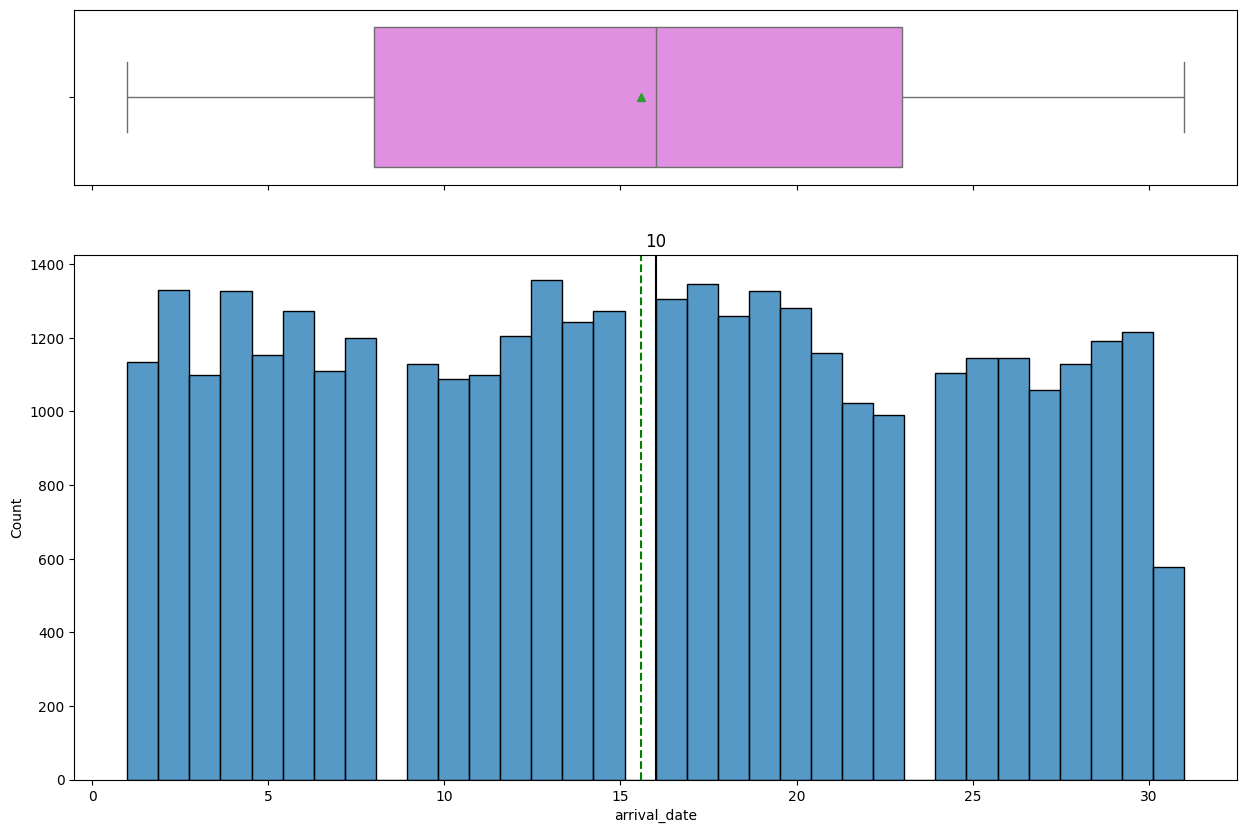

<Figure size 640x480 with 0 Axes>

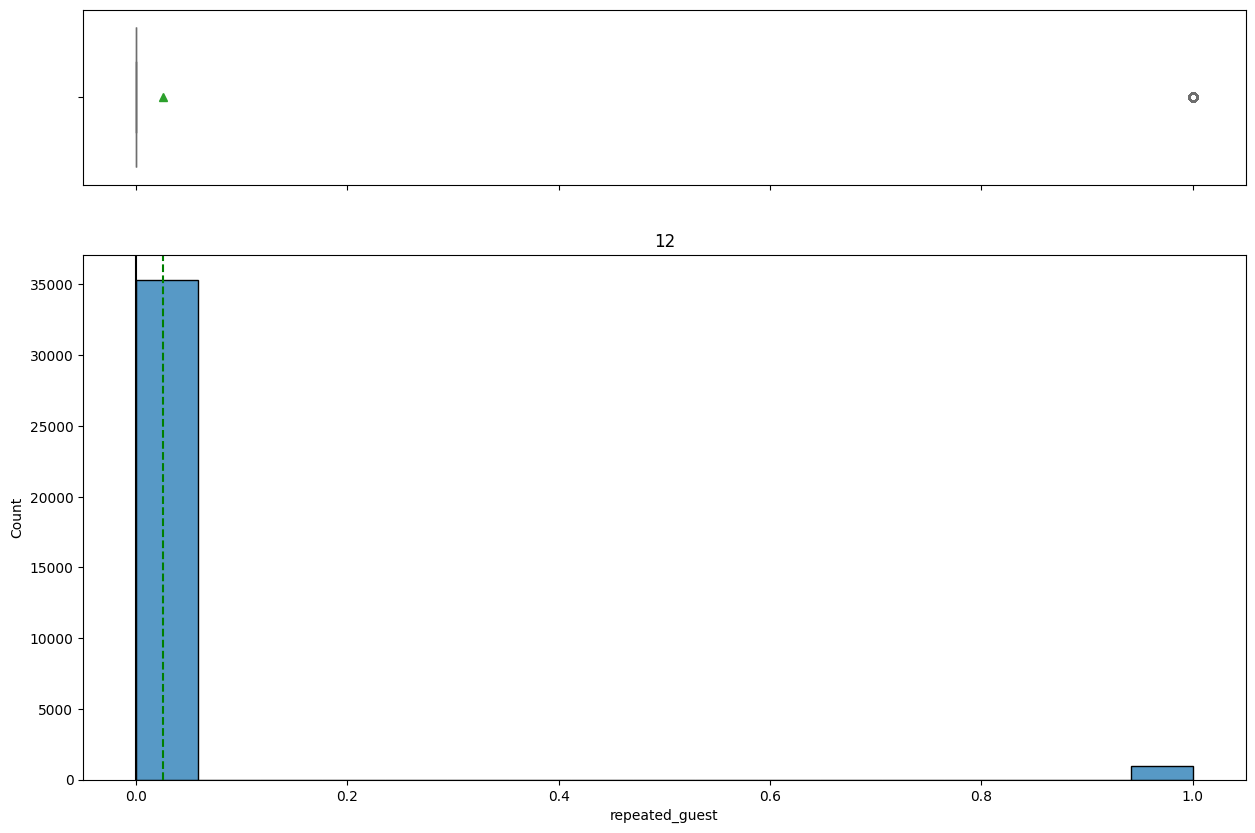

<Figure size 640x480 with 0 Axes>

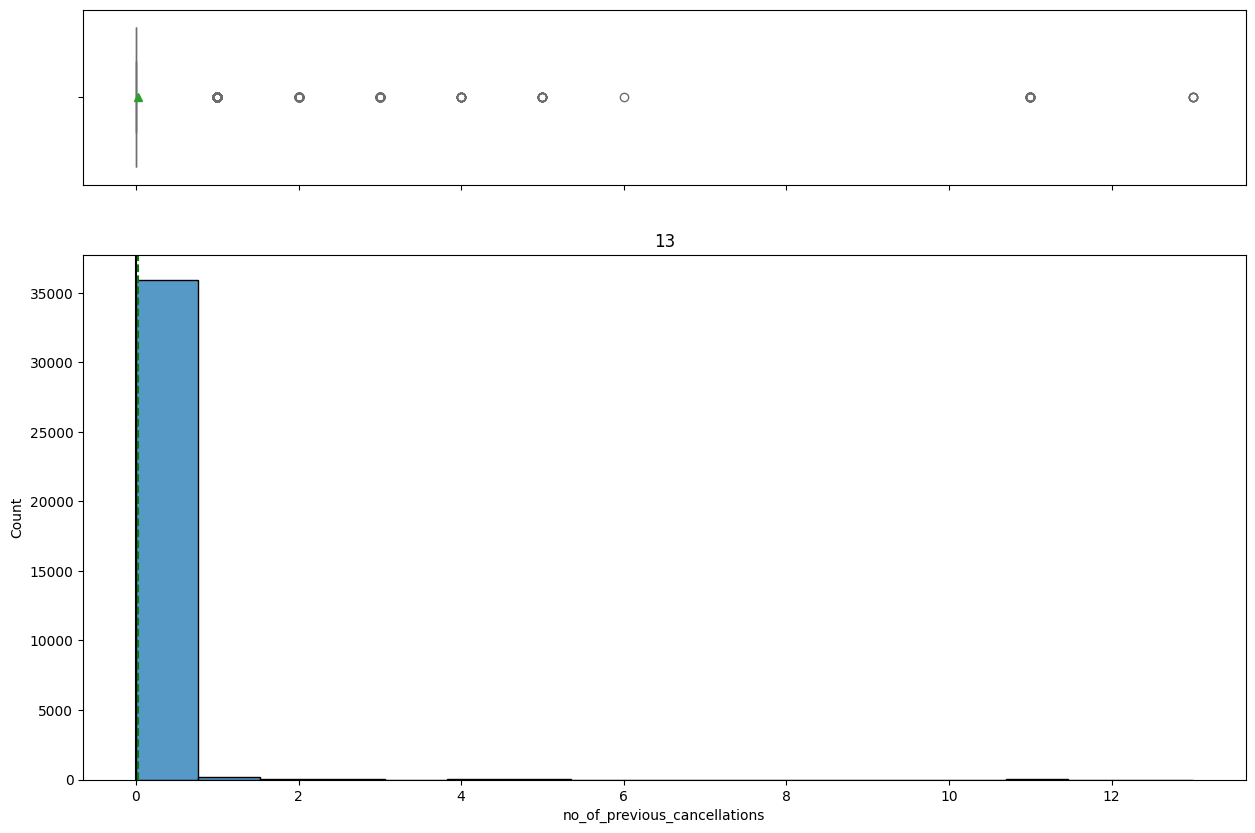

<Figure size 640x480 with 0 Axes>

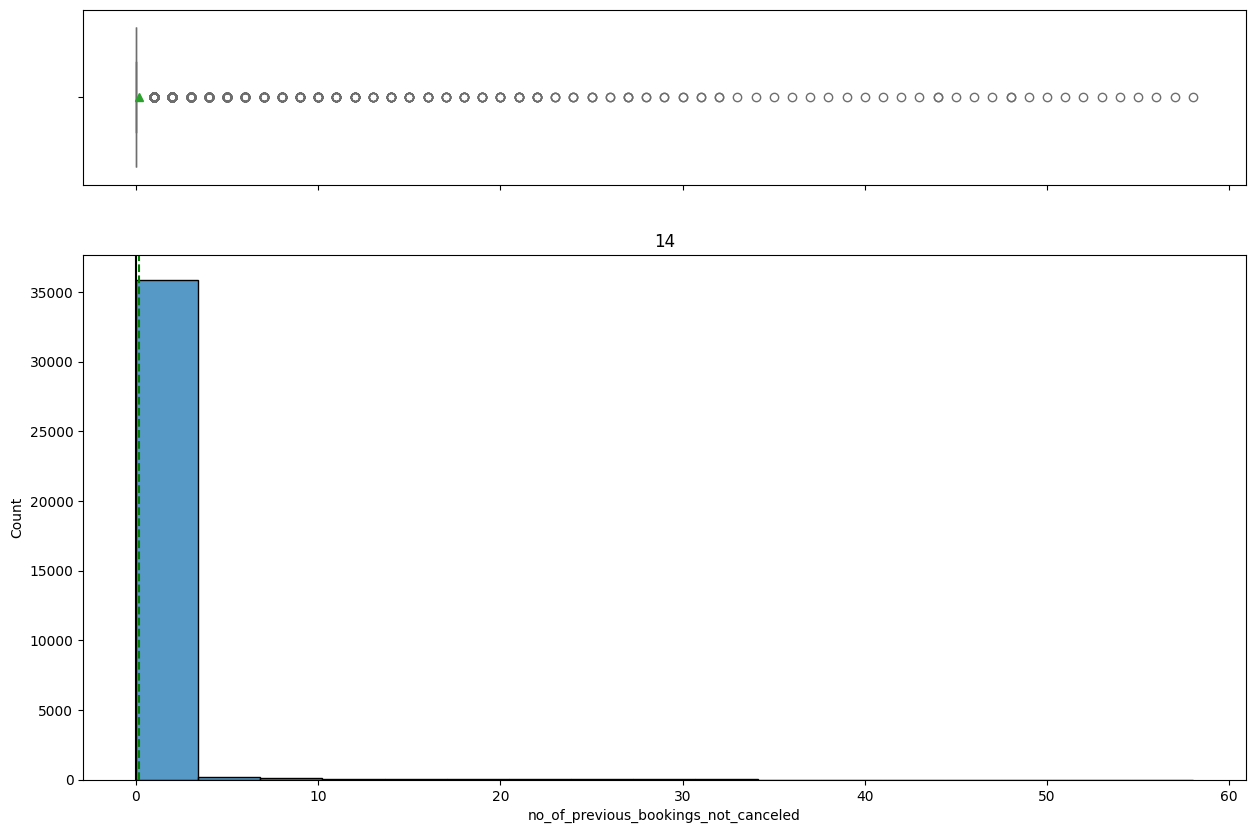

<Figure size 640x480 with 0 Axes>

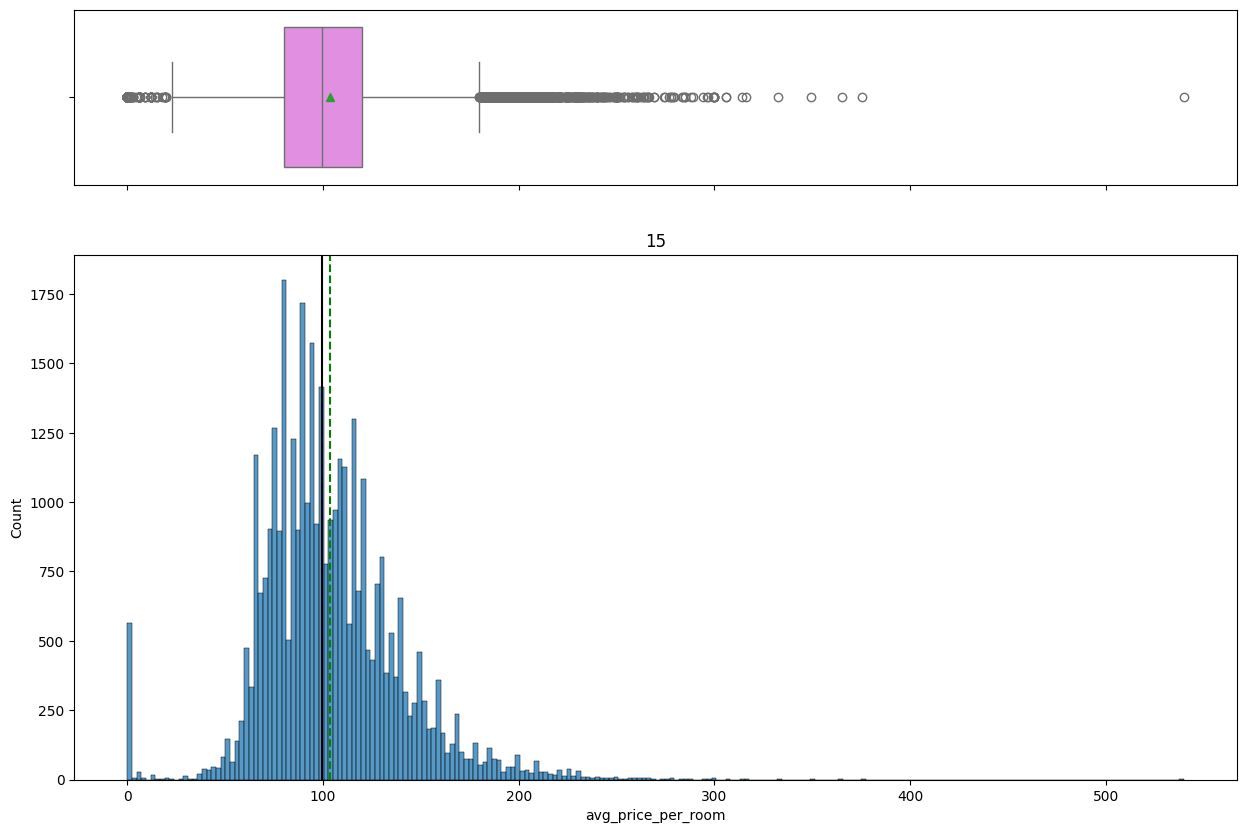

<Figure size 640x480 with 0 Axes>

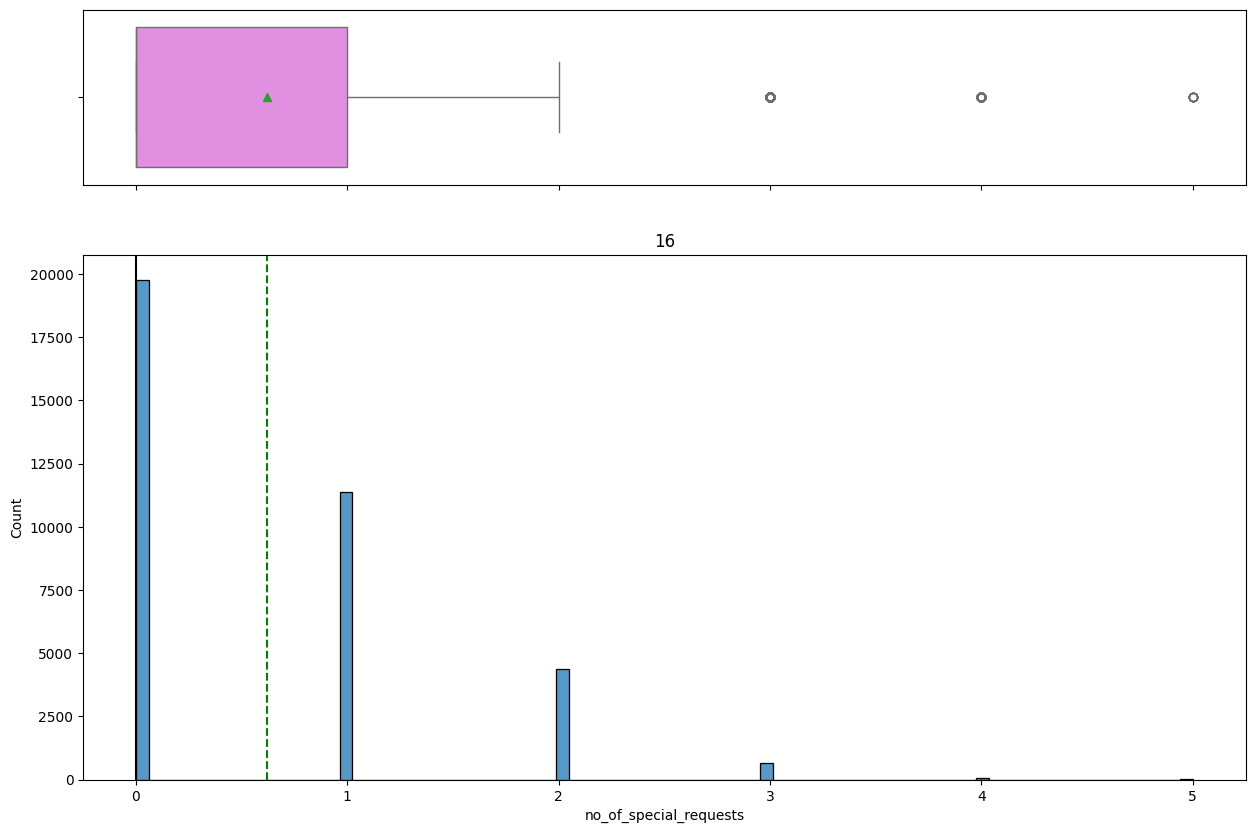

In [ ]:
# Check for continuous data types
continuous_cols = data.select_dtypes(include=[np.number])  # Select numeric columns

# Loop through continuous columns
for col in continuous_cols.columns:
    plt.figure()  # Create a new figure for each plot
    histogram_boxplot(data, col)  # Pass the column name (feature)

    # Extract the column title from the DataFrame
    col_title = data.columns.get_loc(col)  # Get the column index and use it to retrieve the title
    plt.title(col_title)  # Set the plot title using the column title
    plt.show()

**Insights**

- Two adults was the average number adults included into booking.
- Majority of bookings did not include children.
- The average number of weekend bookings was one night.
- The average number of non-weekend bookings was two nights.
- Majority of bookings did not request for car parking space.
- The average lead times from booking to checking-in/cancellation was about 70 days.
- Almost all the arrivals came in 2018, though there were some arrivals in 2017.
- The month with the most arrivals was October,though the median arrival month for most people in the data set was August.
- The average day visitors arrived in the dataset was on the 15th, though there surges on the 1st, 3rd, 14th, 17th, and 19th.
- Majority of the bookings were from new guests
- Majority of bookings had no previous cancellations as expected since they were mostly from new guests.
- Majority of bookings had no previous bookings not cancelled as expected since they were mostly from new guests.
- 100 Euros was the average amount guests paid per room, though about 1750 customers paid as low as 70-80 Euros.
- Majority of bookings made no special requests.


####Visualizing features with Categorical variables

<Figure size 640x480 with 0 Axes>

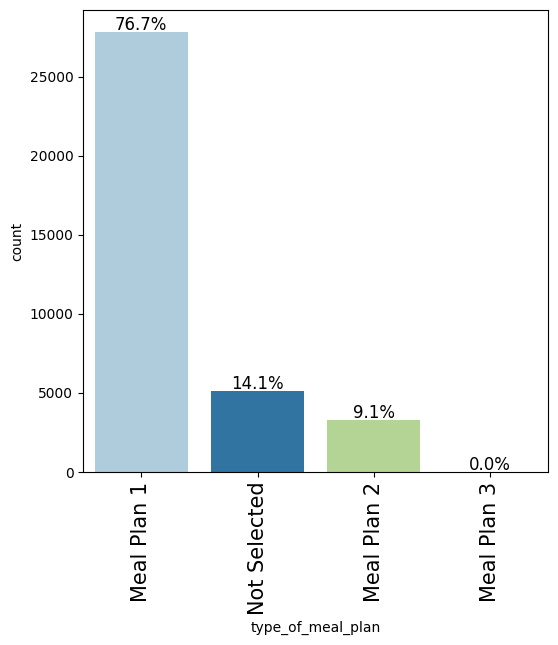

<Figure size 640x480 with 0 Axes>

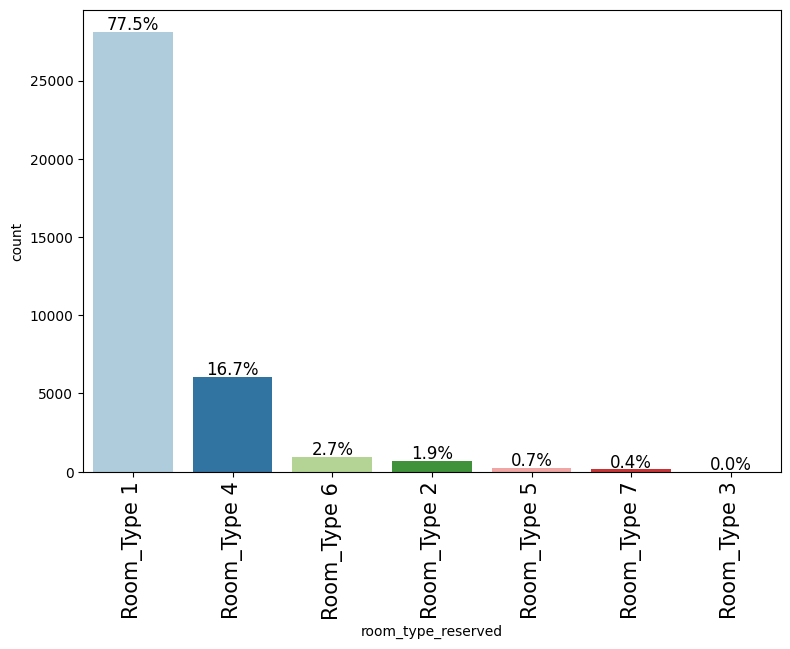

<Figure size 640x480 with 0 Axes>

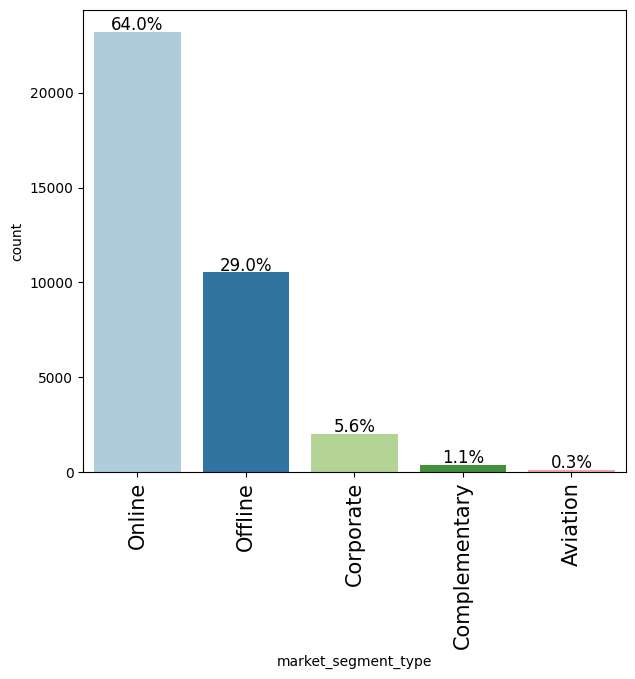

<Figure size 640x480 with 0 Axes>

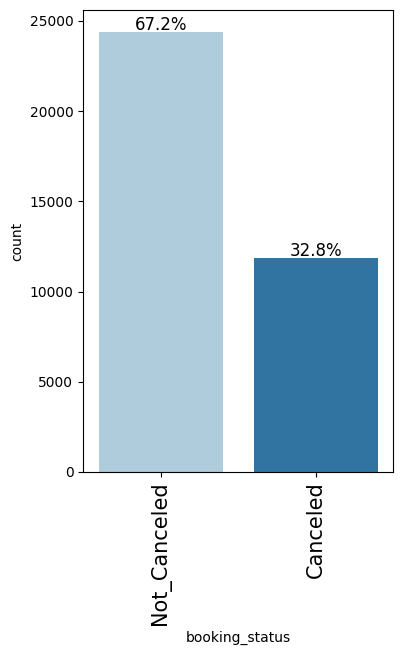

In [ ]:
# Check for categorical data types
categorical_cols = data.select_dtypes(include=['object'])  # Select object columns (categorical data)


# Loop through categorical columns
for col in categorical_cols.columns:
   plt.figure()  # Create a new figure for each plot

   labeled_barplot(data, col)  # Plot bar chart of categorical variables

   plt.show();

**iNSIGHTS**

- Rooom type 1 was the most popular room type booked with 77.5%
- The market segment with greatest contribution was Online with 64%
- 67.2% of customers did not cancel there bookings
- Meal plan 1 was the most popular mean plan during booking.

###BIVARIATE ANALYSIS

####Correlation heat map

In [ ]:
# creating a list of numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

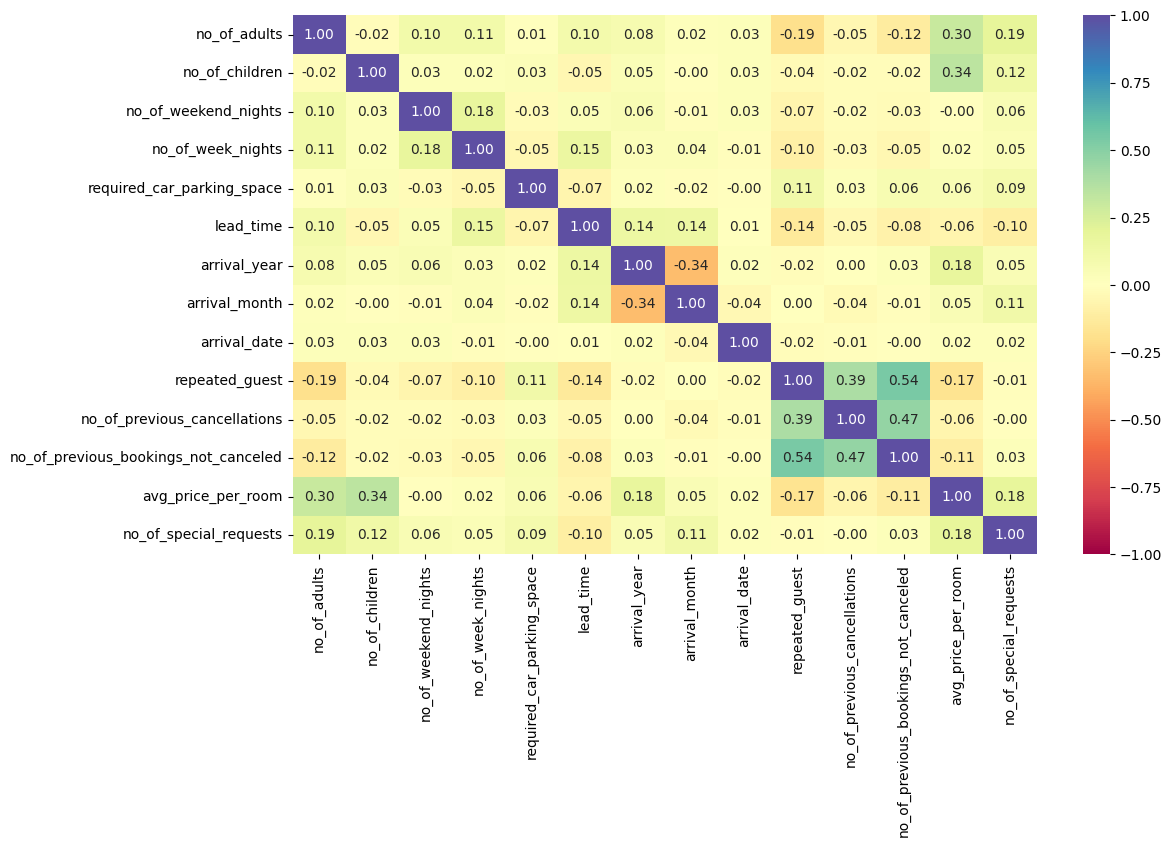

In [ ]:
#plotting correlation heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

- There is a strong positive relationship between repeated guest and number of previous bookings not cancelled

####Average room price vs market segment

<Figure size 640x480 with 0 Axes>

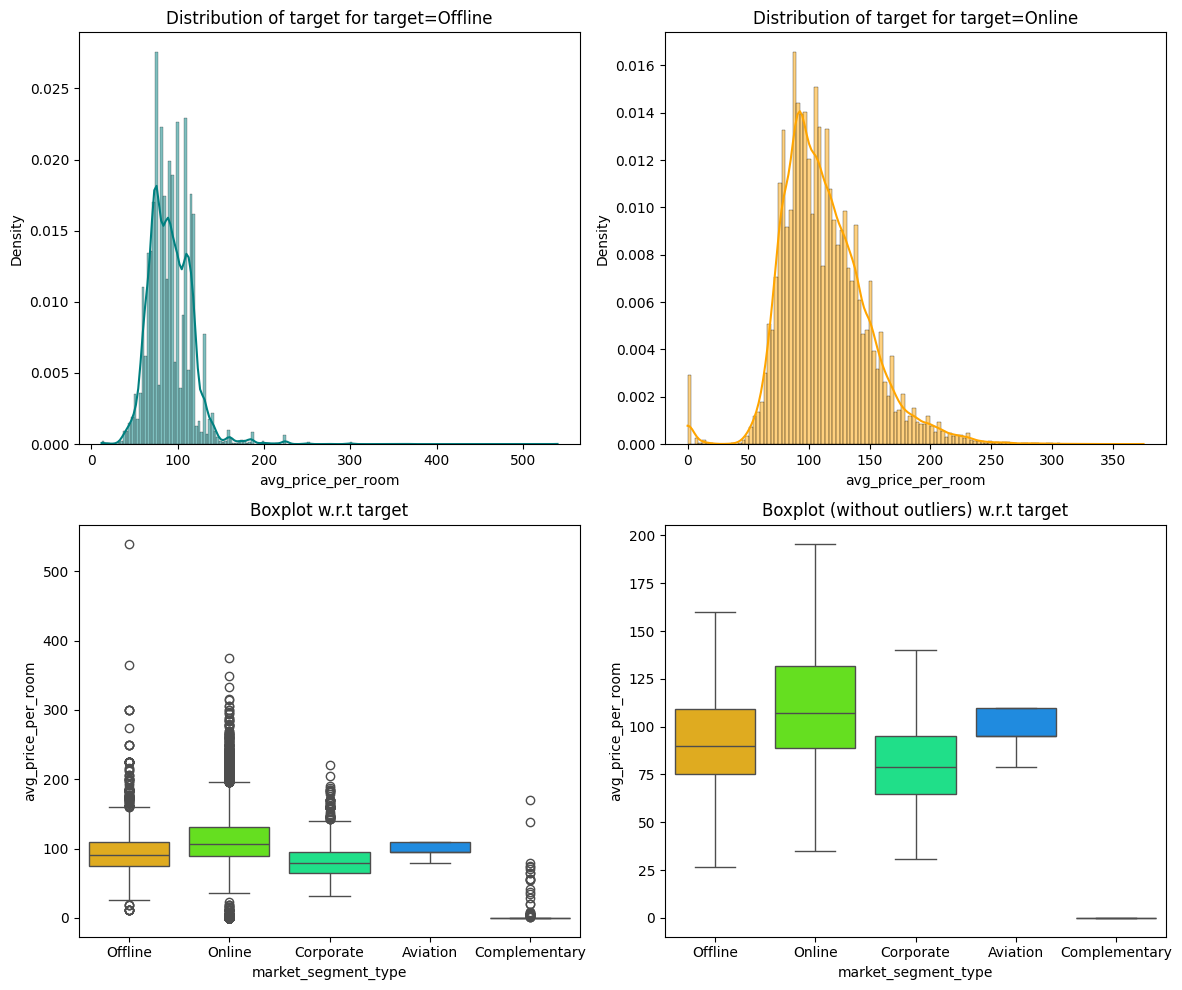

In [ ]:
plt.figure()
distribution_plot_wrt_target(data,'avg_price_per_room' ,'market_segment_type')
plt.show();

- Online market segment both have the highest spending for average price per room,as well as, the median amount spent for average price per room accross the data set.

####no_of_previous_cancellations vs repeated_guest

<Figure size 640x480 with 0 Axes>

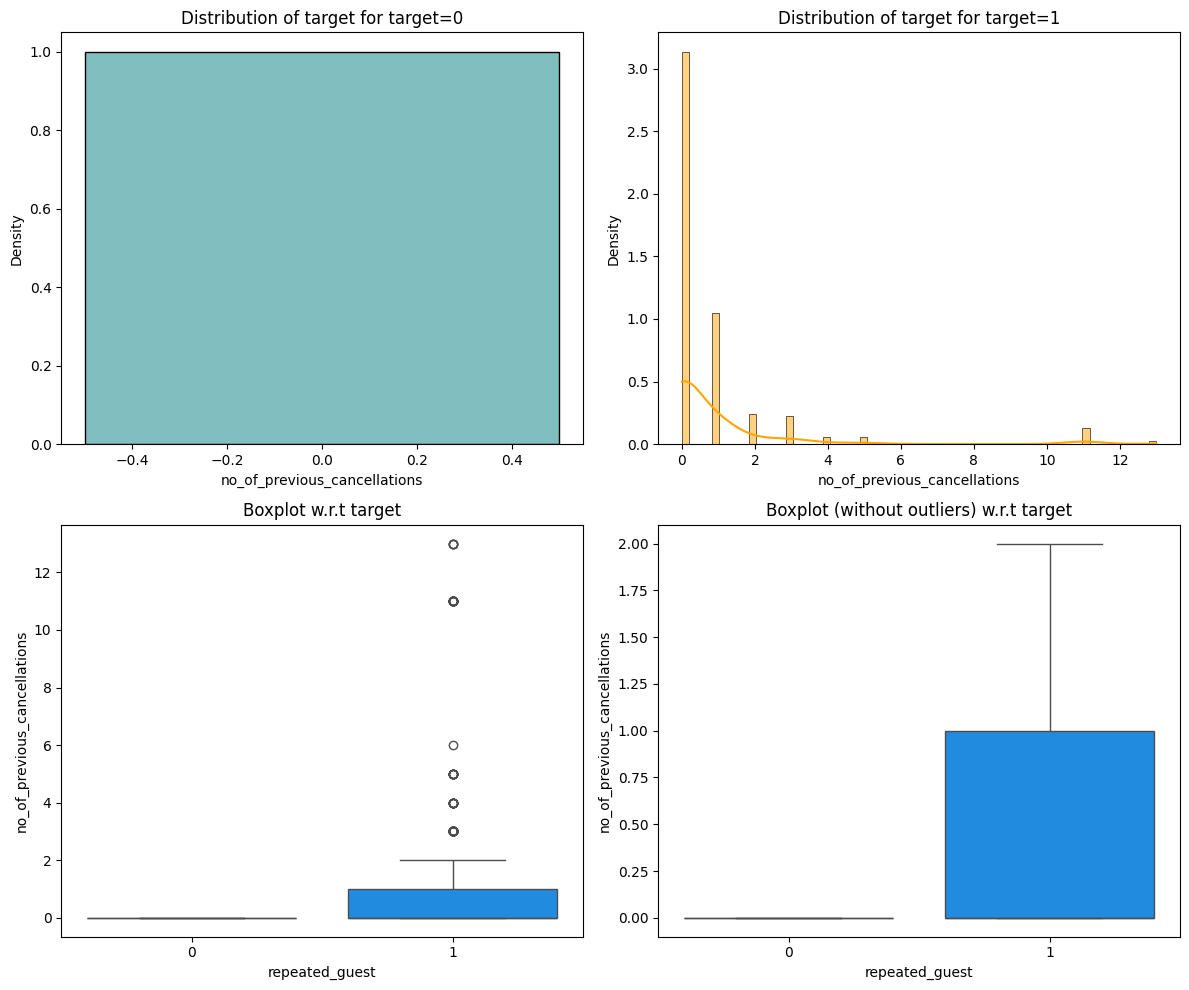

In [ ]:
plt.figure()
distribution_plot_wrt_target(data,'no_of_previous_cancellations','repeated_guest')
plt.show();

Repeated overwhemingly tend to have the highest number of previous cancellation which actually expected.

####no_of_special_requests vs repeated_guest

<Figure size 640x480 with 0 Axes>

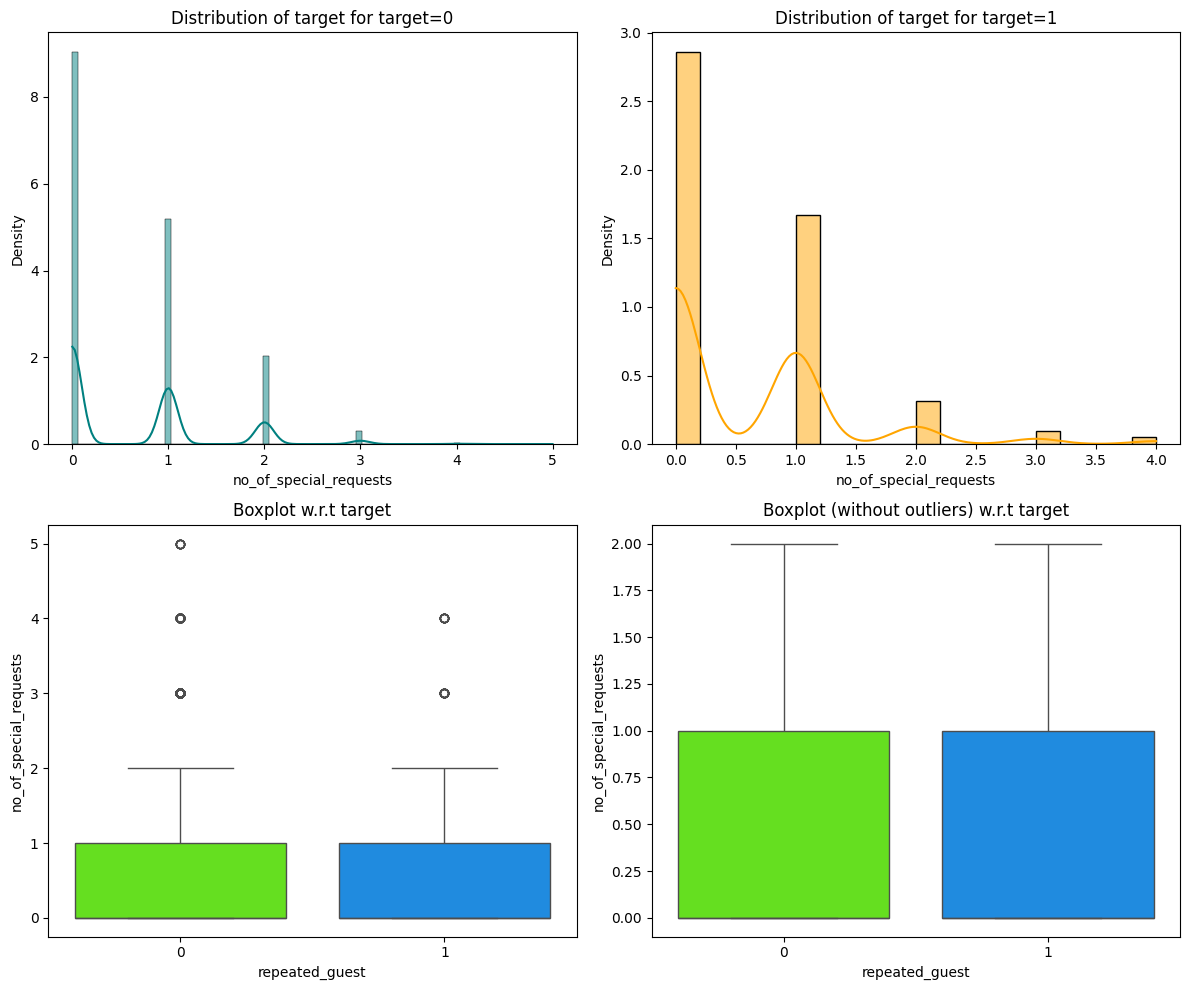

In [ ]:
plt.figure()
distribution_plot_wrt_target(data,'no_of_special_requests','repeated_guest')
plt.show();

- There is no difference number of special requests coming from first time guest and repeated guest.

####Booking status vs lead time

<Figure size 640x480 with 0 Axes>

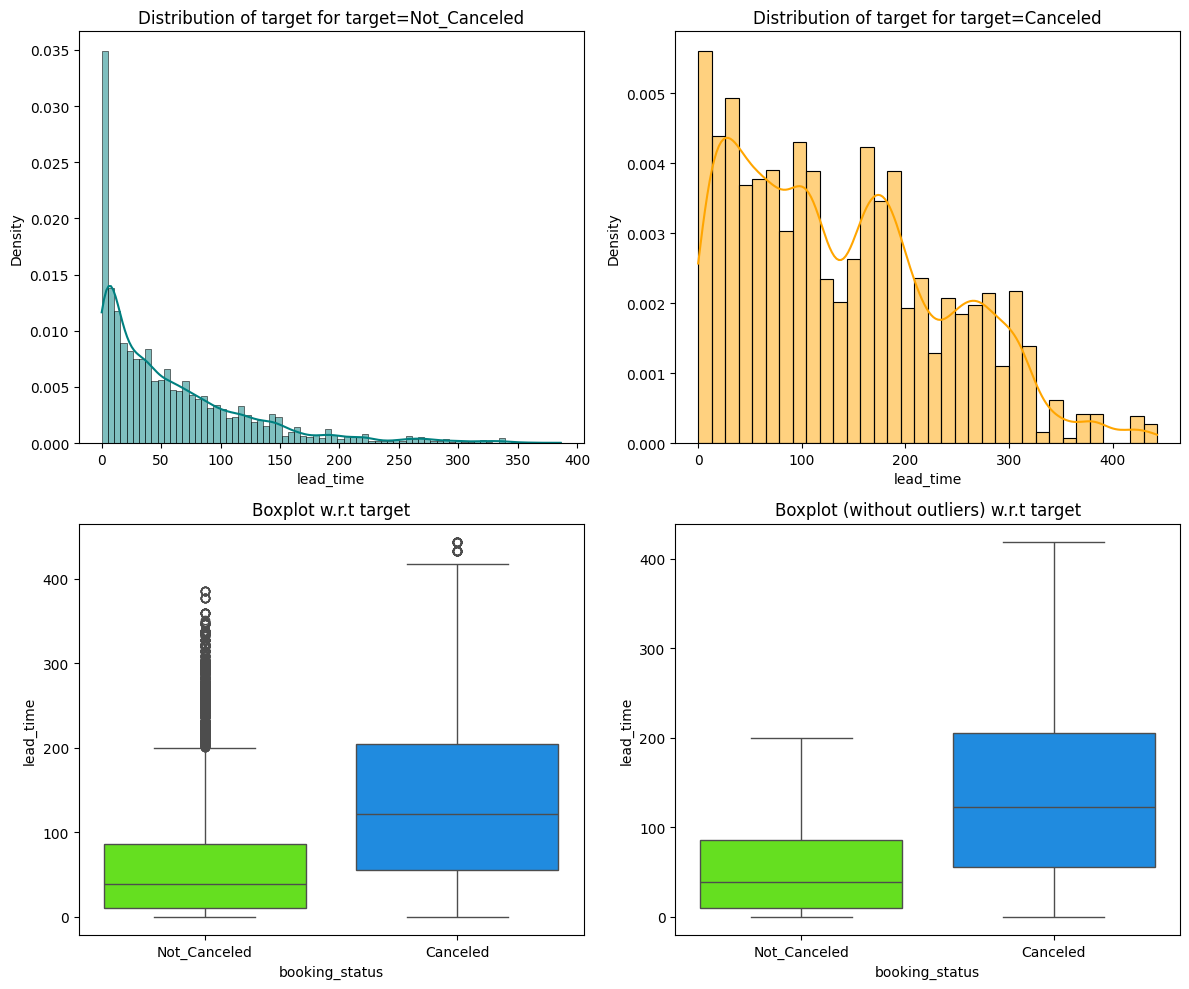

In [ ]:
plt.figure()
distribution_plot_wrt_target(data,'lead_time' ,'booking_status')
plt.show();

- Customers with lead time of between 100 to 400 days were more likely to cancel.

####Booking status vs market segment

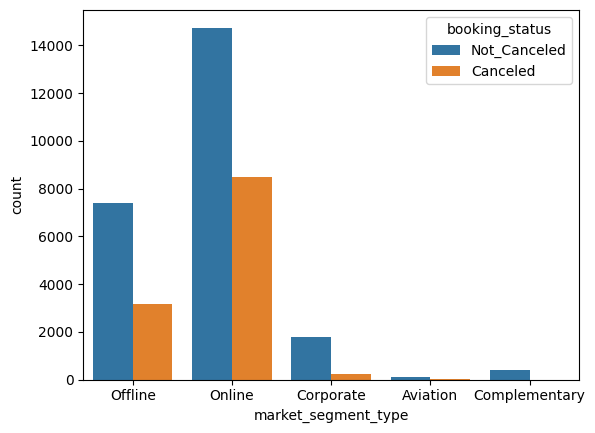

In [ ]:
plt.figure()
sns.countplot(data, x = 'market_segment_type', hue ='booking_status', )
plt.show();

- Complimentary market segment never cancel booking which is not suprising since rooms here are free.
- Online market segment had the most cancellations then followed by offline market segment.

####Booking status vs Arrival months

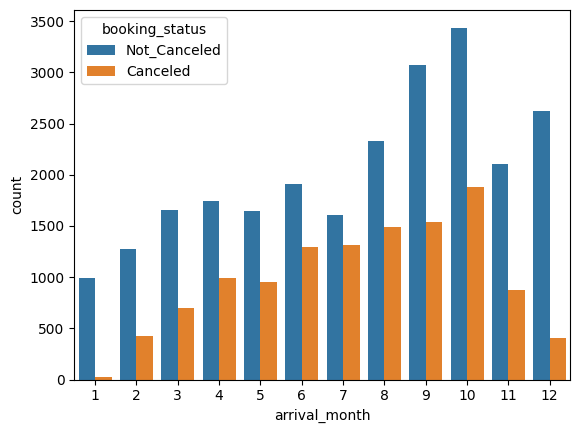

In [ ]:
plt.figure()
sns.countplot(data, x = 'arrival_month', hue ='booking_status', )
plt.show();

- Guest arriving in August, September, and October were more likely to cancel their bookings.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###1. Missing value treatment.

- As highlighted earlier, there are no missing data to treat.

###2. Feature Enginearing

- None needed for now.

###3. Outlier Detection.

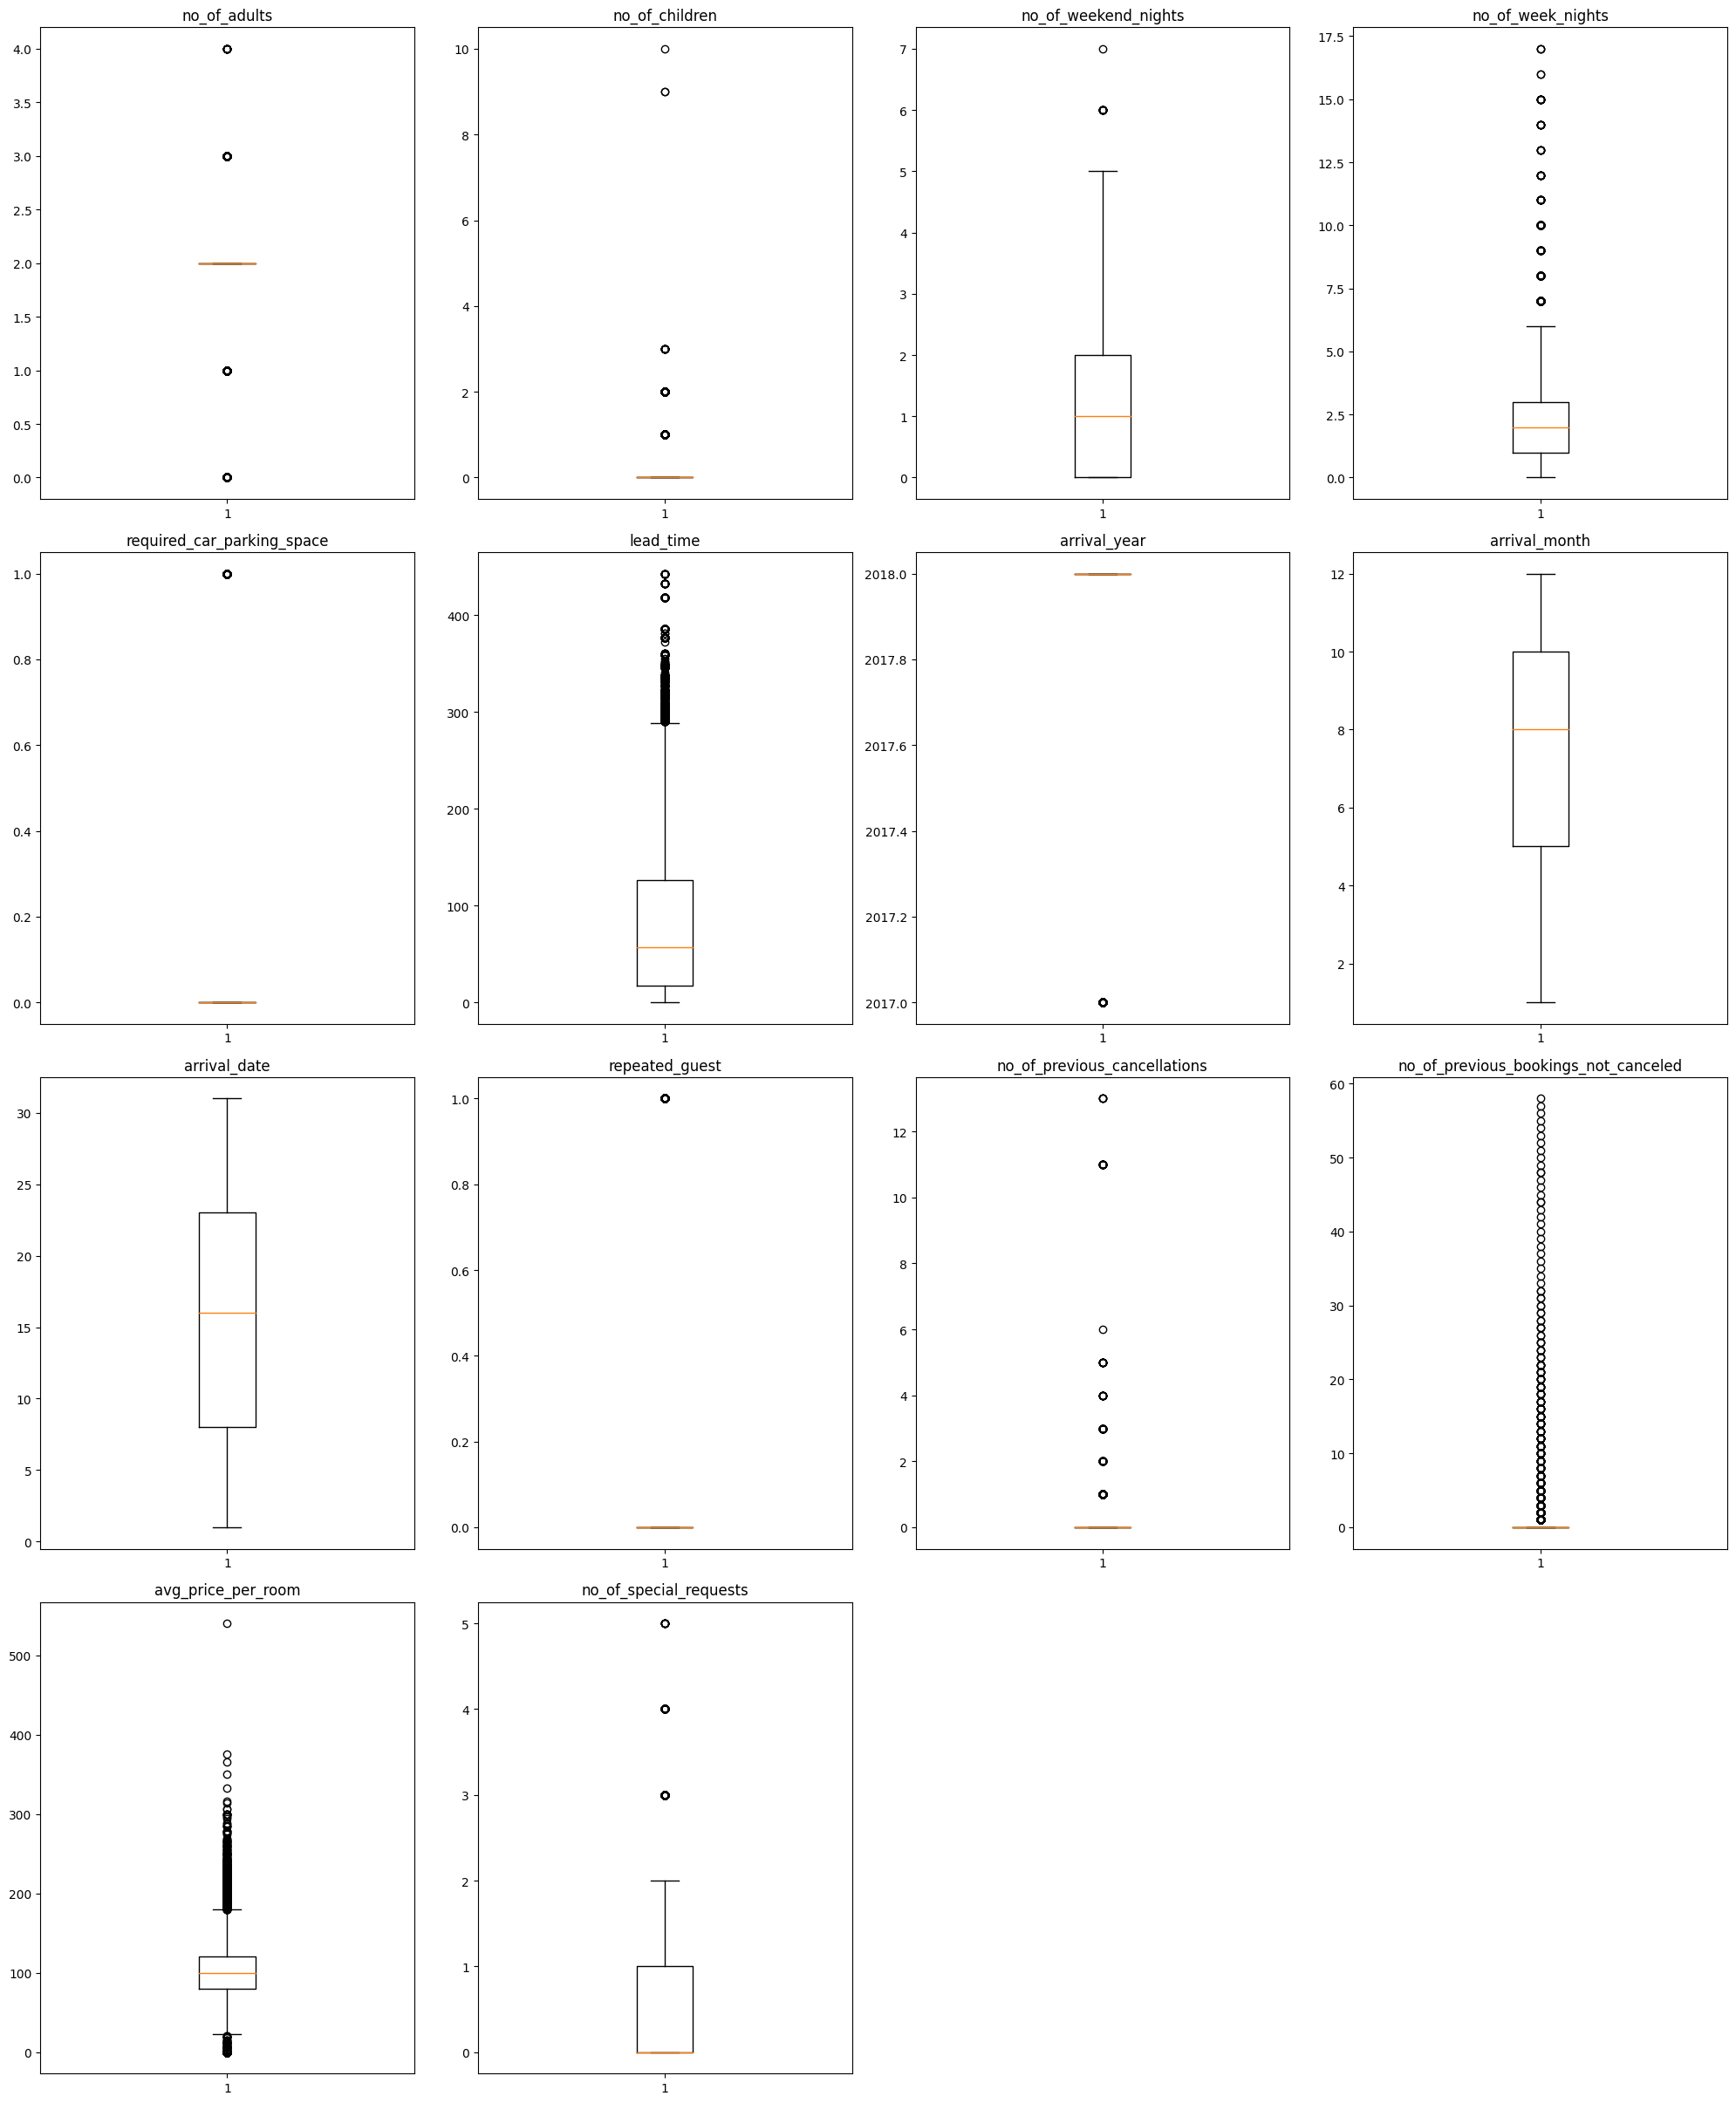

In [ ]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Average price per room and number of adults have upper and lower outliers.
- Number of special guests, number of previous bookings not cancelled,number of previous cancellations, repeated guest, lead time, number of week nights, number of children and number of week nights all have upper outliers.

####**Managing ouliers**

I will treat outliers here. However, the performance of the data will be tested both on data with outlier treated and with those outliers where not treated.

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
dt = treat_outliers_all(data, numerical_col)


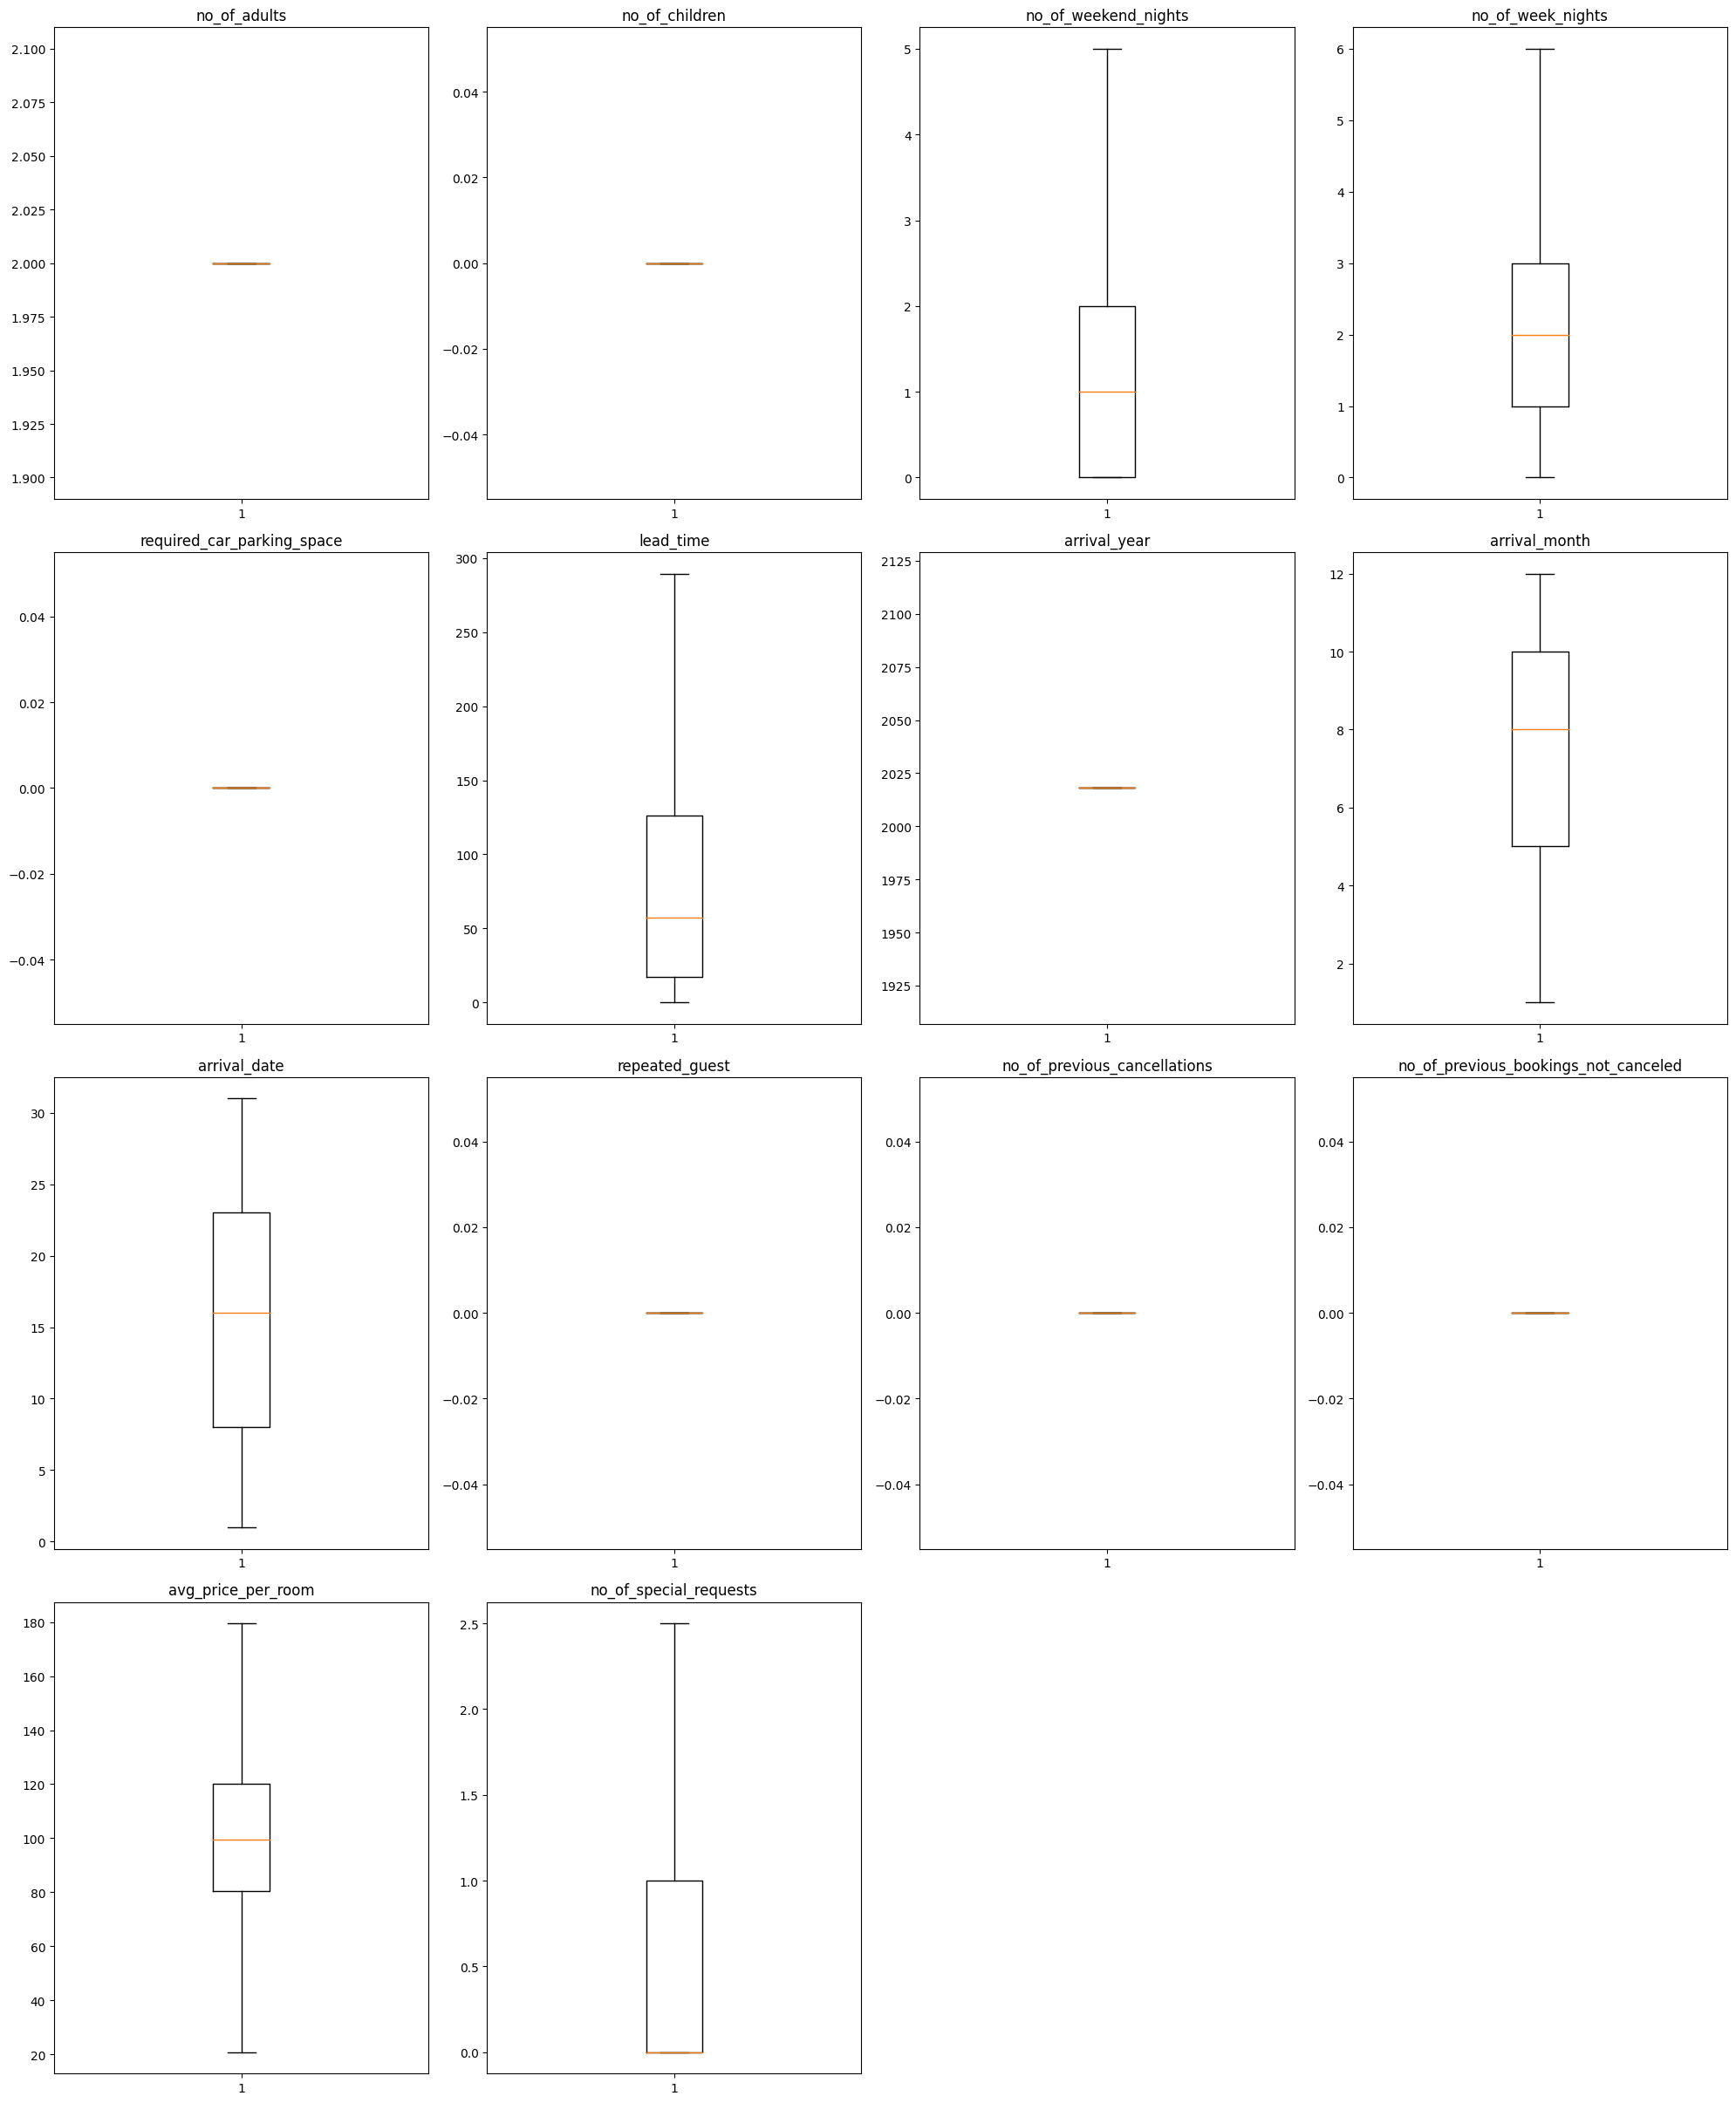

In [ ]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(dt[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
dt['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

###4. Data preparation for model.

In [ ]:
data1 = data.copy()

Encoding booking_status variables: Cancelled will be 1 while not cancelled will be 0.

In [ ]:
# Converting Boolean variables in booking status column to numeric variables for data set without treated outliers
data1['booking_status'] = data1['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})
data1['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [ ]:
# Converting Boolean variables in booking status column to numeric variables for data set without treated outliers
dt['booking_status'] = dt['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})
dt['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

Creating dummy variables for the following; type_of_meal_plan, room_type_reserved, and market_segment_type. Then dropping the columns.

In [ ]:
import pandas as pd

def create_dummies(data, specific_cols):
    """
    Creates dummy variables for specific columns in a pandas DataFrame.

    Args:
        data: The pandas DataFrame.
        specific_cols (list): A list of column names to convert to dummy variables.

    Returns:
        pandas.DataFrame: The DataFrame with new dummy variables.
    """

    # Create dummy variables for the specified columns
    dummies = pd.get_dummies(data[specific_cols], drop_first=True)

    # Drop the original columns from the DataFrame
    data = data.drop(columns=specific_cols)

    # Combine original data without the specified columns with dummy variables
    return pd.concat([data, dummies], axis=1)


specific_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']  # Columns to convert to dummies
df = create_dummies(data1.copy(), specific_cols)  # Saving data (outliers not treated) with dummy variables

# saving dt (outlier-treated) with dummy variables
dt1 = create_dummies(dt.copy(), specific_cols)


Checking data frame after dummy variable creation

In [ ]:
df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 2               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             2               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                               0  224.00000          2018             10   
1                               0    5.00000          2018             11   
2                               0    1.00000          2018              2   
3                               0  211.00000          2018              5   
4                               0   48.00000          2018              4   
...                           ...        ...           ...            ...   
36270                           0   85.00000          2018              8   
36271                           0  228.00000          2018             10   
36272                           0  148.00000          2018              7   
36273                           0   63.00000          2018              4   
36274                           0  207.00000          2018             12   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
0                 2               0                             0   
1                 6               0                             0   
2                28               0                             0   
3                20               0                             0   
4                11               0                             0   
...             ...             ...                           ...   
36270             3               0                             0   
36271            17               0                             0   
36272             1               0                             0   
36273            21               0                             0   
36274            30               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0            65.00000   
1                                         0           106.68000   
2                                         0            60.00000   
3                                         0           100.00000   
4                                         0            94.50000   
...                                     ...                 ...   
36270                                     0           167.80000   
36271                                     0            90.95000   
36272                                     0            98.39000   
36273                                     0            94.50000   
36274                                     0           161.67000   

       no_of_special_requests  booking_status  type_of_meal_plan_Meal Plan 2  \
0                     0.00000               0                              0   
1                     1.00000               0                              0   
2                     0.00000               1                              0   
3                     0.00000               1                              0   
4                     0.00000               1                              0   
...    

In [ ]:
dt1

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 2               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             2               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                               0  224.00000          2018             10   
1                               0    5.00000          2018             11   
2                               0    1.00000          2018              2   
3                               0  211.00000          2018              5   
4                               0   48.00000          2018              4   
...                           ...        ...           ...            ...   
36270                           0   85.00000          2018              8   
36271                           0  228.00000          2018             10   
36272                           0  148.00000          2018              7   
36273                           0   63.00000          2018              4   
36274                           0  207.00000          2018             12   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
0                 2               0                             0   
1                 6               0                             0   
2                28               0                             0   
3                20               0                             0   
4                11               0                             0   
...             ...             ...                           ...   
36270             3               0                             0   
36271            17               0                             0   
36272             1               0                             0   
36273            21               0                             0   
36274            30               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0            65.00000   
1                                         0           106.68000   
2                                         0            60.00000   
3                                         0           100.00000   
4                                         0            94.50000   
...                                     ...                 ...   
36270                                     0           167.80000   
36271                                     0            90.95000   
36272                                     0            98.39000   
36273                                     0            94.50000   
36274                                     0           161.67000   

       no_of_special_requests  booking_status  type_of_meal_plan_Meal Plan 2  \
0                     0.00000               0                              0   
1                     1.00000               0                              0   
2                     0.00000               1                              0   
3                     0.00000               1                              0   
4                     0.00000               1                              0   
...    

In [ ]:
df.duplicated().sum()

10615

In [ ]:
# Remove all duplicate rows
df = df.drop_duplicates()

df.duplicated().sum()

0

In [ ]:
df.describe(include='all').T

count       mean      std  \
no_of_adults                         25660.00000    2.00000  0.00000   
no_of_children                       25660.00000    0.00000  0.00000   
no_of_weekend_nights                 25660.00000    0.88581  0.88374   
no_of_week_nights                    25660.00000    2.23313  1.36900   
required_car_parking_space           25660.00000    0.00000  0.00000   
lead_time                            25660.00000   66.21904 67.25142   
arrival_year                         25660.00000 2018.00000  0.00000   
arrival_month                        25660.00000    7.32720  3.13823   
arrival_date                         25660.00000   15.73566  8.85085   
repeated_guest                       25660.00000    0.00000  0.00000   
no_of_previous_cancellations         25660.00000    0.00000  0.00000   
no_of_previous_bookings_not_canceled 25660.00000    0.00000  0.00000   
avg_price_per_room                   25660.00000  105.24561 33.81945   
no_of_special_requests               25660.00000    0.72697  0.77004   
booking_status                       25660.00000    0.28757  0.45264   
type_of_meal_plan_Meal Plan 2        25660.00000    0.04373  0.20449   
type_of_meal_plan_Meal Plan 3        25660.00000    0.00019  0.01396   
type_of_meal_plan_Not Selected       25660.00000    0.17217  0.37754   
room_type_reserved_Room_Type 2       25660.00000    0.02202  0.14675   
room_type_reserved_Room_Type 3       25660.00000    0.00023  0.01529   
room_type_reserved_Room_Type 4       25660.00000    0.20951  0.40697   
room_type_reserved_Room_Type 5       25660.00000    0.00892  0.09405   
room_type_reserved_Room_Type 6       25660.00000    0.03648  0.18748   
room_type_reserved_Room_Type 7       25660.00000    0.00604  0.07749   
market_segment_type_Complementary    25660.00000    0.01325  0.11435   
market_segment_type_Corporate        25660.00000    0.05171  0.22145   
market_segment_type_Offline          25660.00000    0.15877  0.36547   
market_segment_type_Online           25660.00000    0.77241  0.41929   

                                            min        25%        50%  \
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   12.00000   44.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                     20.75000   80.75000  100.00000   
no_of_special_requests                  0.00000    0.00000    1.00000   
booking_status                          0.00000    0.00000    0.00000   
type_of_meal_plan_Meal Plan 2           0.00000    0.00000    0.00000   
type_of_meal_plan_Meal Plan 3           0.00000    0.00000    0.00000   
type_of_meal_plan_Not Selected          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 2          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 3          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 4          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 5          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 6          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 7          0.00000    0.00000    0.00000   
market_segment_type_Complementary       0.00000    0.00000    0.00000   
market_segment_type_Corporate           0.00000    0.000

In [ ]:
dt1.duplicated().sum()

10615

In [ ]:
# Remove all duplicate rows
dt1 = dt1.drop_duplicates()

dt1.duplicated().sum()

0

In [ ]:
dt1.describe(include='all').T

count       mean      std  \
no_of_adults                         25660.00000    2.00000  0.00000   
no_of_children                       25660.00000    0.00000  0.00000   
no_of_weekend_nights                 25660.00000    0.88581  0.88374   
no_of_week_nights                    25660.00000    2.23313  1.36900   
required_car_parking_space           25660.00000    0.00000  0.00000   
lead_time                            25660.00000   66.21904 67.25142   
arrival_year                         25660.00000 2018.00000  0.00000   
arrival_month                        25660.00000    7.32720  3.13823   
arrival_date                         25660.00000   15.73566  8.85085   
repeated_guest                       25660.00000    0.00000  0.00000   
no_of_previous_cancellations         25660.00000    0.00000  0.00000   
no_of_previous_bookings_not_canceled 25660.00000    0.00000  0.00000   
avg_price_per_room                   25660.00000  105.24561 33.81945   
no_of_special_requests               25660.00000    0.72697  0.77004   
booking_status                       25660.00000    0.28757  0.45264   
type_of_meal_plan_Meal Plan 2        25660.00000    0.04373  0.20449   
type_of_meal_plan_Meal Plan 3        25660.00000    0.00019  0.01396   
type_of_meal_plan_Not Selected       25660.00000    0.17217  0.37754   
room_type_reserved_Room_Type 2       25660.00000    0.02202  0.14675   
room_type_reserved_Room_Type 3       25660.00000    0.00023  0.01529   
room_type_reserved_Room_Type 4       25660.00000    0.20951  0.40697   
room_type_reserved_Room_Type 5       25660.00000    0.00892  0.09405   
room_type_reserved_Room_Type 6       25660.00000    0.03648  0.18748   
room_type_reserved_Room_Type 7       25660.00000    0.00604  0.07749   
market_segment_type_Complementary    25660.00000    0.01325  0.11435   
market_segment_type_Corporate        25660.00000    0.05171  0.22145   
market_segment_type_Offline          25660.00000    0.15877  0.36547   
market_segment_type_Online           25660.00000    0.77241  0.41929   

                                            min        25%        50%  \
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   12.00000   44.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                     20.75000   80.75000  100.00000   
no_of_special_requests                  0.00000    0.00000    1.00000   
booking_status                          0.00000    0.00000    0.00000   
type_of_meal_plan_Meal Plan 2           0.00000    0.00000    0.00000   
type_of_meal_plan_Meal Plan 3           0.00000    0.00000    0.00000   
type_of_meal_plan_Not Selected          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 2          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 3          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 4          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 5          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 6          0.00000    0.00000    0.00000   
room_type_reserved_Room_Type 7          0.00000    0.00000    0.00000   
market_segment_type_Complementary       0.00000    0.00000    0.00000   
market_segment_type_Corporate           0.00000    0.000

In [ ]:
import statsmodels.api as sm
# Assigning variable to data without outliers treated
A = df.drop(["booking_status"], axis=1)
B = df["booking_status"]

# Assigning variable data with outliers treated
X = dt1.drop(["booking_status"], axis=1)
Y = dt1["booking_status"]


A = sm.add_constant(A)
X = sm.add_constant(X)

# Splitting data without outliers treated into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

# Splitting data with outliers treated into train and test sets
A_train, A_test, B_train, B_test = train_test_split(
    A, B, test_size=0.30, random_state=1
)

In [ ]:
X.nunique()

no_of_adults                               1
no_of_children                             1
no_of_weekend_nights                       6
no_of_week_nights                          7
required_car_parking_space                 1
lead_time                                291
arrival_year                               1
arrival_month                             12
arrival_date                              31
repeated_guest                             1
no_of_previous_cancellations               1
no_of_previous_bookings_not_canceled       1
avg_price_per_room                      3513
no_of_special_requests                     4
type_of_meal_plan_Meal Plan 2              2
type_of_meal_plan_Meal Plan 3              2
type_of_meal_plan_Not Selected             2
room_type_reserved_Room_Type 2             2
room_type_reserved_Room_Type 3             2
room_type_reserved_Room_Type 4             2
room_type_reserved_Room_Type 5             2
room_type_reserved_Room_Type 6             2
room_type_

In [ ]:
print("Shape of Training set with outliers not treated : ", X_train.shape)
print("Shape of test set with outliers not treated : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set with outliers not treated :  (17962, 27)
Shape of test set with outliers not treated :  (7698, 27)
Percentage of classes in training set:
0   0.71456
1   0.28544
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.70746
1   0.29254
Name: booking_status, dtype: float64


In [ ]:
print("Shape of Training set with outliers  treated : ", A_train.shape)
print("Shape of test set with outliers treated : ", A_test.shape)
print("Percentage of classes in training set:")
print(B_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(B_test.value_counts(normalize=True))

Shape of Training set with outliers  treated :  (17962, 27)
Shape of test set with outliers treated :  (7698, 27)
Percentage of classes in training set:
0   0.71456
1   0.28544
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.70746
1   0.29254
Name: booking_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it, especially the data set where outliers were treated.

###defining custom function to carryout EDA

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Univariate analysis

####Visualizing continous variables

<Figure size 640x480 with 0 Axes>

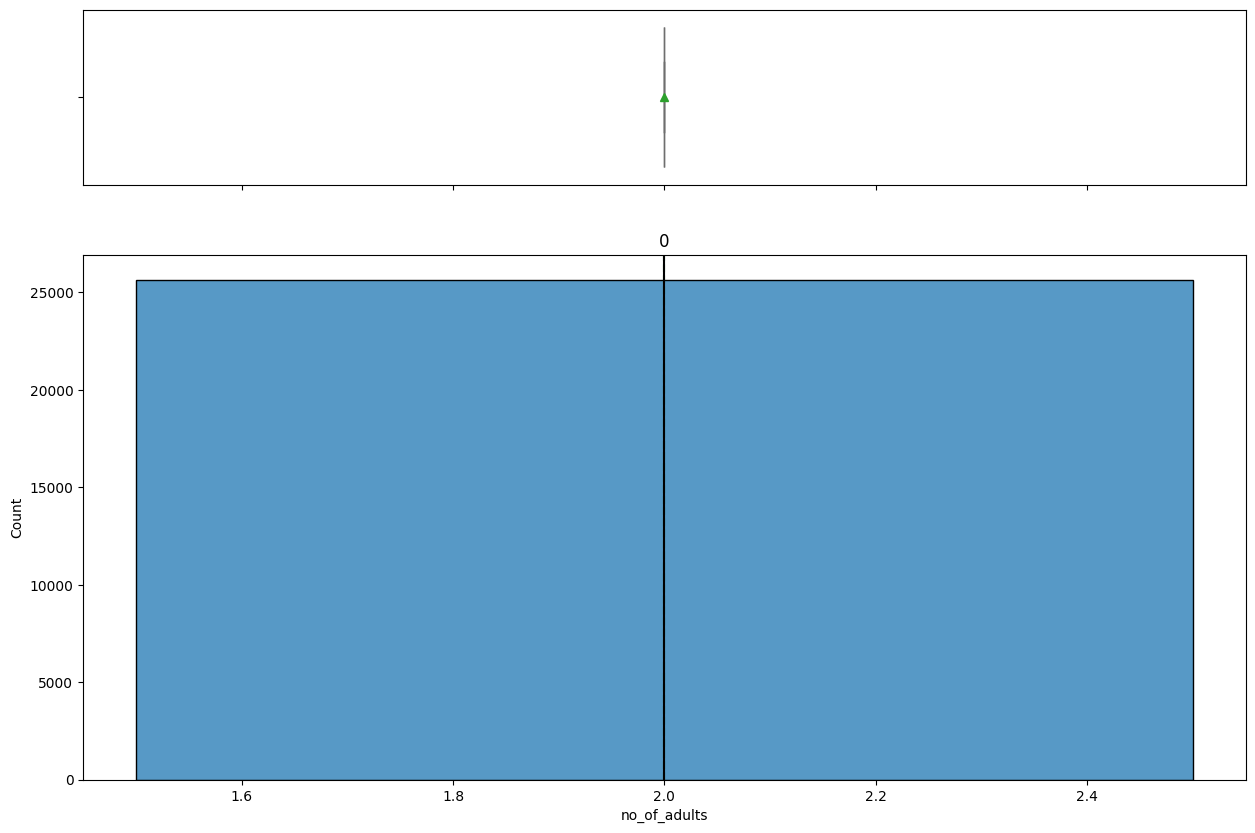

<Figure size 640x480 with 0 Axes>

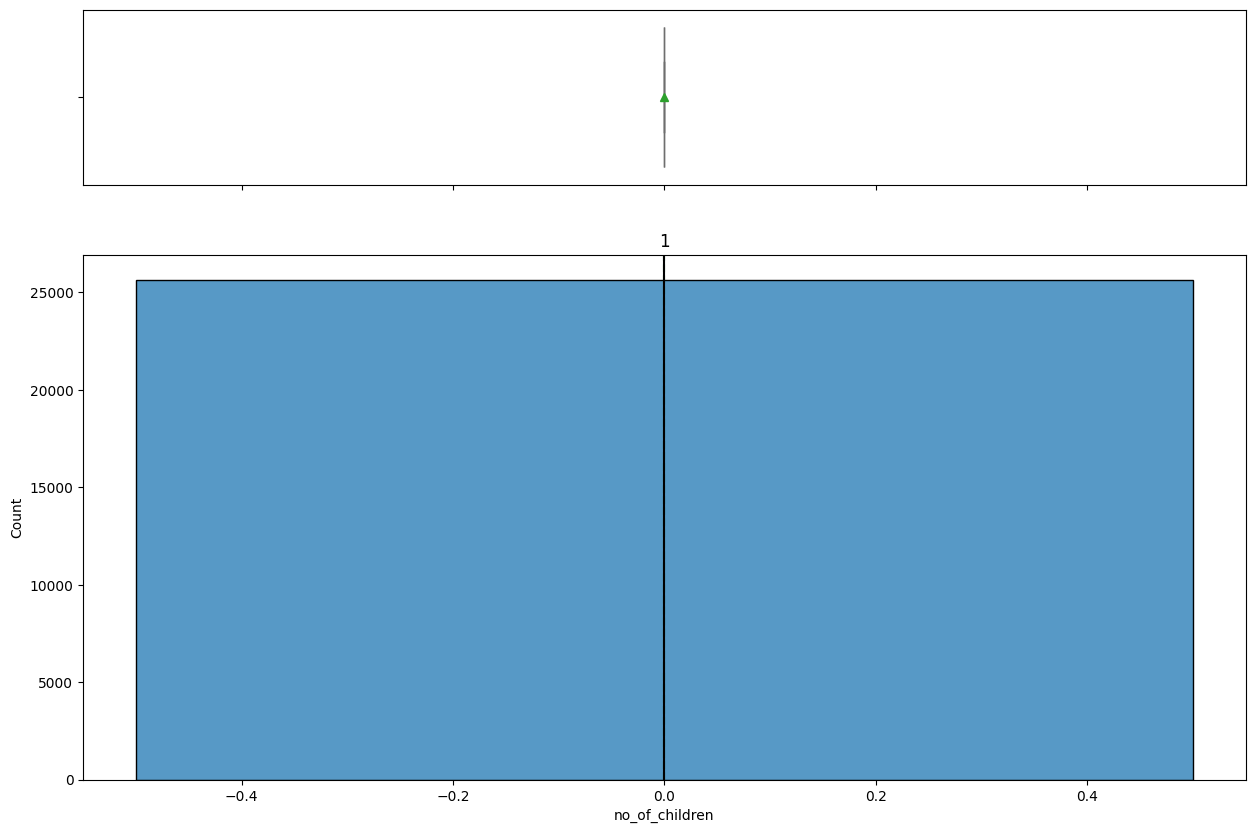

<Figure size 640x480 with 0 Axes>

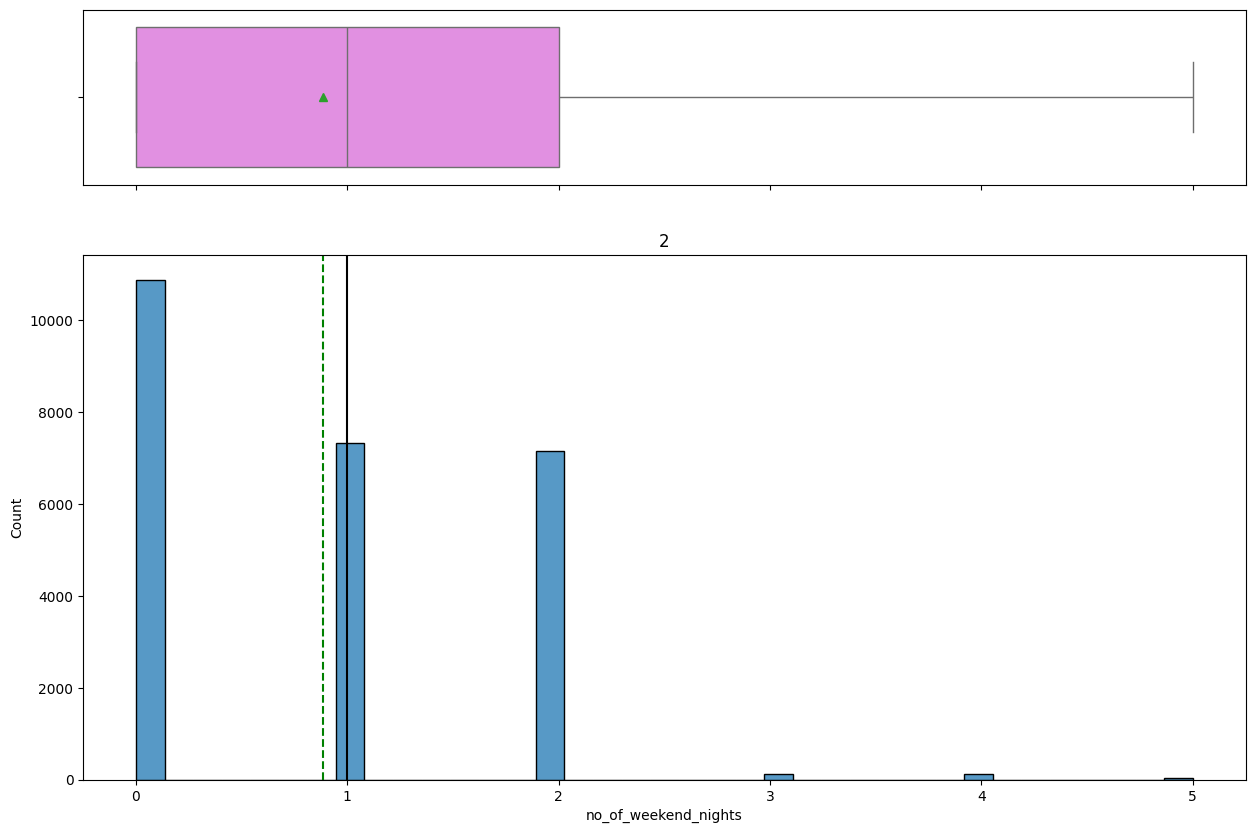

<Figure size 640x480 with 0 Axes>

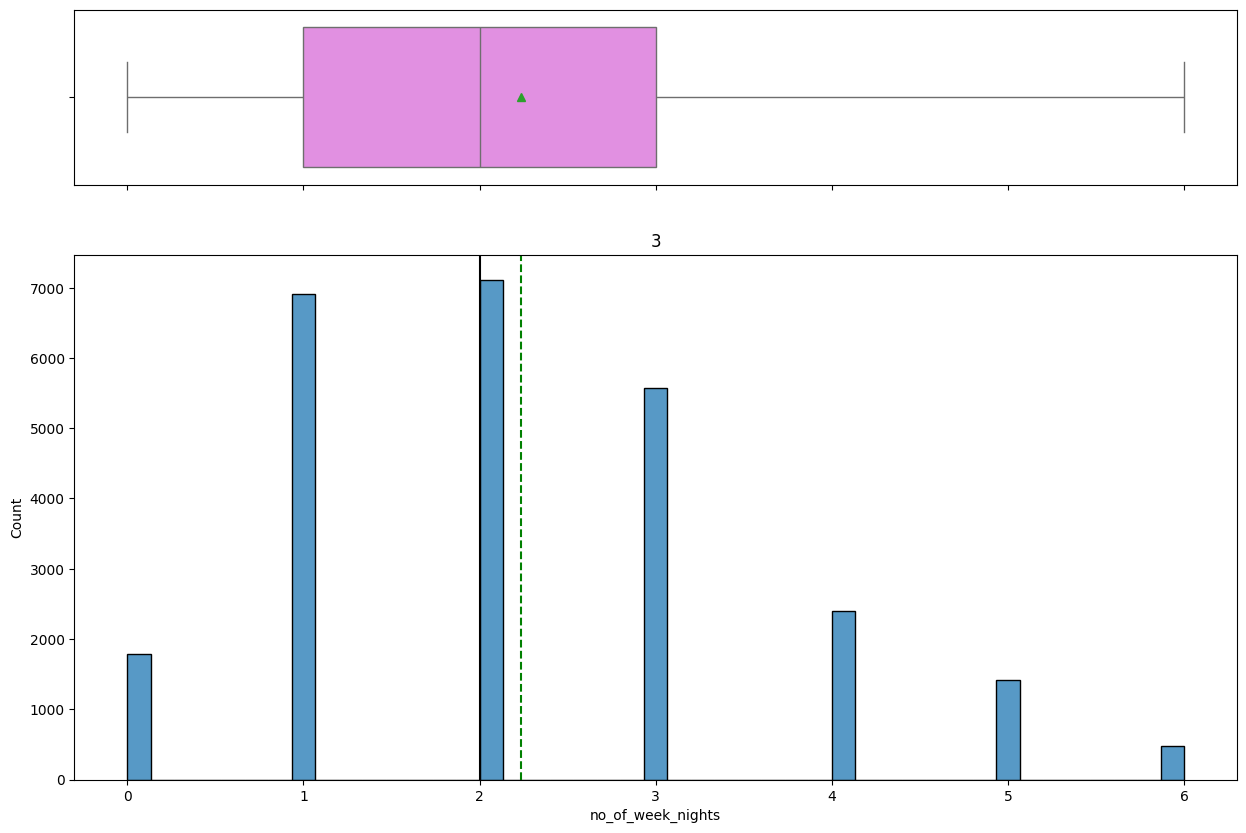

<Figure size 640x480 with 0 Axes>

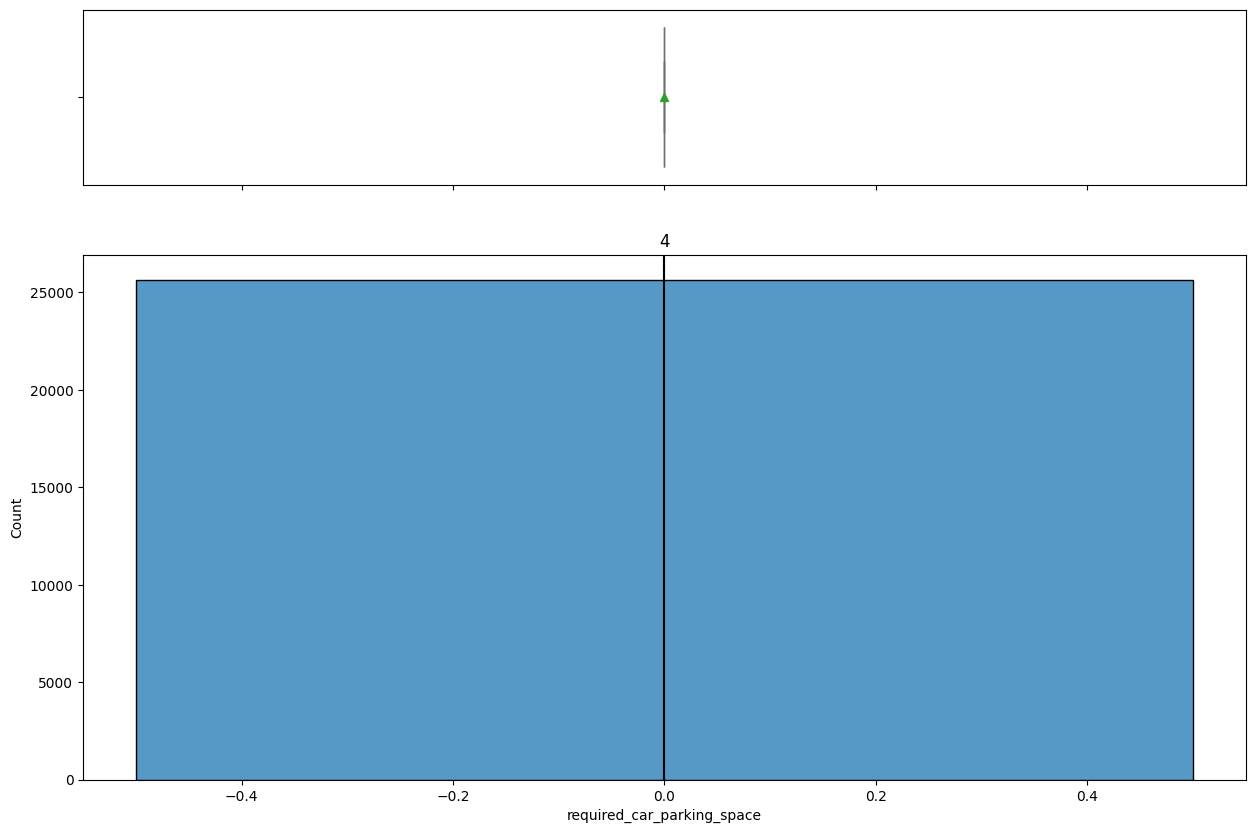

<Figure size 640x480 with 0 Axes>

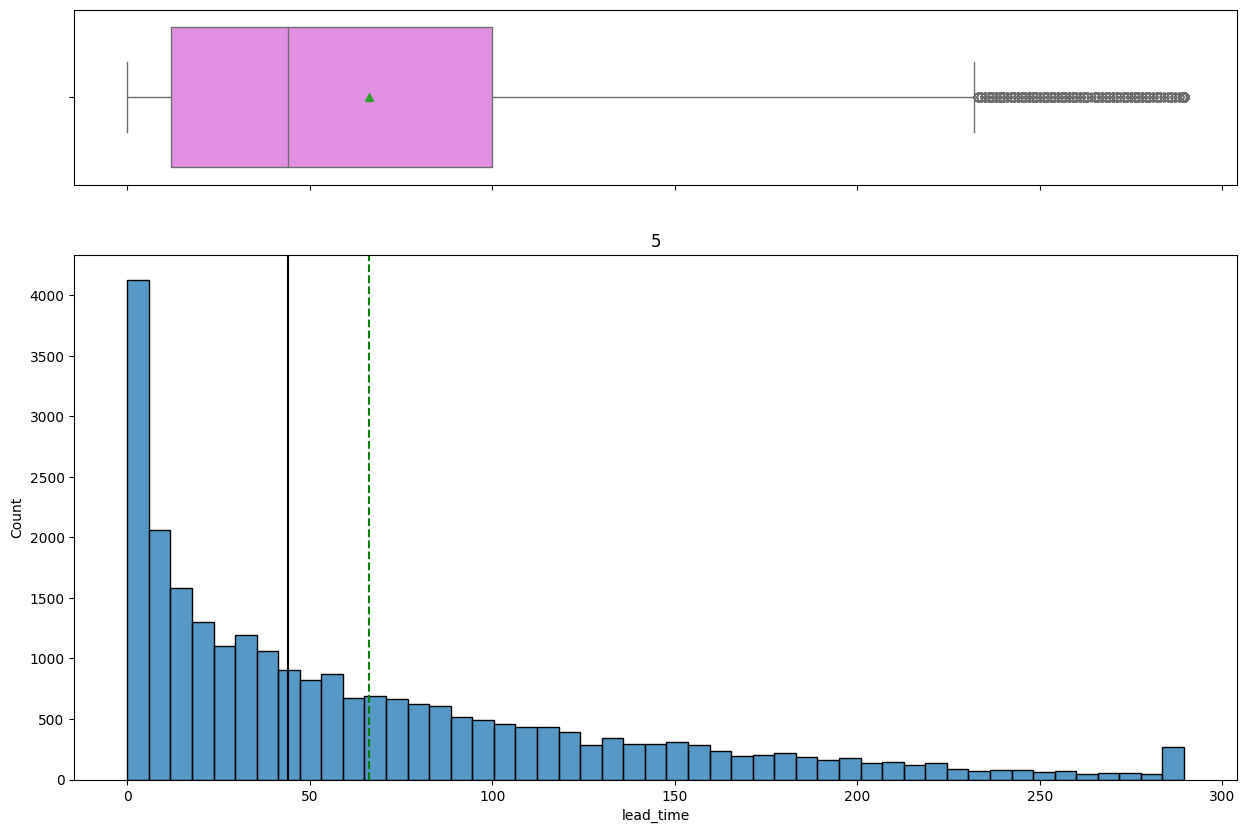

<Figure size 640x480 with 0 Axes>

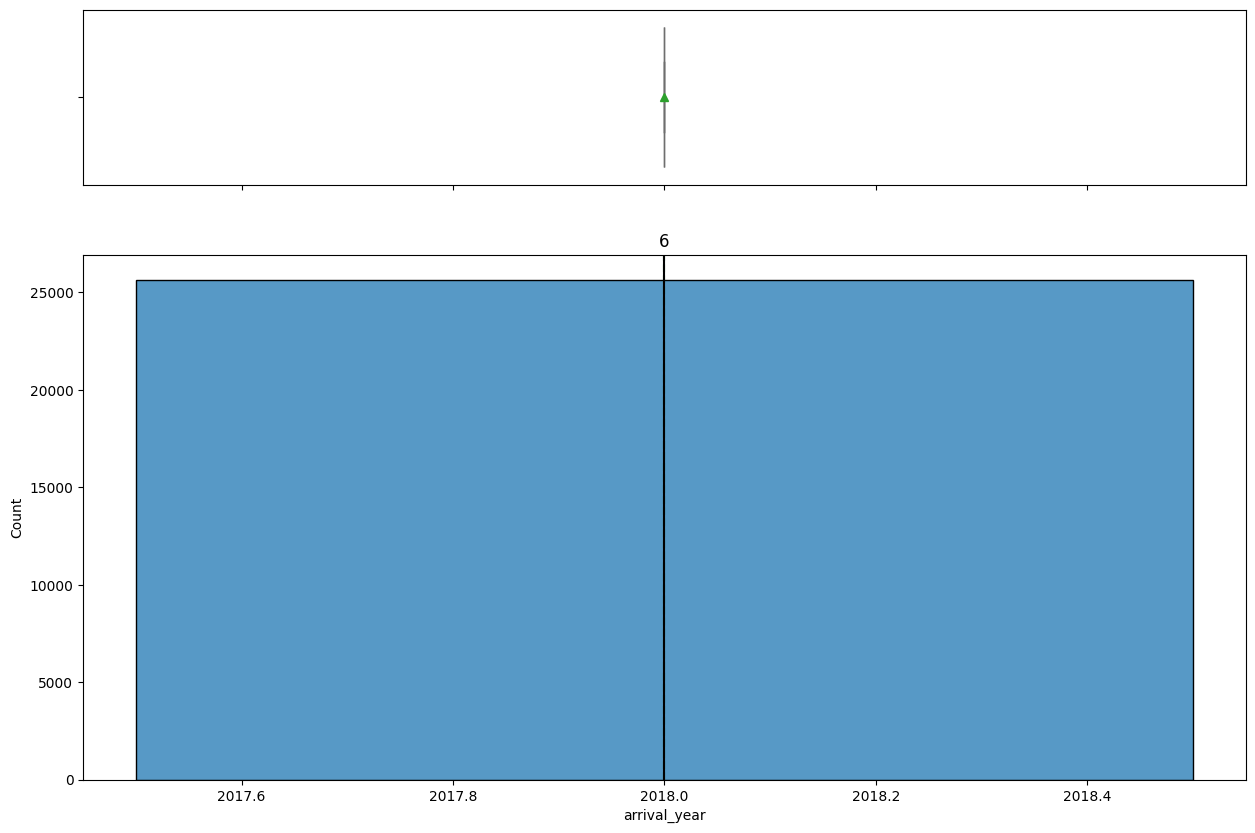

<Figure size 640x480 with 0 Axes>

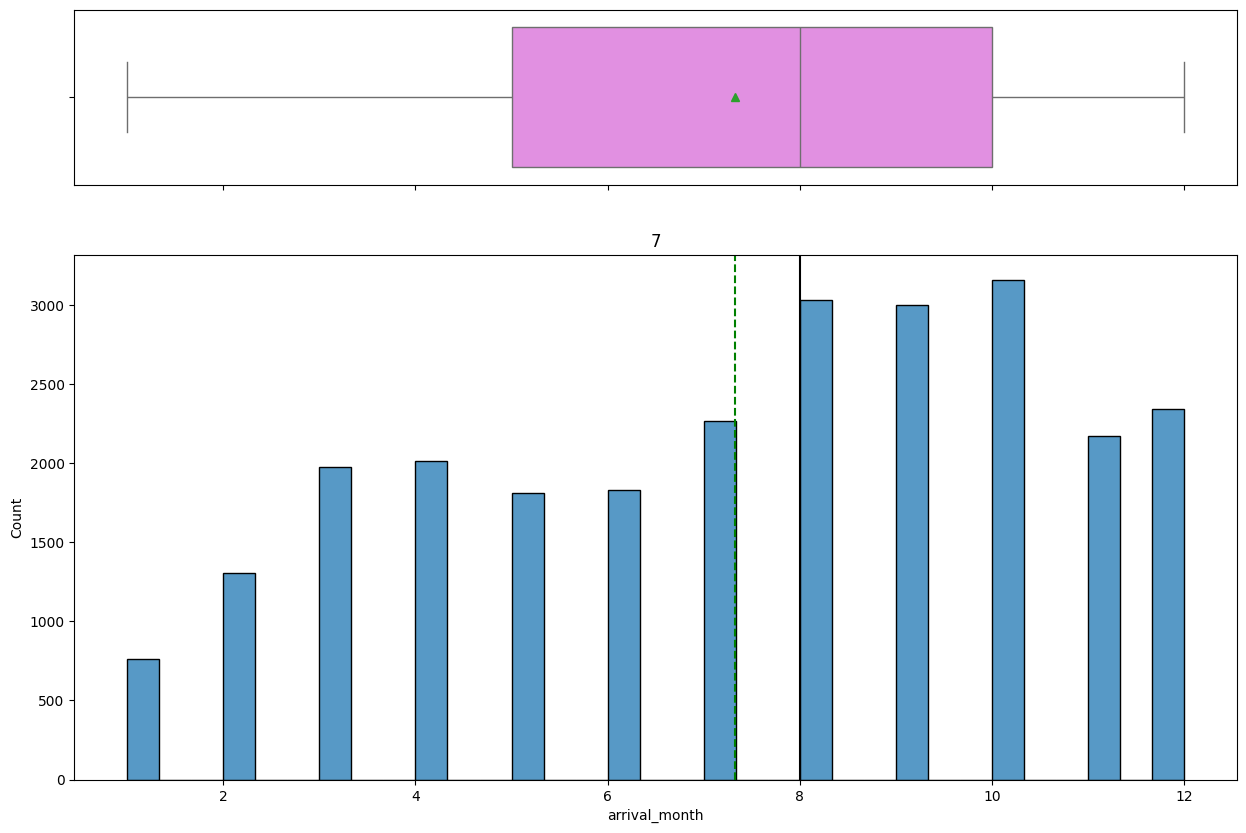

<Figure size 640x480 with 0 Axes>

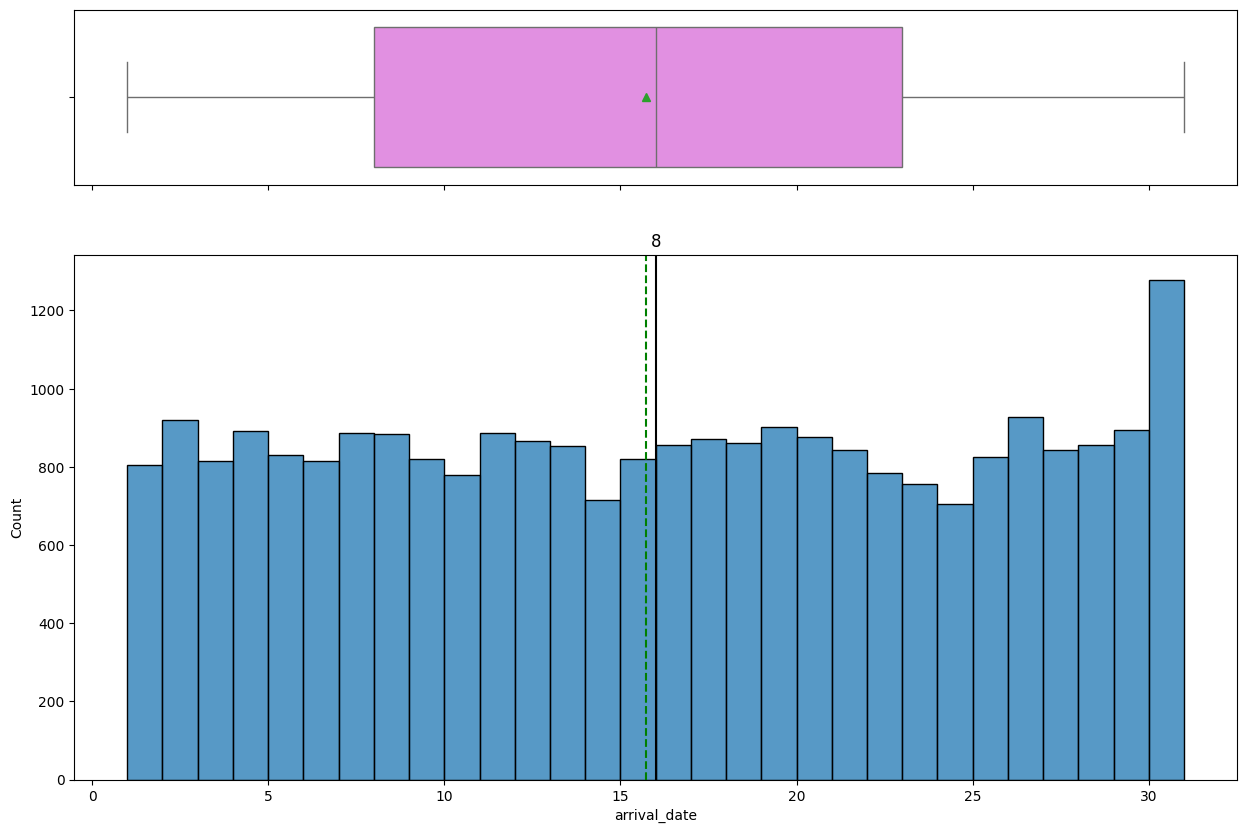

<Figure size 640x480 with 0 Axes>

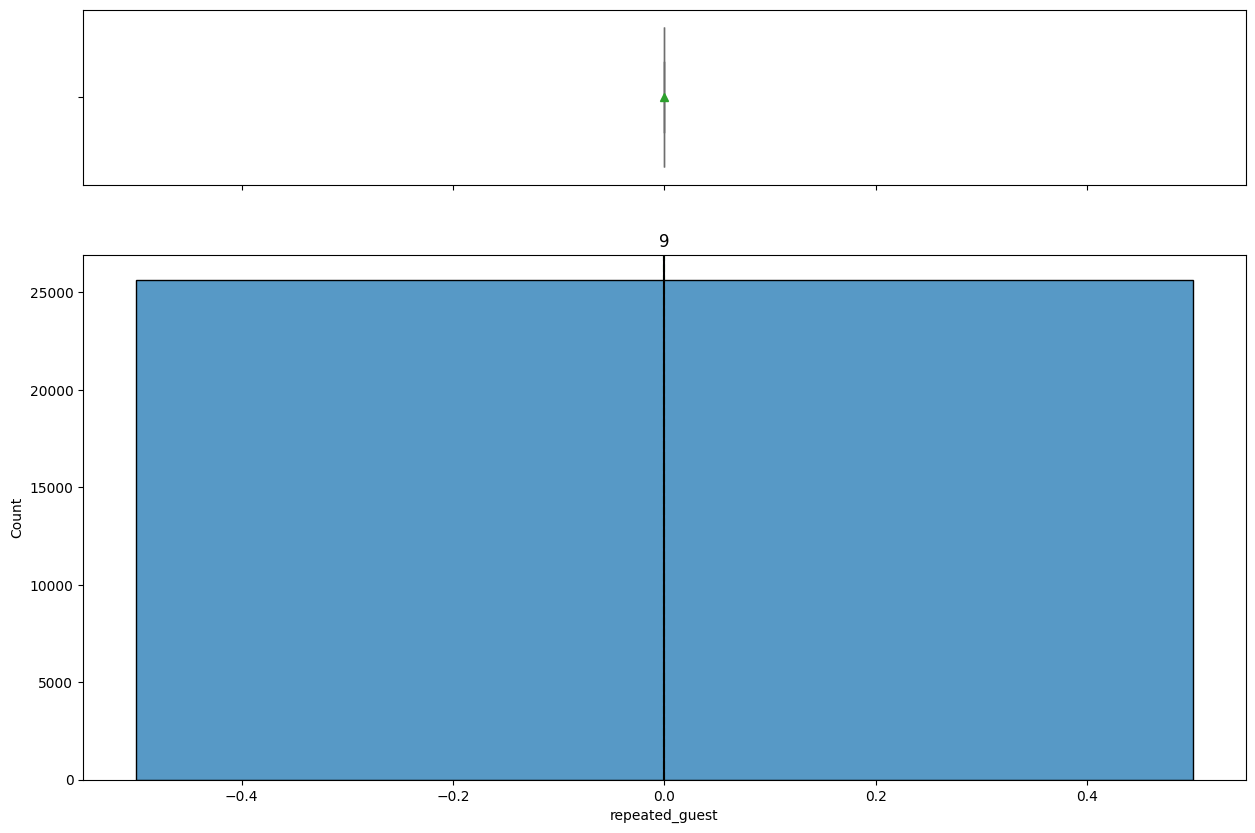

<Figure size 640x480 with 0 Axes>

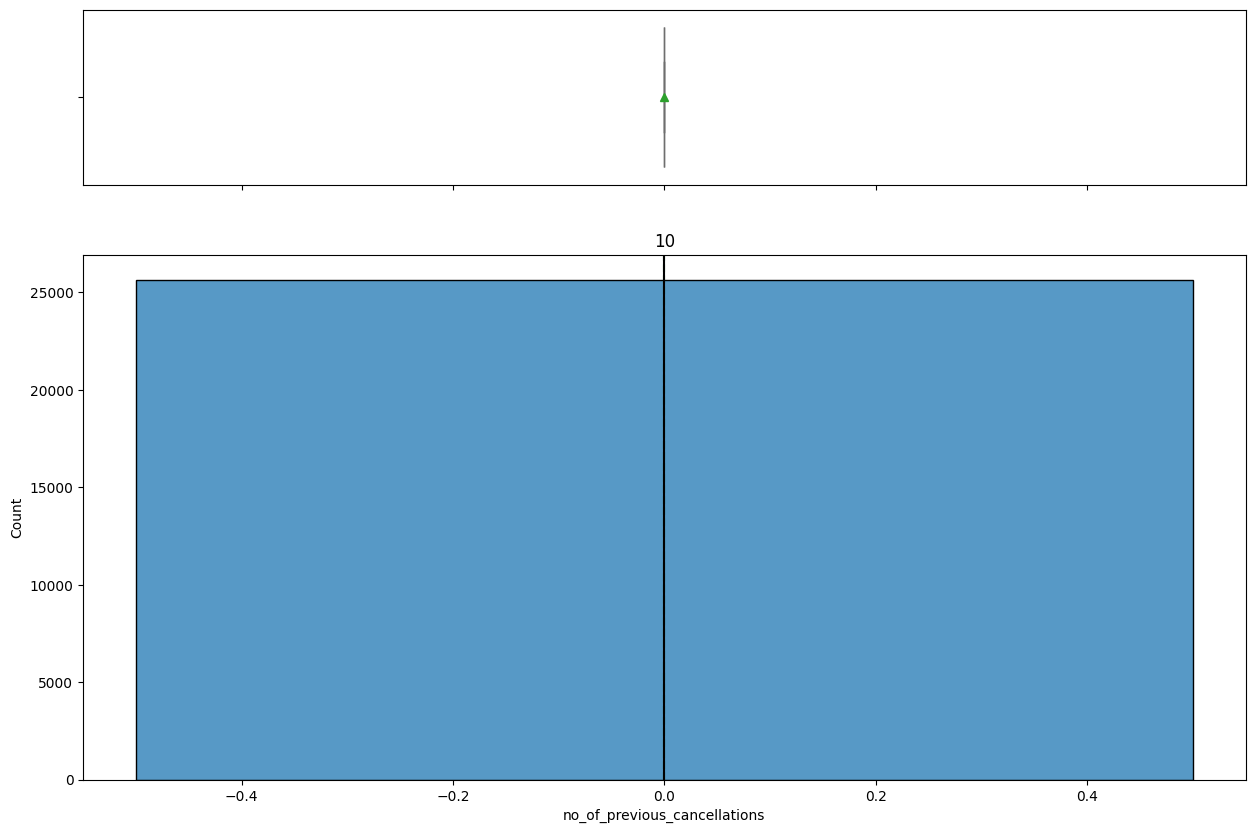

<Figure size 640x480 with 0 Axes>

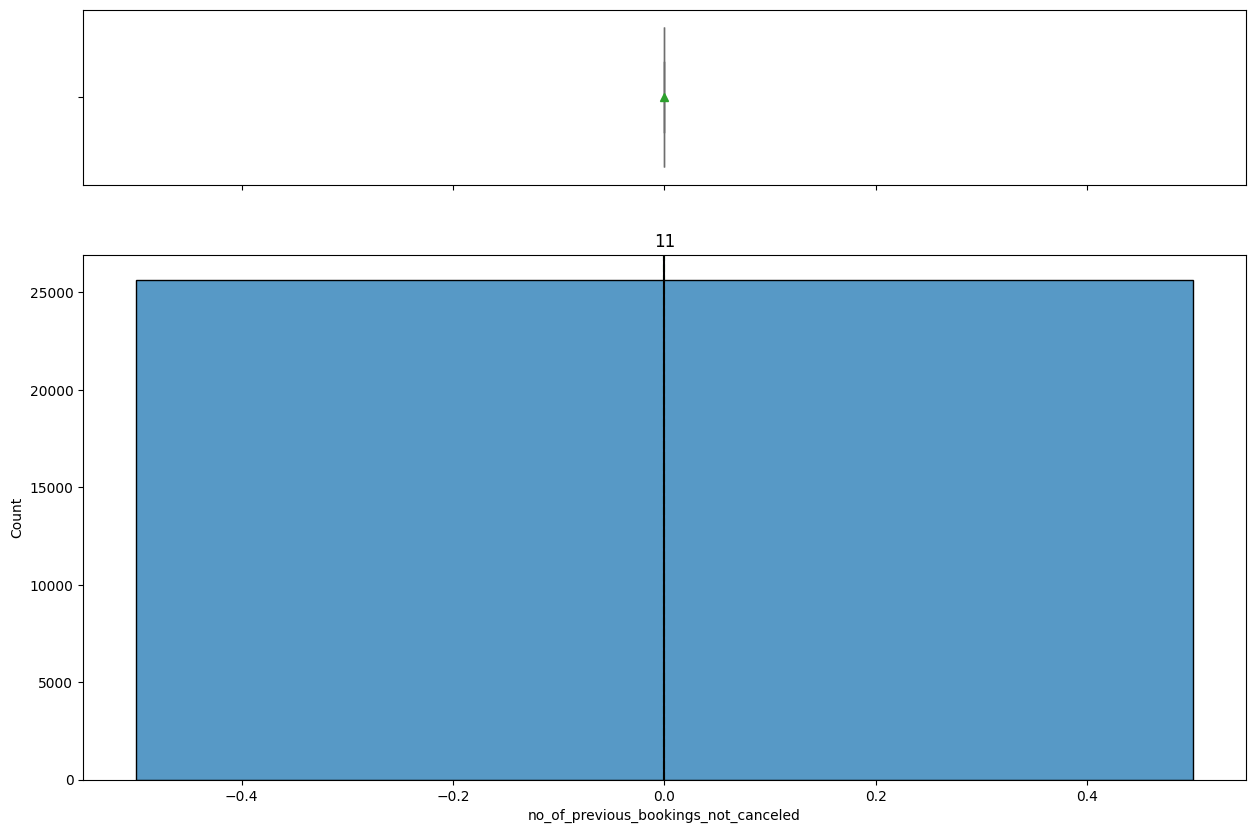

<Figure size 640x480 with 0 Axes>

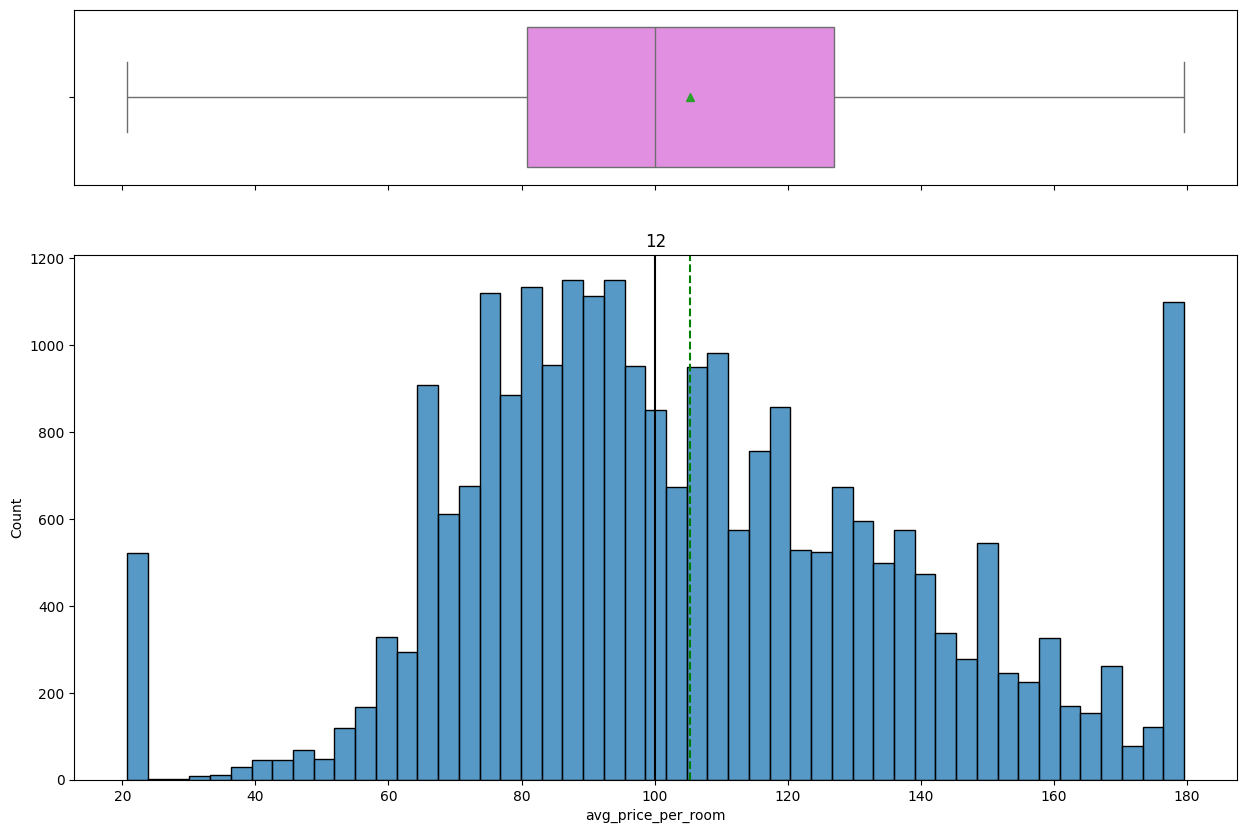

<Figure size 640x480 with 0 Axes>

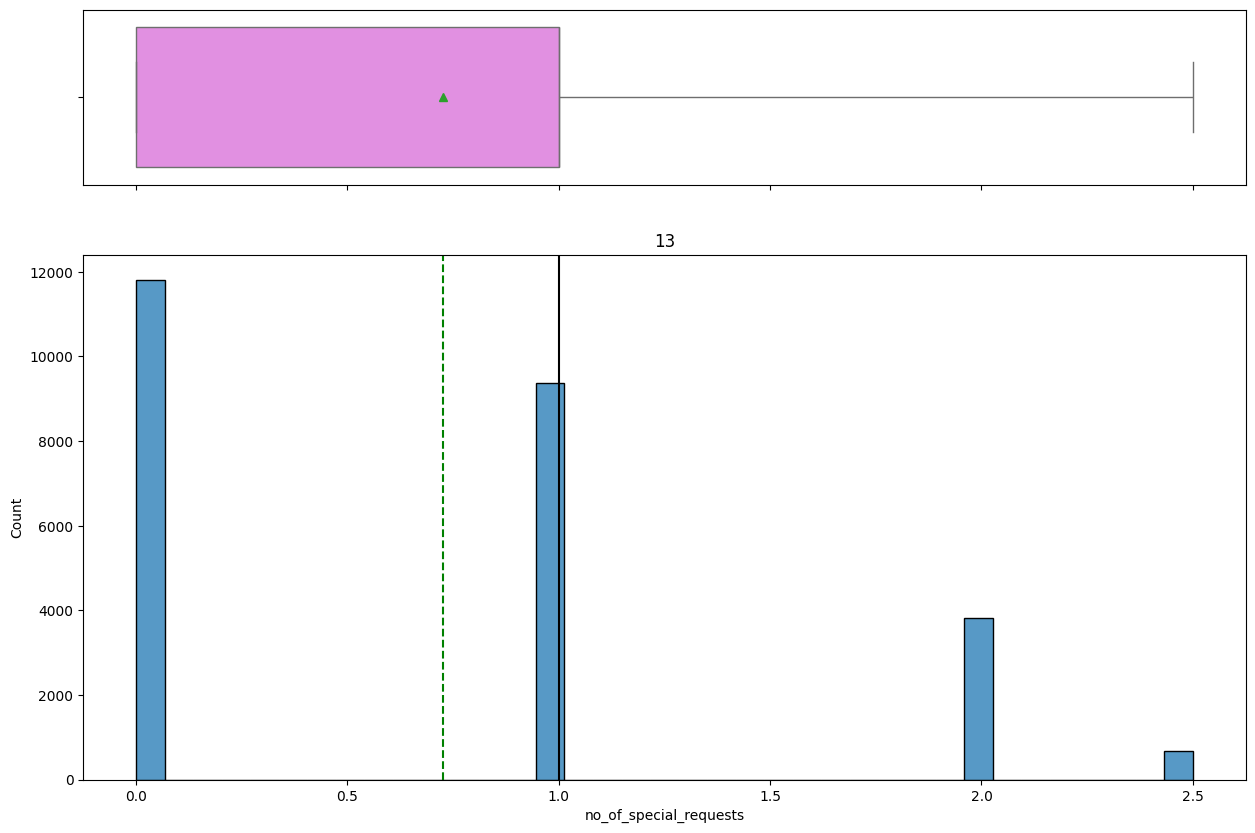

<Figure size 640x480 with 0 Axes>

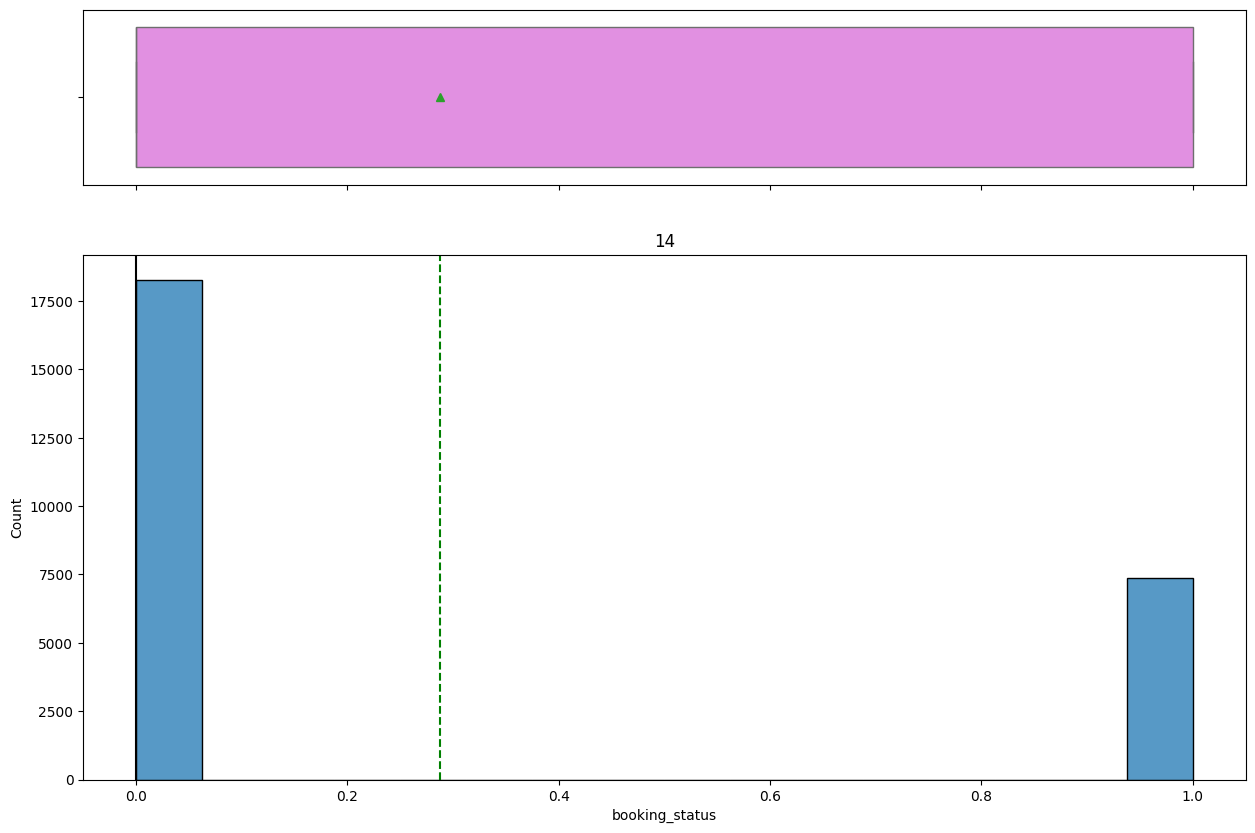

<Figure size 640x480 with 0 Axes>

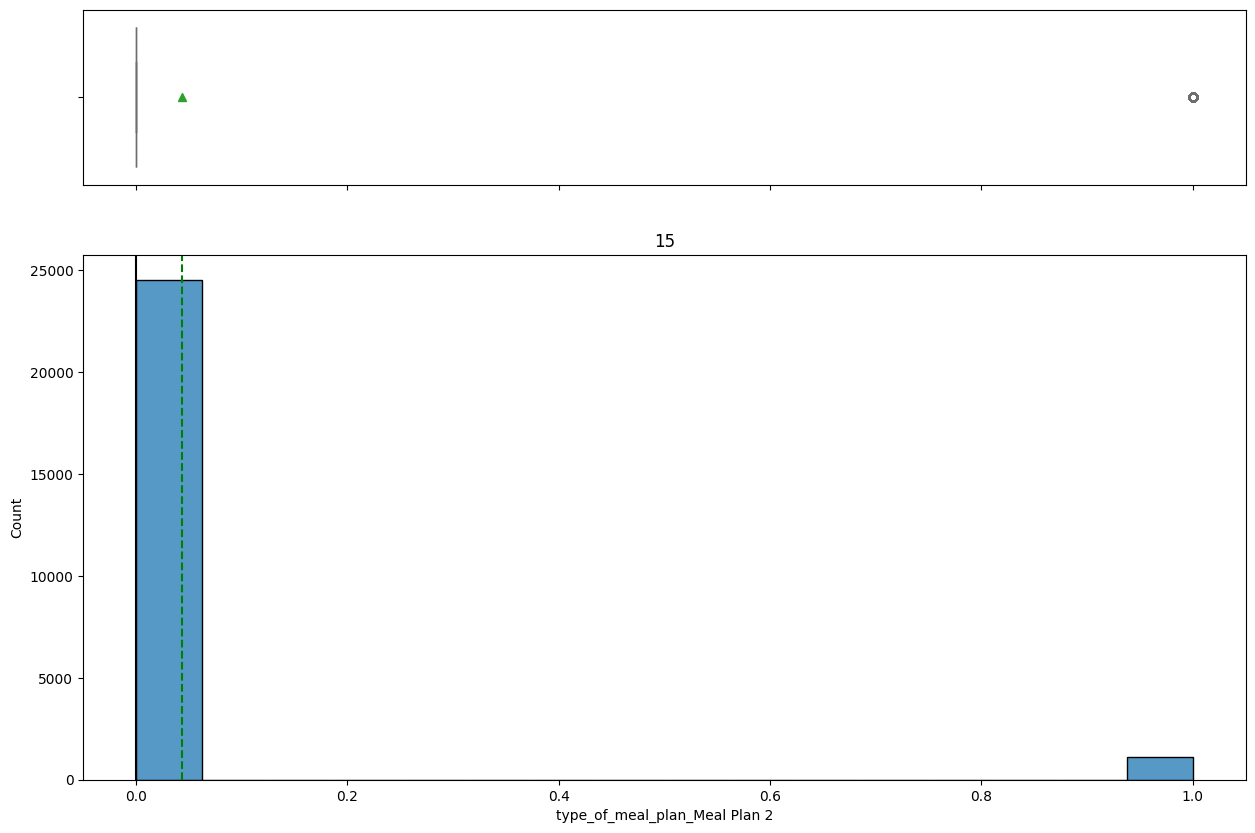

<Figure size 640x480 with 0 Axes>

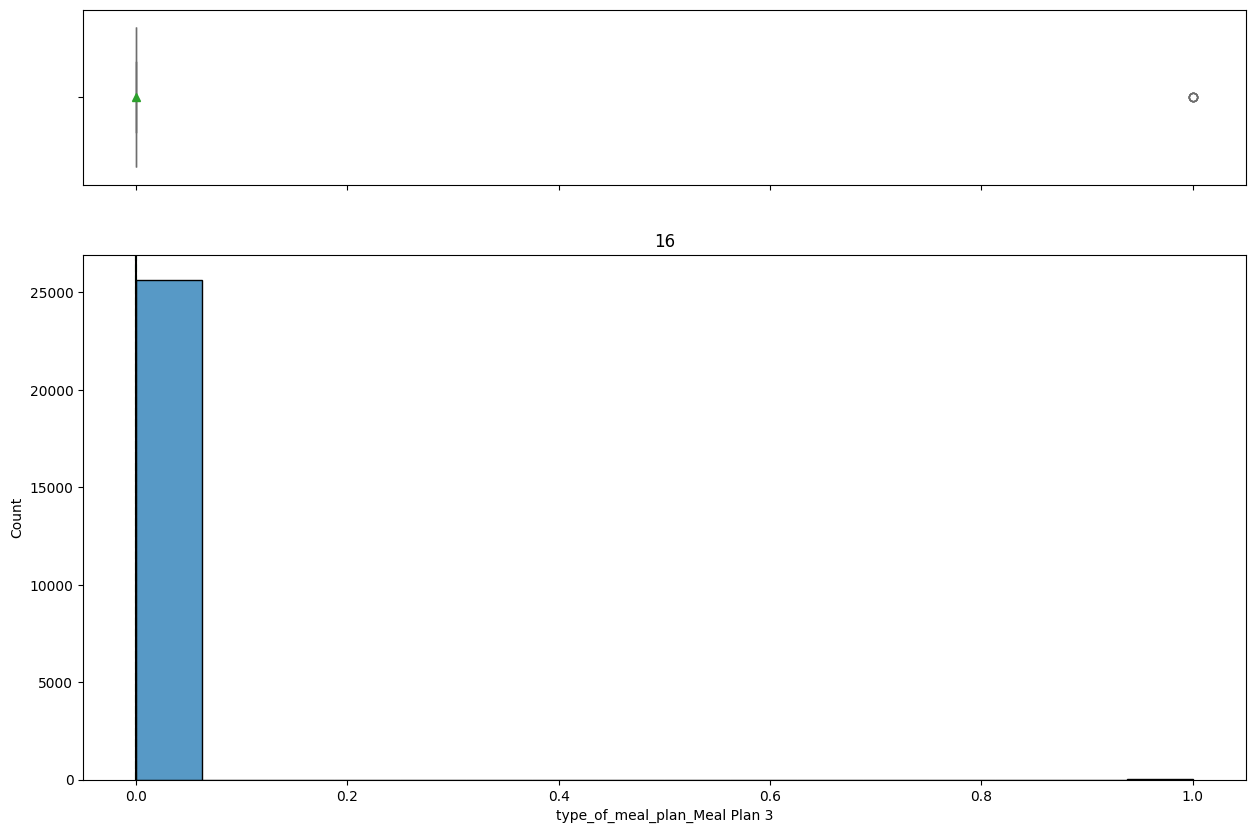

<Figure size 640x480 with 0 Axes>

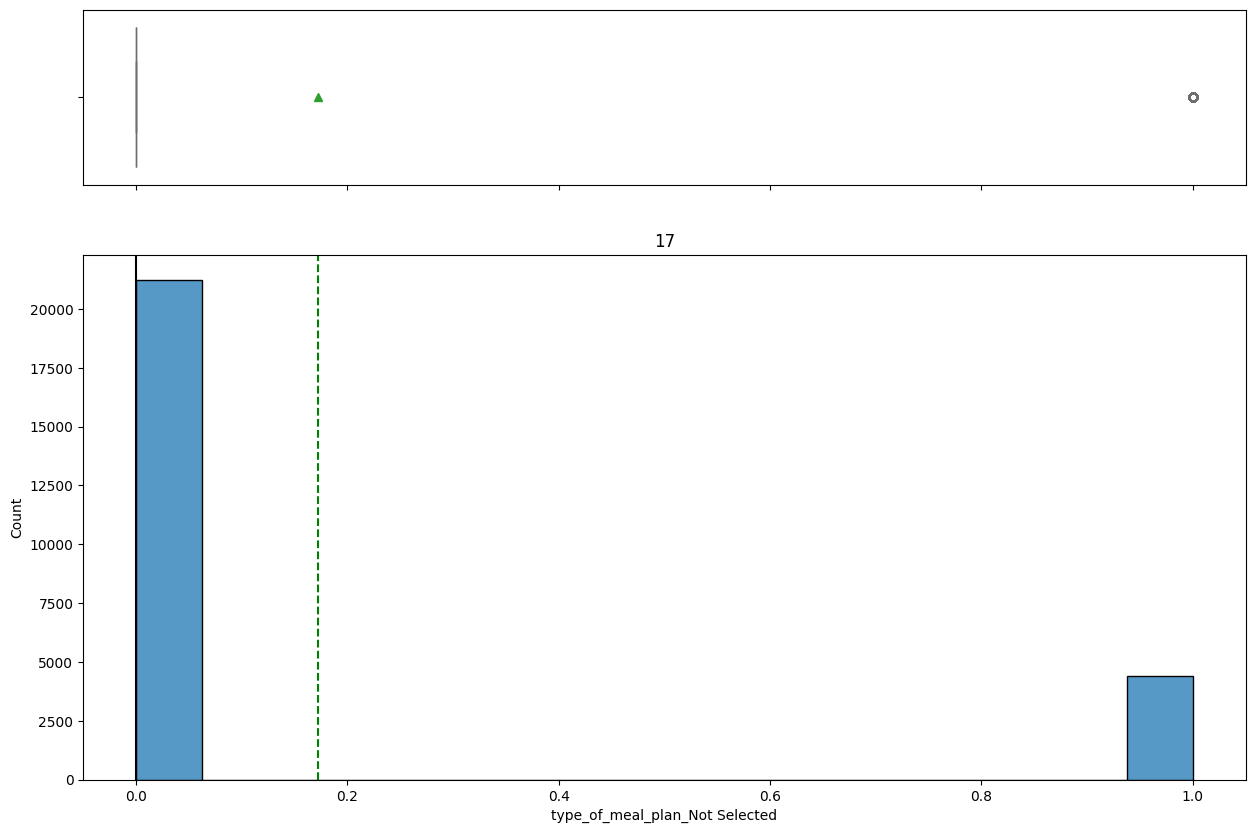

<Figure size 640x480 with 0 Axes>

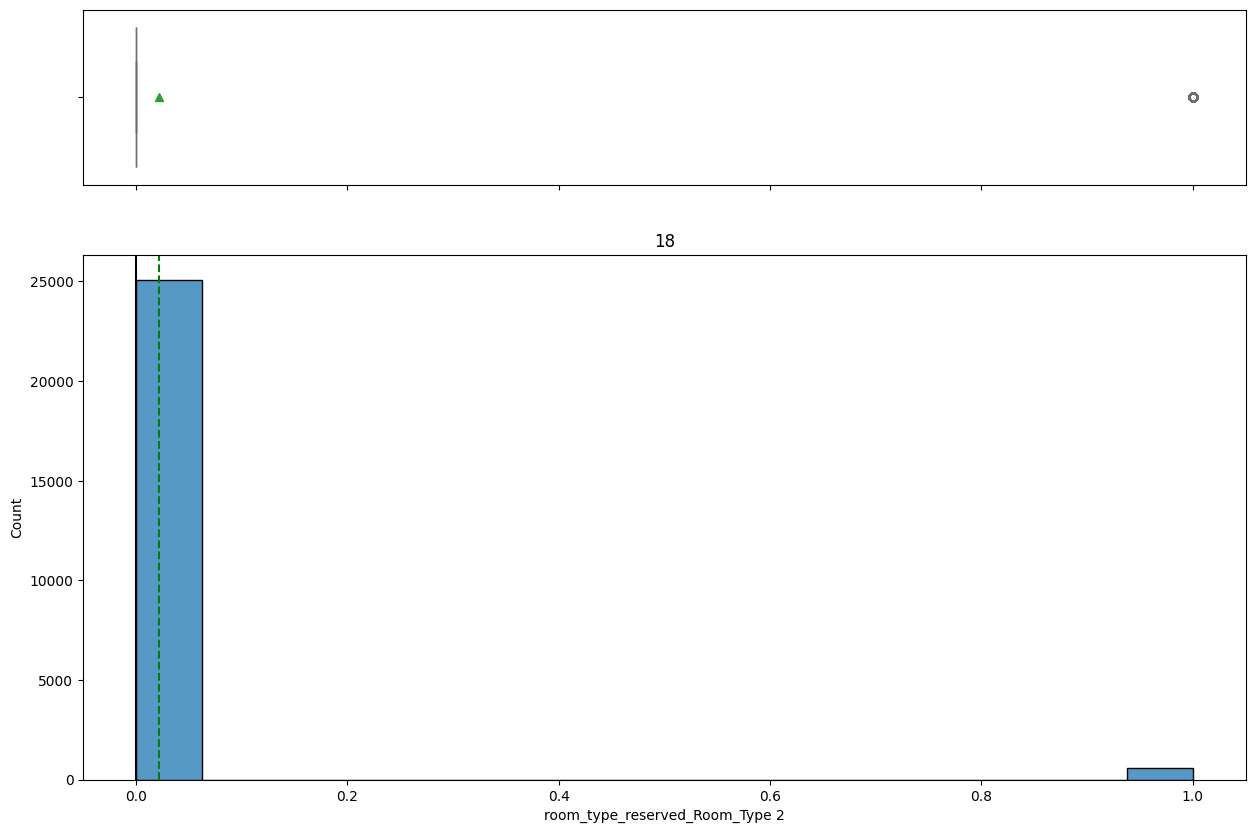

<Figure size 640x480 with 0 Axes>

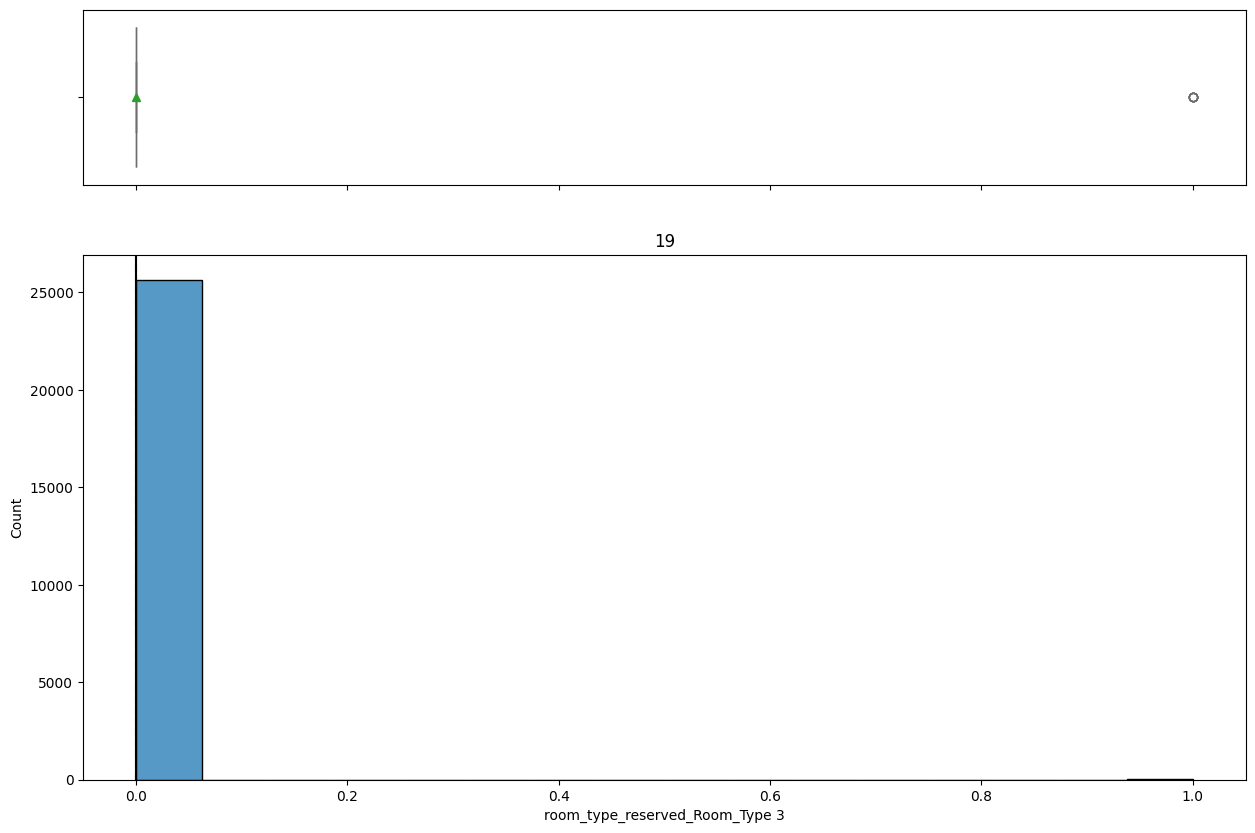

<Figure size 640x480 with 0 Axes>

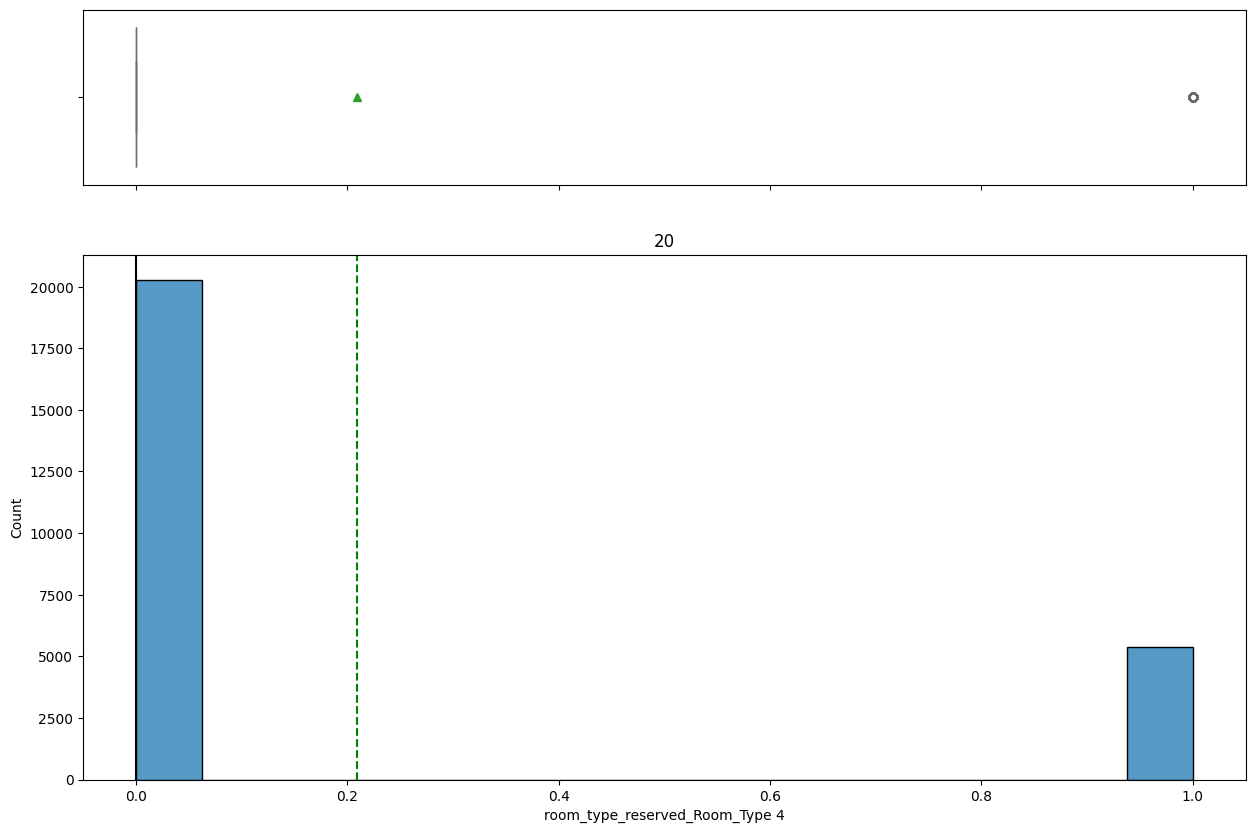

<Figure size 640x480 with 0 Axes>

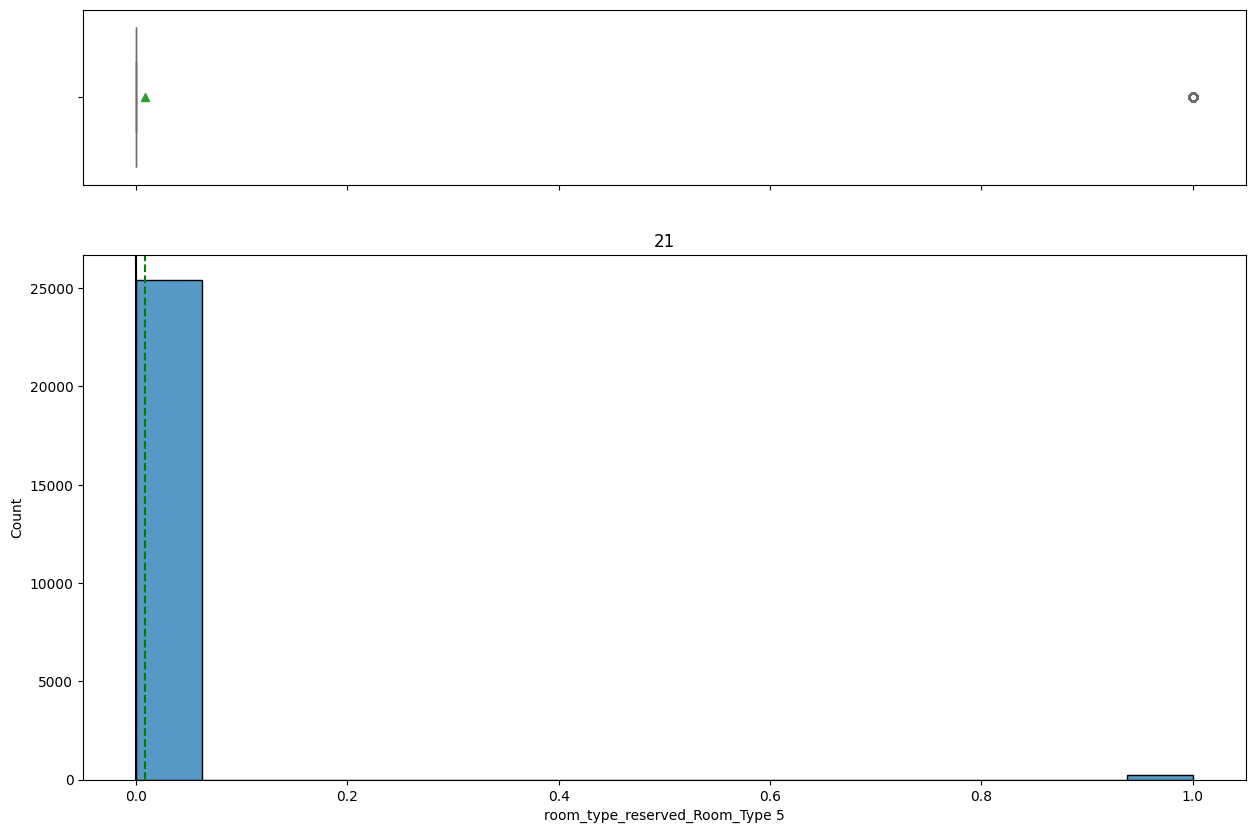

<Figure size 640x480 with 0 Axes>

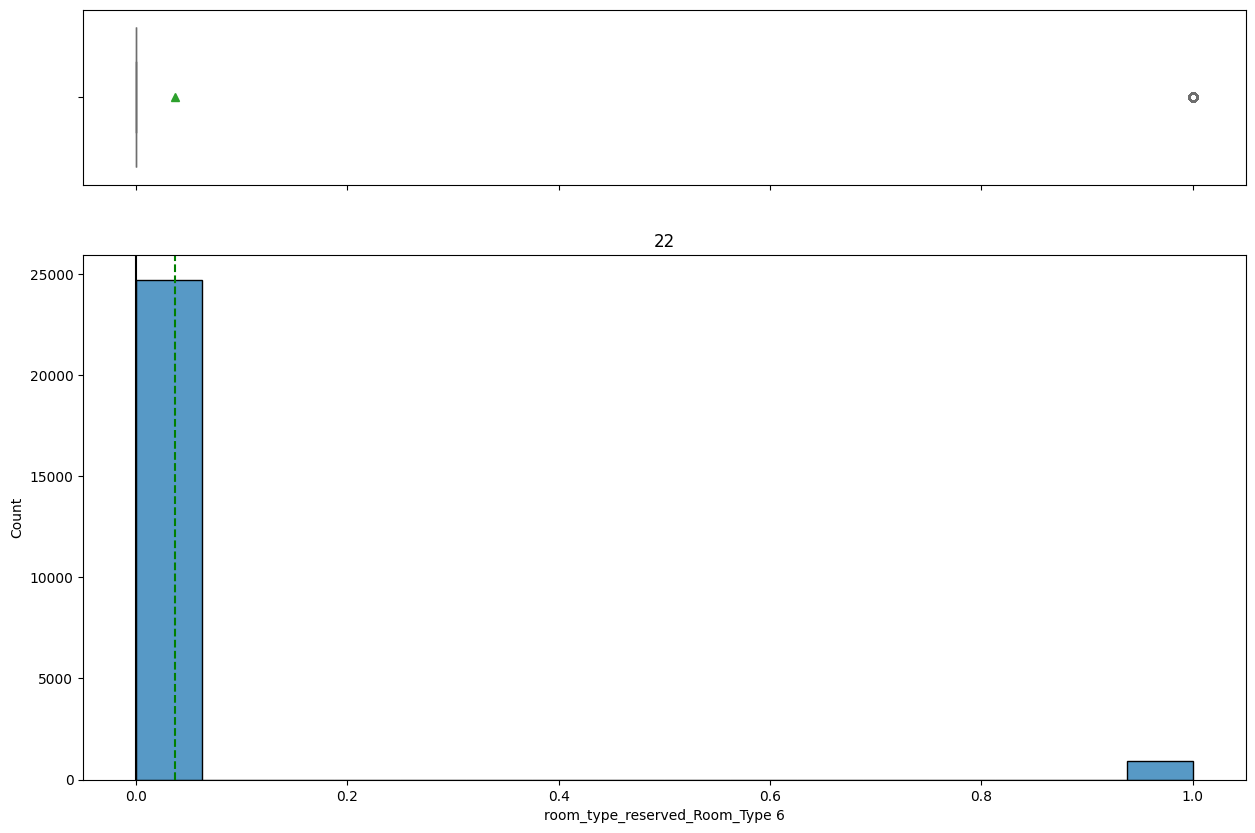

<Figure size 640x480 with 0 Axes>

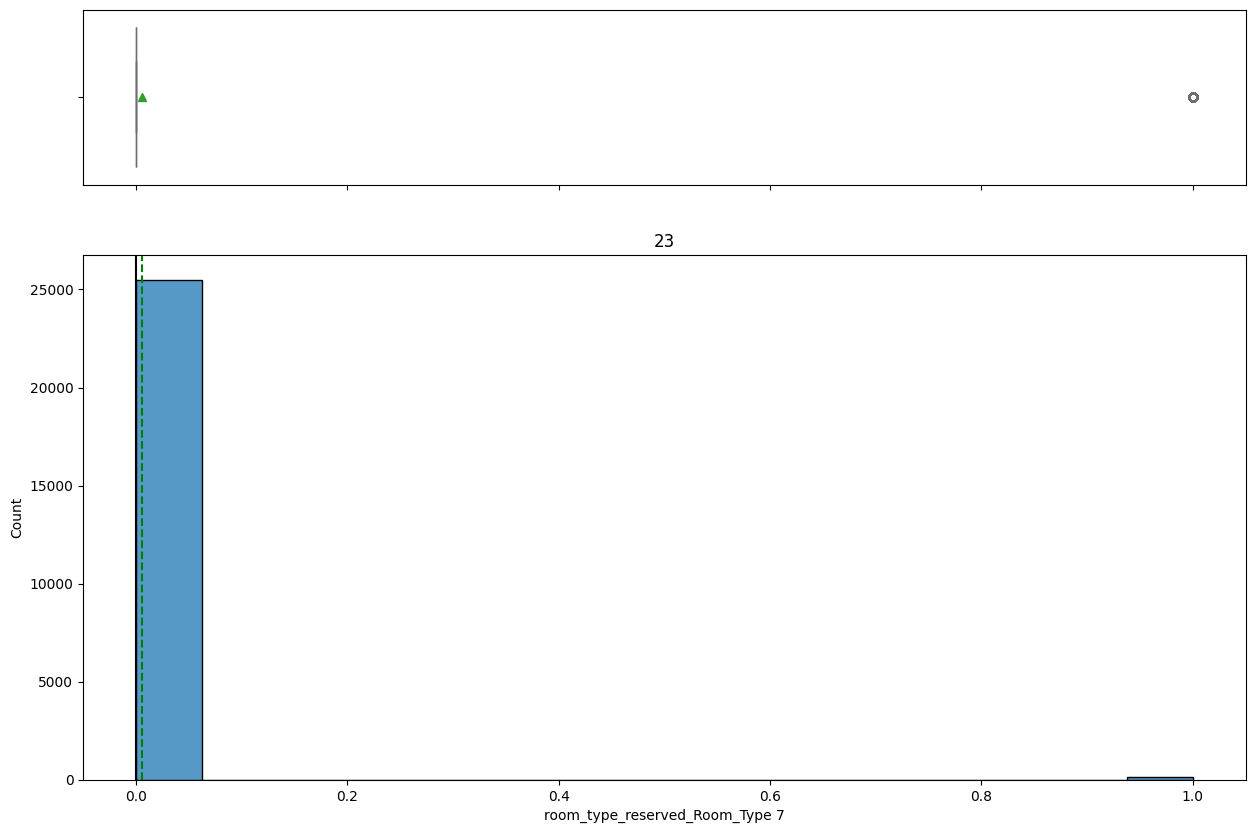

<Figure size 640x480 with 0 Axes>

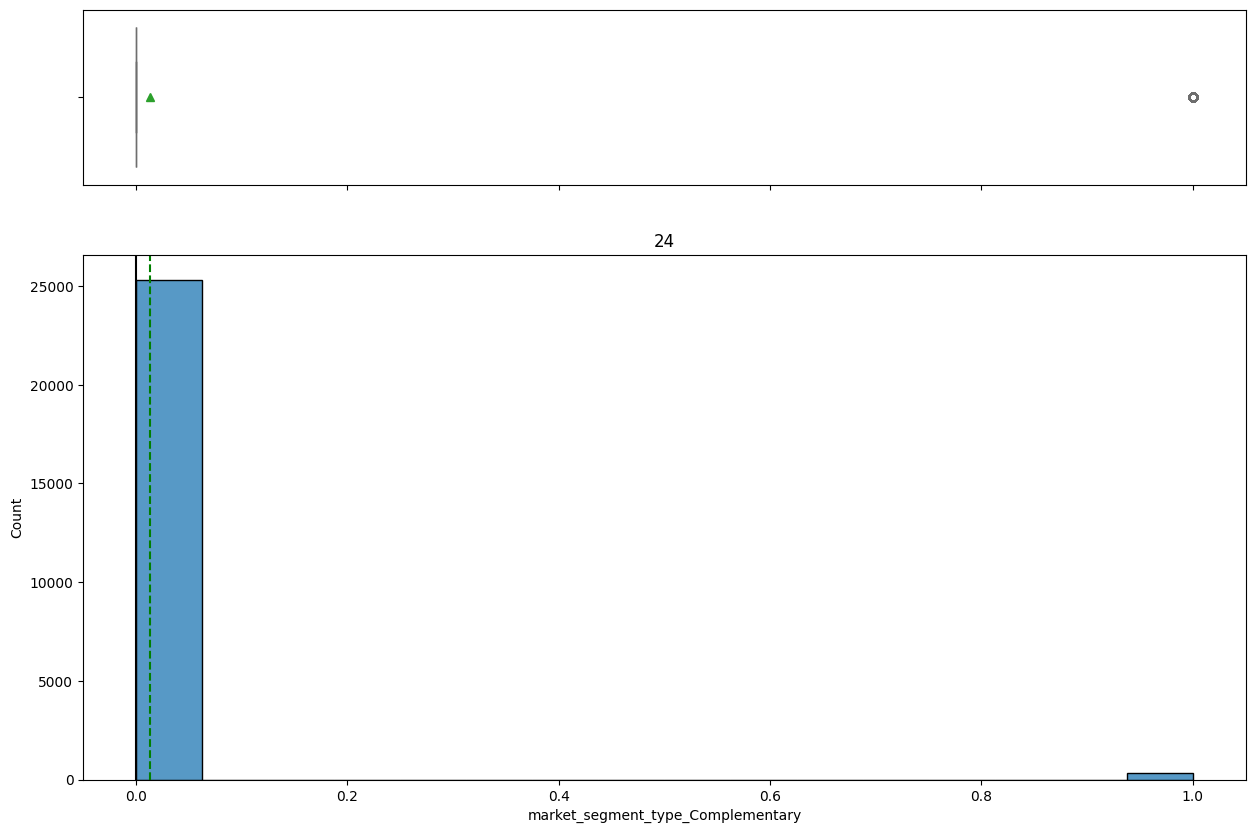

<Figure size 640x480 with 0 Axes>

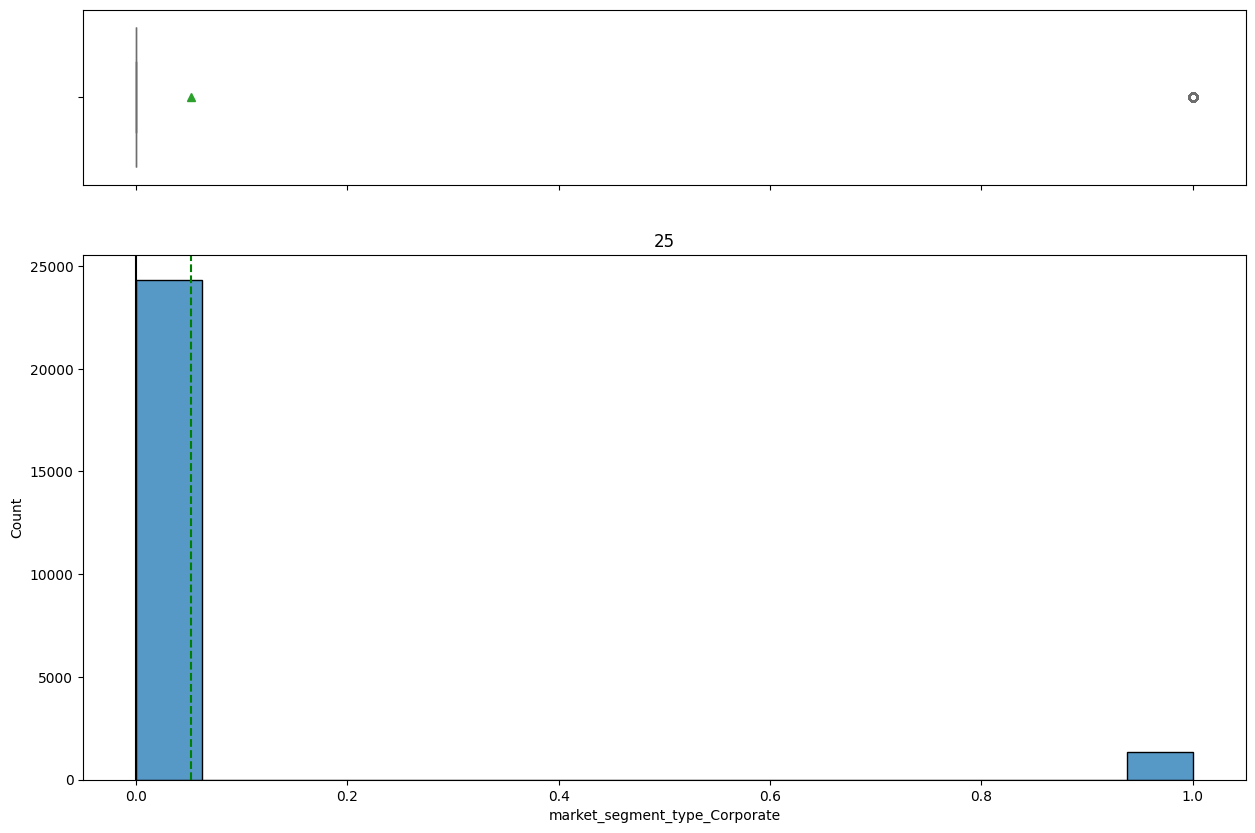

<Figure size 640x480 with 0 Axes>

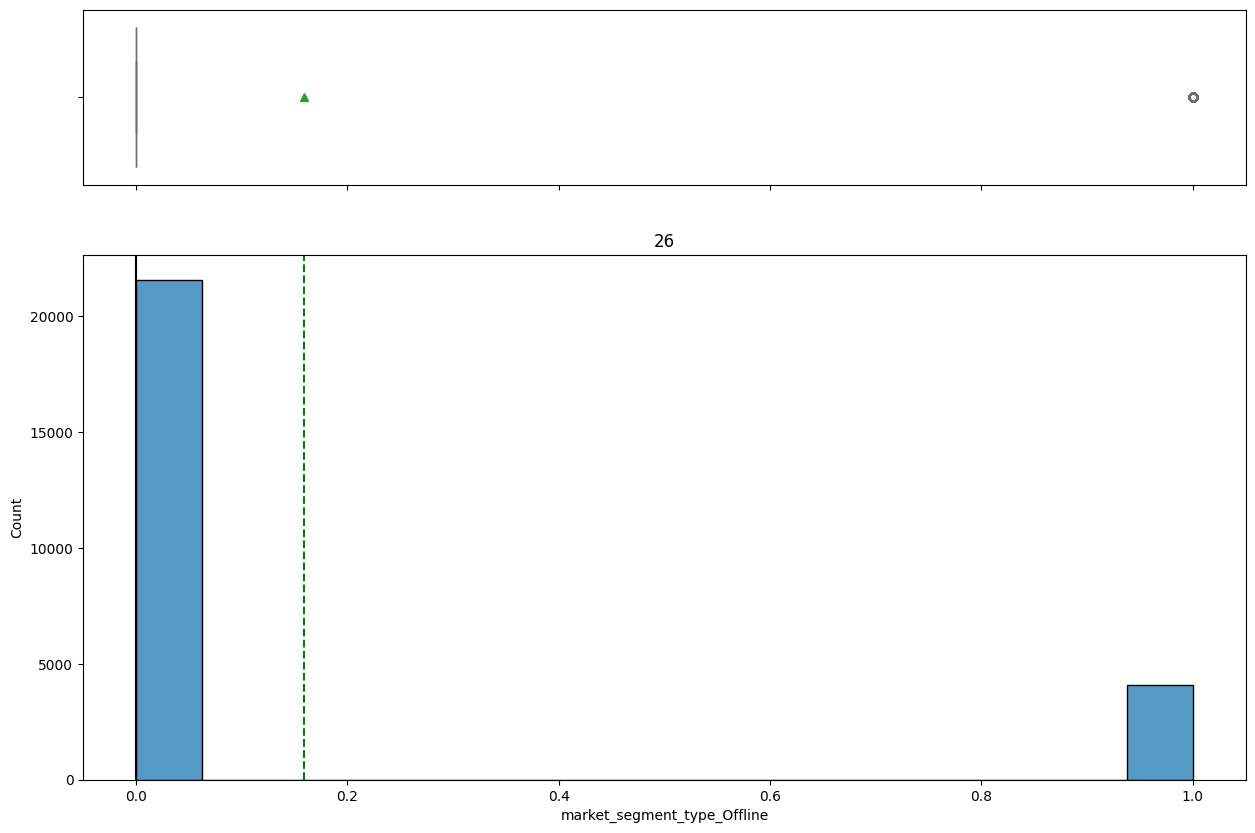

<Figure size 640x480 with 0 Axes>

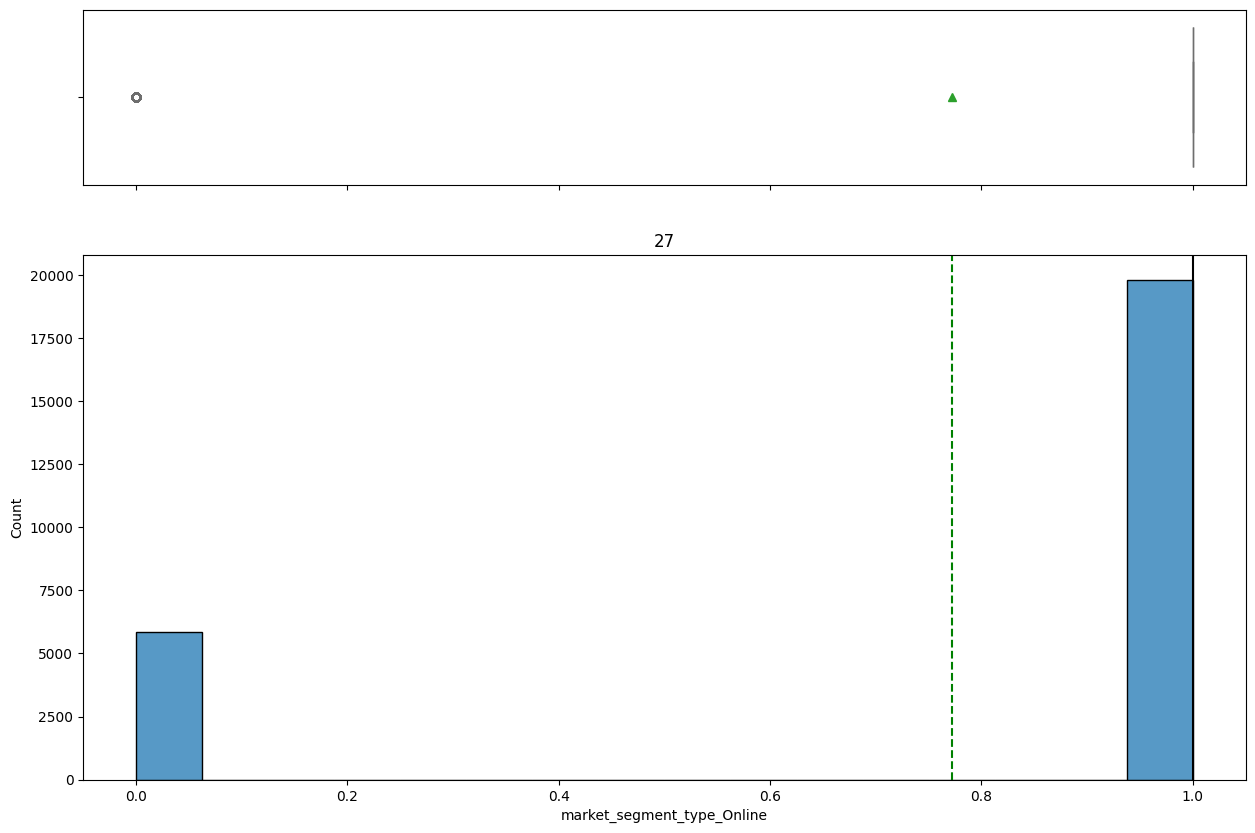

In [ ]:
# Check for continuous data types
continuous_cols = df.select_dtypes(include=[np.number])  # Select numeric columns

# Loop through continuous columns
for col in continuous_cols.columns:
    plt.figure()  # Create a new figure for each plot
    histogram_boxplot(df, col)  # Pass the column name (feature)

    # Extract the column title from the DataFrame
    col_title = df.columns.get_loc(col)  # Get the column index and use it to retrieve the title
    plt.title(col_title)  # Set the plot title using the column title
    plt.show()

**Observation**

After pre-model process, their some minor changes to some features.

- The entire data set now only contain new guest with the repeat guest mostly cleared due to being duplicates.

- There are no more children included in any of the bookings.

- There is also no previous booking cancelled because all the bookings remaining in the dataset are all from new guests.

####Visualizing Categorical variables.

In [ ]:
# Check for categorical data types
categorical_cols = df.select_dtypes(include=['object'])  # Select object columns (categorical data)


# Loop through categorical columns
for col in categorical_cols.columns:
   plt.figure()  # Create a new figure for each plot

   labeled_barplot(df, col)  # Plot bar chart of categorical variables

   plt.show();

- As expected, there are no more categorical variables, hence there will be no issues running the dataset on a regression model related to this.

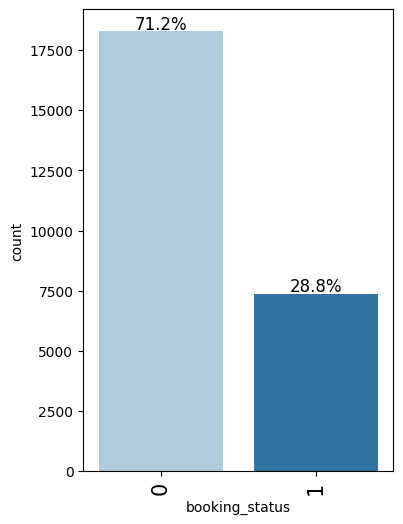

In [ ]:
labeled_barplot(df,'booking_status', perc=True, n=None)

- Bookings cancelled has reduced from 32% to 28.8 percent after pre-processing. Bookings not cancelled has increased form 68% to 71%.

###Bivariate analysis

####Correlation heat map

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

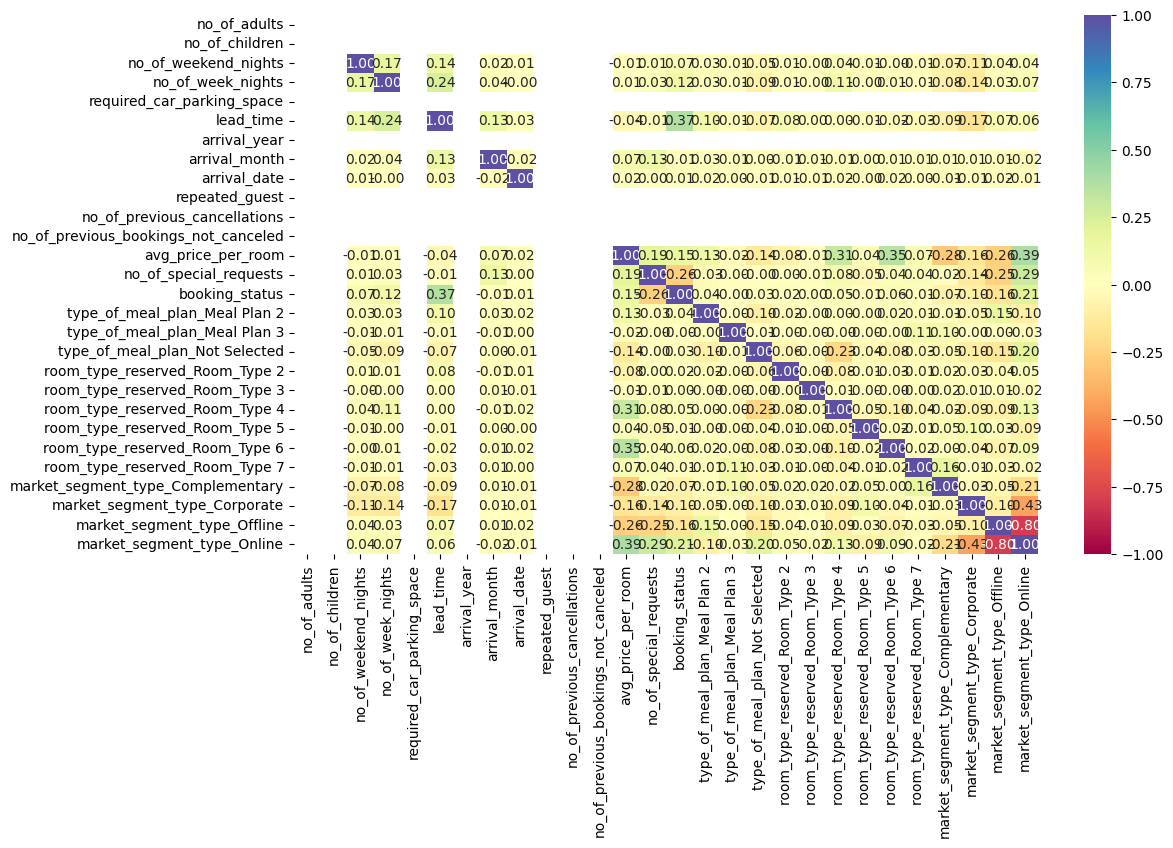

In [ ]:
#plotting correlation heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

####Plotting arrival month per room vs market segment type.

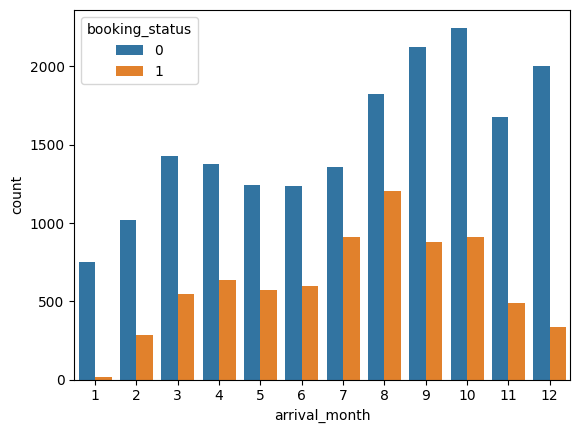

In [ ]:
####Plotting Arrival month vs booking status.
plt.figure()
sns.countplot(df, x = 'arrival_month', hue ='booking_status', )
plt.show();

- Cancellations are higher in months of August, September, and October.

####Plotting number of special requests vs booking status.

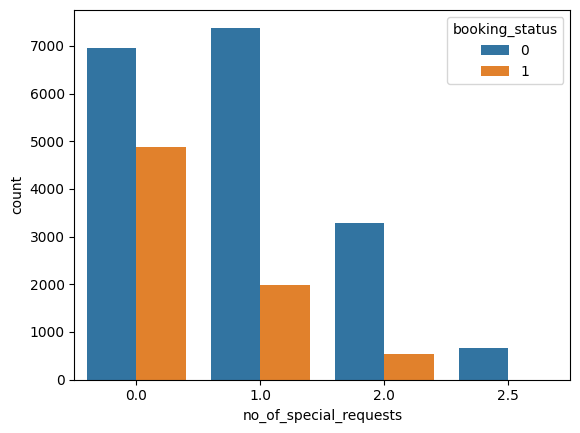

In [ ]:
plt.figure()
sns.countplot(df, x= 'no_of_special_requests', hue ='booking_status', )
plt.show();

- Guest with no special requests may be more likely to cancel

####Plotting segment_type_Online  vs booking status.




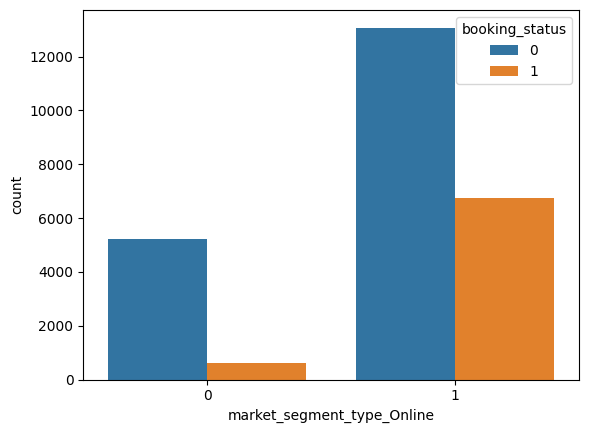

In [ ]:
plt.figure()
sns.countplot(df, x = 'market_segment_type_Online', hue ='booking_status', )
plt.show();

- Guest who book online are more likely to cancel their bookings.

####Average price per room vs Booking status

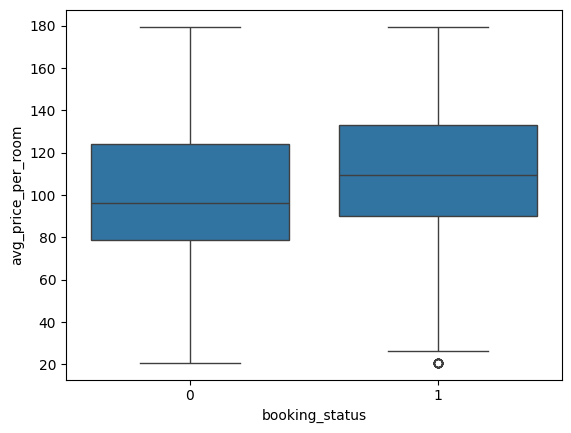

In [ ]:
plt.figure()
sns.boxplot(df, y = 'avg_price_per_room', x ='booking_status', )
plt.show();

- Guest who book rooms above 100 EUROS may be more likely to cancel booking.

####Lead time vs booking status

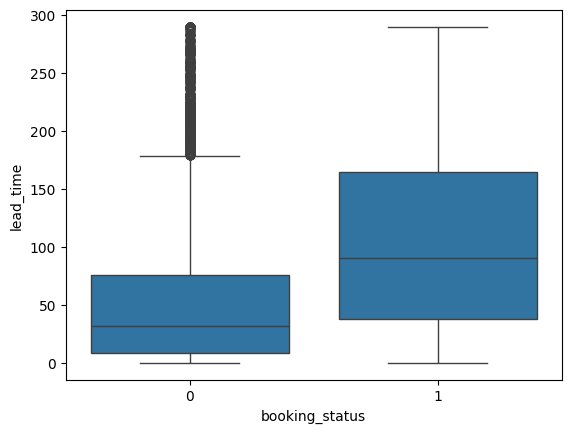

In [ ]:
plt.figure()
sns.boxplot(df, y = 'lead_time', x ='booking_status', )
plt.show();

- Lead time above 100 days may be more likely to cancel.

##Managing multicolinearity.

###Checking multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

feature      VIF
0                           no_of_adults  0.00000
1                         no_of_children      NaN
2                   no_of_weekend_nights  1.05382
3                      no_of_week_nights  1.12324
4             required_car_parking_space      NaN
5                              lead_time  1.16547
6                           arrival_year  0.00000
7                          arrival_month  1.05959
8                           arrival_date  1.00444
9                         repeated_guest      NaN
10          no_of_previous_cancellations      NaN
11  no_of_previous_bookings_not_canceled      NaN
12                    avg_price_per_room  1.92621
13                no_of_special_requests  1.14705
14         type_of_meal_plan_Meal Plan 2  1.08452
15         type_of_meal_plan_Meal Plan 3  1.00836
16        type_of_meal_plan_Not Selected  1.21694
17        room_type_reserved_Room_Type 2  1.03537
18        room_type_reserved_Room_Type 3  1.00117
19        room_type_reserved_Room_Type 4  1.29260
20        room_type_reserved_Room_Type 5  1.03515
21        room_type_reserved_Room_Type 6  1.27504
22        room_type_reserved_Room_Type 7  1.05672
23     market_segment_type_Complementary  4.70633
24         market_segment_type_Corporate 14.84988
25           market_segment_type_Offline 38.33334
26            market_segment_type_Online 49.69074

In [ ]:
checking_vif(A_train)

feature      VIF
0                           no_of_adults  0.00000
1                         no_of_children      NaN
2                   no_of_weekend_nights  1.05382
3                      no_of_week_nights  1.12324
4             required_car_parking_space      NaN
5                              lead_time  1.16547
6                           arrival_year  0.00000
7                          arrival_month  1.05959
8                           arrival_date  1.00444
9                         repeated_guest      NaN
10          no_of_previous_cancellations      NaN
11  no_of_previous_bookings_not_canceled      NaN
12                    avg_price_per_room  1.92621
13                no_of_special_requests  1.14705
14         type_of_meal_plan_Meal Plan 2  1.08452
15         type_of_meal_plan_Meal Plan 3  1.00836
16        type_of_meal_plan_Not Selected  1.21694
17        room_type_reserved_Room_Type 2  1.03537
18        room_type_reserved_Room_Type 3  1.00117
19        room_type_reserved_Room_Type 4  1.29260
20        room_type_reserved_Room_Type 5  1.03515
21        room_type_reserved_Room_Type 6  1.27504
22        room_type_reserved_Room_Type 7  1.05672
23     market_segment_type_Complementary  4.70633
24         market_segment_type_Corporate 14.84988
25           market_segment_type_Offline 38.33334
26            market_segment_type_Online 49.69074

### Treating Multicolinearities

- Its is important feature with infinite VIF values are checked and removed so the the regression model will not be impacted negatively.

- I will be dropping multicilinearity for the data frame where I treated outliers(A_TRAIN,B_TRAIN), as this is what I will be using to run the Logistic regression model.

-The data frame where I did not treat outliers(X_train,y_train) will not have its multicolinearity treated. This is because it will be used to run the decision tree model. Decision trees are resistant to outliers and multicolinearities.

In [ ]:
#Defining a variable to remove multicoolinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
#checking impact on model when feature with multi colinearity is removed
col_list1 = ["no_of_children", "required_car_parking_space"]

res1 = treating_multicollinearity(A_train, B_train, col_list1)
res1

col  Adj. R-squared after_dropping col  \
0              no_of_children                            0.31587   
1  required_car_parking_space                            0.31587   

   RMSE after dropping col  
0                  0.37356  
1                  0.37356

In [ ]:
#Dropping feature with multi colinearity
col_to_drop1 = "no_of_children"
A_train = A_train.drop(col_to_drop1, axis=1)
A_test = A_test.drop(col_to_drop1, axis=1)

# Check VIF now
vif = checking_vif(A_train)
print("VIF after dropping ", col_to_drop1)
vif

VIF after dropping  no_of_children


feature      VIF
0                           no_of_adults  0.00000
1                   no_of_weekend_nights  1.05382
2                      no_of_week_nights  1.12324
3             required_car_parking_space      NaN
4                              lead_time  1.16547
5                           arrival_year  0.00000
6                          arrival_month  1.05959
7                           arrival_date  1.00444
8                         repeated_guest      NaN
9           no_of_previous_cancellations      NaN
10  no_of_previous_bookings_not_canceled      NaN
11                    avg_price_per_room  1.92621
12                no_of_special_requests  1.14705
13         type_of_meal_plan_Meal Plan 2  1.08452
14         type_of_meal_plan_Meal Plan 3  1.00836
15        type_of_meal_plan_Not Selected  1.21694
16        room_type_reserved_Room_Type 2  1.03537
17        room_type_reserved_Room_Type 3  1.00117
18        room_type_reserved_Room_Type 4  1.29260
19        room_type_reserved_Room_Type 5  1.03515
20        room_type_reserved_Room_Type 6  1.27504
21        room_type_reserved_Room_Type 7  1.05672
22     market_segment_type_Complementary  4.70633
23         market_segment_type_Corporate 14.84988
24           market_segment_type_Offline 38.33334
25            market_segment_type_Online 49.69074

In [ ]:
#checking impact on model when feature with multi colinearity is removed
col_list2 = ["repeated_guest", "required_car_parking_space"]

res2 = treating_multicollinearity(A_train, B_train, col_list2)
res2

col  Adj. R-squared after_dropping col  \
0              repeated_guest                            0.31587   
1  required_car_parking_space                            0.31587   

   RMSE after dropping col  
0                  0.37356  
1                  0.37356

In [ ]:
#Dropping feature with multi colinearity
col_to_drop2 = "required_car_parking_space"
A_train = A_train.drop(col_to_drop2, axis=1)
A_test = A_test.drop(col_to_drop2, axis=1)

# Check VIF now
vif = checking_vif(A_train)
print("VIF after dropping ", col_to_drop2)
vif

VIF after dropping  required_car_parking_space


feature      VIF
0                           no_of_adults  0.00000
1                   no_of_weekend_nights  1.05382
2                      no_of_week_nights  1.12324
3                              lead_time  1.16547
4                           arrival_year  0.00000
5                          arrival_month  1.05959
6                           arrival_date  1.00444
7                         repeated_guest      NaN
8           no_of_previous_cancellations      NaN
9   no_of_previous_bookings_not_canceled      NaN
10                    avg_price_per_room  1.92621
11                no_of_special_requests  1.14705
12         type_of_meal_plan_Meal Plan 2  1.08452
13         type_of_meal_plan_Meal Plan 3  1.00836
14        type_of_meal_plan_Not Selected  1.21694
15        room_type_reserved_Room_Type 2  1.03537
16        room_type_reserved_Room_Type 3  1.00117
17        room_type_reserved_Room_Type 4  1.29260
18        room_type_reserved_Room_Type 5  1.03515
19        room_type_reserved_Room_Type 6  1.27504
20        room_type_reserved_Room_Type 7  1.05672
21     market_segment_type_Complementary  4.70633
22         market_segment_type_Corporate 14.84988
23           market_segment_type_Offline 38.33334
24            market_segment_type_Online 49.69074

In [ ]:
#Dropping feature with multi colinearity
col_to_drop3 = "no_of_previous_bookings_not_canceled"
A_train = A_train.drop(col_to_drop3, axis=1)
A_test = A_test.drop(col_to_drop3, axis=1)

# Check VIF now
vif = checking_vif(A_train)
print("VIF after dropping ", col_to_drop3)
vif

VIF after dropping  no_of_previous_bookings_not_canceled


feature      VIF
0                        no_of_adults  0.00000
1                no_of_weekend_nights  1.05382
2                   no_of_week_nights  1.12324
3                           lead_time  1.16547
4                        arrival_year  0.00000
5                       arrival_month  1.05959
6                        arrival_date  1.00444
7                      repeated_guest      NaN
8        no_of_previous_cancellations      NaN
9                  avg_price_per_room  1.92621
10             no_of_special_requests  1.14705
11      type_of_meal_plan_Meal Plan 2  1.08452
12      type_of_meal_plan_Meal Plan 3  1.00836
13     type_of_meal_plan_Not Selected  1.21694
14     room_type_reserved_Room_Type 2  1.03537
15     room_type_reserved_Room_Type 3  1.00117
16     room_type_reserved_Room_Type 4  1.29260
17     room_type_reserved_Room_Type 5  1.03515
18     room_type_reserved_Room_Type 6  1.27504
19     room_type_reserved_Room_Type 7  1.05672
20  market_segment_type_Complementary  4.70633
21      market_segment_type_Corporate 14.84988
22        market_segment_type_Offline 38.33334
23         market_segment_type_Online 49.69074

In [ ]:
#Dropping feature with multi colinearity
col_to_drop4 = "repeated_guest"
A_train = A_train.drop(col_to_drop4, axis=1)
A_test = A_test.drop(col_to_drop4, axis=1)

# Check VIF now
vif = checking_vif(A_train)
print("VIF after dropping ", col_to_drop4)
vif

VIF after dropping  repeated_guest


feature      VIF
0                        no_of_adults  0.00000
1                no_of_weekend_nights  1.05382
2                   no_of_week_nights  1.12324
3                           lead_time  1.16547
4                        arrival_year  0.00000
5                       arrival_month  1.05959
6                        arrival_date  1.00444
7        no_of_previous_cancellations      NaN
8                  avg_price_per_room  1.92621
9              no_of_special_requests  1.14705
10      type_of_meal_plan_Meal Plan 2  1.08452
11      type_of_meal_plan_Meal Plan 3  1.00836
12     type_of_meal_plan_Not Selected  1.21694
13     room_type_reserved_Room_Type 2  1.03537
14     room_type_reserved_Room_Type 3  1.00117
15     room_type_reserved_Room_Type 4  1.29260
16     room_type_reserved_Room_Type 5  1.03515
17     room_type_reserved_Room_Type 6  1.27504
18     room_type_reserved_Room_Type 7  1.05672
19  market_segment_type_Complementary  4.70633
20      market_segment_type_Corporate 14.84988
21        market_segment_type_Offline 38.33334
22         market_segment_type_Online 49.69074

In [ ]:
#Dropping feature with multi colinearity
col_to_drop5 = "no_of_previous_cancellations"
A_train = A_train.drop(col_to_drop5, axis=1)
A_test = A_test.drop(col_to_drop5, axis=1)

# Check VIF now
vif = checking_vif(A_train)
print("VIF after dropping ", col_to_drop5)
vif

VIF after dropping  no_of_previous_cancellations


feature      VIF
0                        no_of_adults  0.00000
1                no_of_weekend_nights  1.05382
2                   no_of_week_nights  1.12324
3                           lead_time  1.16547
4                        arrival_year  0.00000
5                       arrival_month  1.05959
6                        arrival_date  1.00444
7                  avg_price_per_room  1.92621
8              no_of_special_requests  1.14705
9       type_of_meal_plan_Meal Plan 2  1.08452
10      type_of_meal_plan_Meal Plan 3  1.00836
11     type_of_meal_plan_Not Selected  1.21694
12     room_type_reserved_Room_Type 2  1.03537
13     room_type_reserved_Room_Type 3  1.00117
14     room_type_reserved_Room_Type 4  1.29260
15     room_type_reserved_Room_Type 5  1.03515
16     room_type_reserved_Room_Type 6  1.27504
17     room_type_reserved_Room_Type 7  1.05672
18  market_segment_type_Complementary  4.70633
19      market_segment_type_Corporate 14.84988
20        market_segment_type_Offline 38.33334
21         market_segment_type_Online 49.69074

In [ ]:
#checking impact on model when feature with multi colinearity is removed
col_list3 = ["market_segment_type_Offline", "market_segment_type_Online"]

res3 = treating_multicollinearity(A_train, B_train, col_list3)
res3

col  Adj. R-squared after_dropping col  \
0   market_segment_type_Online                            0.31571   
1  market_segment_type_Offline                            0.31534   

   RMSE after dropping col  
0                  0.37360  
1                  0.37370

In [ ]:
#Dropping feature with multi colinearity
col_to_drop6 = "market_segment_type_Offline"
A_train = A_train.drop(col_to_drop6, axis=1)
A_test = A_test.drop(col_to_drop6, axis=1)

# Check VIF now
vif = checking_vif(A_train)
print("VIF after dropping ", col_to_drop6)
vif

VIF after dropping  market_segment_type_Offline


feature     VIF
0                        no_of_adults 0.00000
1                no_of_weekend_nights 1.05376
2                   no_of_week_nights 1.12317
3                           lead_time 1.16100
4                        arrival_year 0.00000
5                       arrival_month 1.05950
6                        arrival_date 1.00437
7                  avg_price_per_room 1.92540
8              no_of_special_requests 1.14605
9       type_of_meal_plan_Meal Plan 2 1.08341
10      type_of_meal_plan_Meal Plan 3 1.00835
11     type_of_meal_plan_Not Selected 1.21693
12     room_type_reserved_Room_Type 2 1.03532
13     room_type_reserved_Room_Type 3 1.00116
14     room_type_reserved_Room_Type 4 1.29007
15     room_type_reserved_Room_Type 5 1.03505
16     room_type_reserved_Room_Type 6 1.27502
17     room_type_reserved_Room_Type 7 1.05671
18  market_segment_type_Complementary 1.25006
19      market_segment_type_Corporate 1.34199
20         market_segment_type_Online 1.72943

In [ ]:
A_test.shape

(7698, 21)

## Building a Logistic Regression model

In [55]:
# fitting logistic regression model
logit = sm.Logit(B_train, A_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                17962
Model:                          Logit   Df Residuals:                    17941
Method:                           MLE   Df Model:                           20
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.3072
Time:                        23:45:18   Log-Likelihood:                -7441.7
converged:                      False   LL-Null:                       -10742.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
no_of_adults                      -2.324e-06        nan        nan        nan         nan         nan
no_of_weekend_nights                  0.0982      0.023      4

## Model performance evaluation(Logistic Regression)

###Removing high P-values

In [58]:
import statsmodels.api as sm

# initial list of columns
predictors = A_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    A_train_aux = predictors[cols]

    # fitting the model
    model = sm.Logit(B_train, A_train_aux.astype(float))
    model = model.fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = p_values.max()

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break


In [59]:
selected_features = cols
print(selected_features)

['no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'market_segment_type_Corporate', 'market_segment_type_Online']


In [60]:
A_train2 = A_train[selected_features]

In [61]:
A_test2 = A_test[selected_features]

In [62]:
# fitting logistic regression model
logit2 = sm.Logit(B_train, A_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                17962
Model:                          Logit   Df Residuals:                    17949
Method:                           MLE   Df Model:                           12
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.3067
Time:                        23:47:17   Log-Likelihood:                -7446.7
converged:                       True   LL-Null:                       -10742.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_weekend_nights               0.0967      0.023      4.128      0.000       0.051       0.143
no_of_week_nights                  0.0773      0.015      4.988      0.

###Coeffiecient interpretations.

converting coeficient to odds on training data.

In [63]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index= A_train2.columns).T

no_of_weekend_nights  no_of_week_nights  lead_time  arrival_year  \
Odds                      1.10149            1.08037    1.01651       0.99752   
Change_odd%              10.14875            8.03692    1.65079      -0.24843   

             arrival_month  avg_price_per_room  no_of_special_requests  \
Odds               0.95145             1.01866                 0.22157   
Change_odd%       -4.85468             1.86632               -77.84298   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.47979                         0.74036   
Change_odd%                        47.97938                       -25.96418   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.62762                         0.74699   
Change_odd%                       -37.23799                       -25.30128   

             market_segment_type_Corporate  market_segment_type_Online  
Odds                               3.55721                     8.86423  
Change_odd%                      255.72052                   786.42339

- converting coefficient to odds on test data

In [64]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index= A_test2.columns).T

no_of_weekend_nights  no_of_week_nights  lead_time  arrival_year  \
Odds                      1.10149            1.08037    1.01651       0.99752   
Change_odd%              10.14875            8.03692    1.65079      -0.24843   

             arrival_month  avg_price_per_room  no_of_special_requests  \
Odds               0.95145             1.01866                 0.22157   
Change_odd%       -4.85468             1.86632               -77.84298   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.47979                         0.74036   
Change_odd%                        47.97938                       -25.96418   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.62762                         0.74699   
Change_odd%                       -37.23799                       -25.30128   

             market_segment_type_Corporate  market_segment_type_Online  
Odds                               3.55721                     8.86423  
Change_odd%                      255.72052                   786.42339

From this model:

- The odds of booking cancellation increases by 10% if a client books at least one weekend night.
- The odds of booking cancellation decreases by 44% if a guest makes a special request.
- The odds of booking cancellation increases by 47% if a guest does not select a meal plan.
- The odds of booking cancellation decreases by 25.9% if a guest select reserved room type 2
- The odds of booking cancellation decreases by 37% if a guest select reserved room type 5
- The odds of booking cancellation decreases by 25.9% if a guest select reserved room type 6
- The odds of booking cancellation increases by 255.7% if a guest's market segment is from the corparate world.
-  The odds of booking cancellation increases by 786.74 if a guest's makes booking from online.


###Checking model performance.

In [65]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [66]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

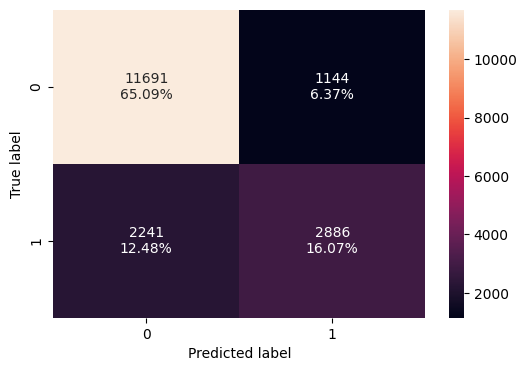

In [97]:
log_reg_model_train_perf = confusion_matrix_statsmodels(lg2, A_train2, B_train)
log_reg_model_train_perf

In [68]:
print("Training performance:")

Logistic_regression_model_train_2 = model_performance_classification_statsmodels(lg2, A_train2, B_train)

Logistic_regression_model_train_2

Training performance:


Accuracy  Recall  Precision      F1
0   0.81155 0.56290    0.71613 0.63034

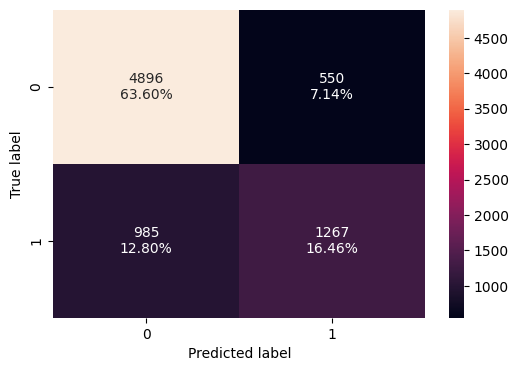

In [69]:
log_reg_model_test_perf = confusion_matrix_statsmodels(lg2, A_test2, B_test)

In [70]:
print("Test performance:")
Logistic_regression_model_test_2 = model_performance_classification_statsmodels(lg2, A_test2, B_test)
Logistic_regression_model_test_2

Test performance:


Accuracy  Recall  Precision      F1
0   0.80060 0.56261    0.69730 0.62276

- Model is good since the f1 scores between the training and test data is very close, model should be able to generalize on unseen data.

##Optimizing model performance(Logistics Regression)

####PRECISION-RECALL CURVE

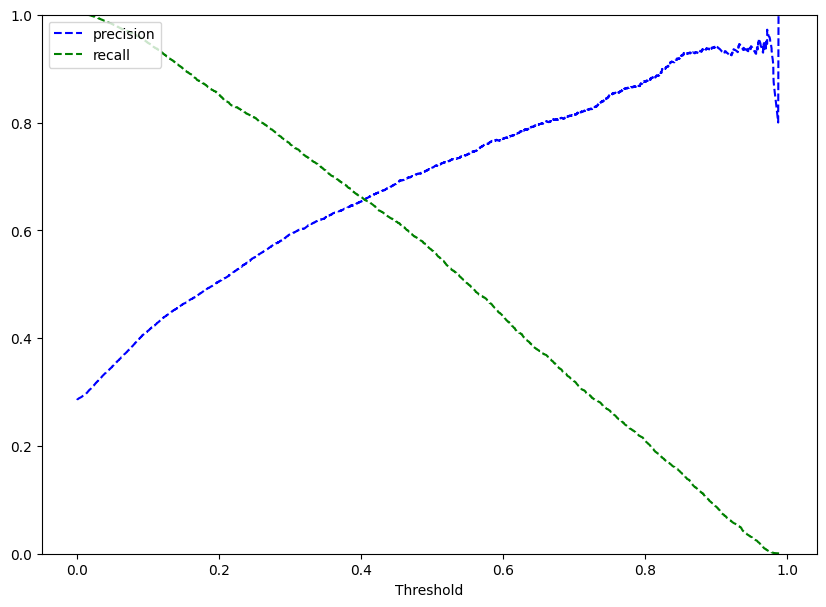

In [71]:
y_scores = lg2.predict(A_train2)
prec, rec, tre = precision_recall_curve(B_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At the threshold of 0.65 we get balanced precision and recall

In [83]:
# setting the threshold
optimal_threshold_curve = 0.64

**Checking model performance on training set**

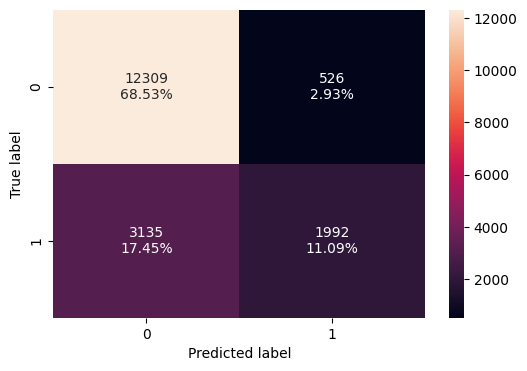

In [86]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, A_train2, B_train, threshold=optimal_threshold_curve)

In [104]:
Logistic_regression_model_train_3 = model_performance_classification_statsmodels(
    lg2, A_train2, B_train, threshold=optimal_threshold_curve
)
print("Training performance:")
Logistic_regression_model_train_3

Training performance:


Accuracy  Recall  Precision      F1
0   0.79618 0.38853    0.79110 0.52112

**Checking model performance on test data**

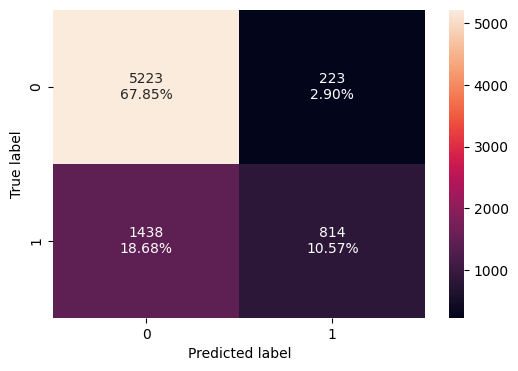

In [81]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, A_test2, y_test, threshold=optimal_threshold_curve)

In [105]:
Logistic_regression_model_test_3 = model_performance_classification_statsmodels(
    lg2, A_test2, B_test, threshold=optimal_threshold_curve
)
print("Test performance:")
Logistic_regression_model_test_3

Test performance:


Accuracy  Recall  Precision      F1
0   0.78748 0.38677    0.77353 0.51569

####Optimal threshold using AUC

checking performance on training set with AUC recommendation.

In [89]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(B_train, lg2.predict(A_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.29901073654427324


**Checking model performance on training set**

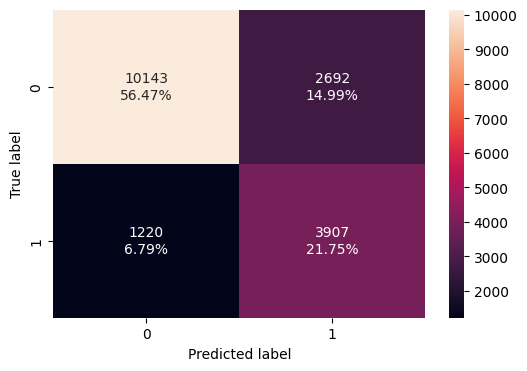

In [90]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, A_train2, B_train, threshold=optimal_threshold_auc_roc
)

In [106]:
# checking model performance for this model
Logistic_regression_model_train_4 = model_performance_classification_statsmodels(
    lg2, A_train2, B_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
Logistic_regression_model_train_4

Training performance:


Accuracy  Recall  Precision      F1
0   0.78221 0.76204    0.59206 0.66638

**Checking model performance on Test data.**

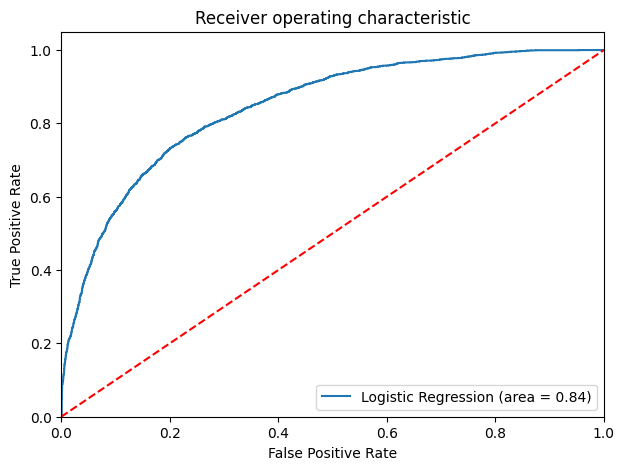

In [93]:
logit_roc_auc_train = roc_auc_score(B_test, lg2.predict(A_test2))
fpr, tpr, thresholds = roc_curve(B_test, lg2.predict(A_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

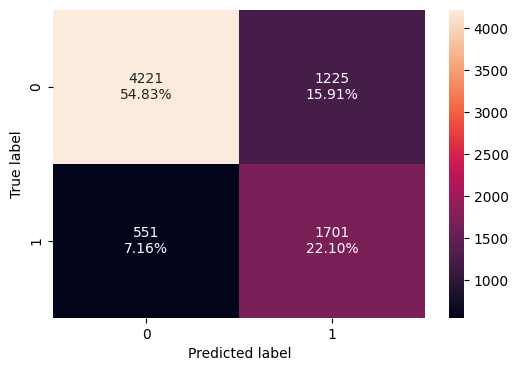

In [95]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, A_test2, B_test, threshold=optimal_threshold_auc_roc)

In [107]:
# checking model performance for this model
Logistic_regression_model_test_4 = model_performance_classification_statsmodels(
    lg2, A_test2, B_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
Logistic_regression_model_test_4

Test performance:


Accuracy  Recall  Precision      F1
0   0.76929 0.75533    0.58134 0.65701

## Final Logistic Regression Model Summary

In [108]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Logistic_regression_model_train_2 .T,
        Logistic_regression_model_test_3.T,
        Logistic_regression_model_train_4.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.64 Threshold",
    "Logistic Regression-0.29 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.81155   
Recall                                         0.56290   
Precision                                      0.71613   
F1                                             0.63034   

           Logistic Regression-0.64 Threshold  \
Accuracy                              0.78748   
Recall                                0.38677   
Precision                             0.77353   
F1                                    0.51569   

           Logistic Regression-0.29 Threshold  
Accuracy                              0.78221  
Recall                                0.76204  
Precision                             0.59206  
F1                                    0.66638

In [109]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        Logistic_regression_model_test_2.T,
        Logistic_regression_model_test_3.T,
        Logistic_regression_model_test_4.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.64 Threshold",
    "Logistic Regression-0.29 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80060   
Recall                                         0.56261   
Precision                                      0.69730   
F1                                             0.62276   

           Logistic Regression-0.64 Threshold  \
Accuracy                              0.78748   
Recall                                0.38677   
Precision                             0.77353   
F1                                    0.51569   

           Logistic Regression-0.29 Threshold  
Accuracy                              0.76929  
Recall                                0.75533  
Precision                             0.58134  
F1                                    0.65701

**Insight**

- The model bulit on Threshold gotten from the Precision - Reacal curve appear to perform the poorest with an F1 score of 0.51, eventhough it gas the best precision score.

#####**Final model coefficient interpretation**

**The final regression model selected uses a threshold of 0.29.**

In [171]:
# Set the threshold
threshold = 0.29

# Convert coefficients to odds
odds = np.exp(lg2.params)

# Filter coefficients that are above the threshold
significant_odds = odds[odds > threshold]

# Finding the percentage change for significant coefficients
perc_change_odds = (significant_odds - 1) * 100

# Create a DataFrame with significant coefficients
significant_coefficients_df = pd.DataFrame({"Odds": significant_odds, "Change_odd%": perc_change_odds}, index=A_train2.columns)

# Display the DataFrame
significant_coefficients_df.T

no_of_weekend_nights  no_of_week_nights  lead_time  arrival_year  \
Odds                      1.10149            1.08037    1.01651       0.99752   
Change_odd%              10.14875            8.03692    1.65079      -0.24843   

             arrival_month  avg_price_per_room  no_of_special_requests  \
Odds               0.95145             1.01866                     NaN   
Change_odd%       -4.85468             1.86632                     NaN   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.47979                         0.74036   
Change_odd%                        47.97938                       -25.96418   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.62762                         0.74699   
Change_odd%                       -37.23799                       -25.30128   

             market_segment_type_Corporate  market_segment_type_Online  
Odds                               3.55721                     8.86423  
Change_odd%                      255.72052                   786.42339

- Coefficient to odds on test data.

In [172]:
# Set the threshold
threshold = 0.29

# Convert coefficients to odds
odds = np.exp(lg2.params)

# Filter coefficients that are above the threshold
significant_odds = odds[odds > threshold]

# Finding the percentage change for significant coefficients
perc_change_odds = (significant_odds - 1) * 100

# Create a DataFrame with significant coefficients
significant_coefficients_df = pd.DataFrame({"Odds": significant_odds, "Change_odd%": perc_change_odds}, index=A_test2.columns)

# Display the DataFrame
significant_coefficients_df.T

no_of_weekend_nights  no_of_week_nights  lead_time  arrival_year  \
Odds                      1.10149            1.08037    1.01651       0.99752   
Change_odd%              10.14875            8.03692    1.65079      -0.24843   

             arrival_month  avg_price_per_room  no_of_special_requests  \
Odds               0.95145             1.01866                     NaN   
Change_odd%       -4.85468             1.86632                     NaN   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.47979                         0.74036   
Change_odd%                        47.97938                       -25.96418   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.62762                         0.74699   
Change_odd%                       -37.23799                       -25.30128   

             market_segment_type_Corporate  market_segment_type_Online  
Odds                               3.55721                     8.86423  
Change_odd%                      255.72052                   786.42339

**Interpretations**

From this model:

- The odds of booking cancellation increases by 10% if a client books at least one weekend night.
- The odds of booking cancellation increases by 8% if a client books at least one weekend night.
- The odds of booking cancellation increases by 47% if a guest does not select a meal plan.
- The odds of booking cancellation decreases by 25.9% if a guest select reserved room type 2
- The odds of booking cancellation decreases by 37% if a guest select reserved room type 5
- The odds of booking cancellation decreases by 25.9% if a guest select reserved room type 6
- The odds of booking cancellation increases by 255.7% if a guest's market segment is from the corparate world.
-  The odds of booking cancellation increases by 786.74 if a guest's makes booking from online.

## Building a Decision Tree model(Default)

- So I will be building my decision tree model using the X_train,Y_train and X_test and y_test data set.

In [112]:
#Building default decision tree
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

###Model Evaluation.

The metrics l I will be using to evaluate the performance of this model will be the Recall and F1 score. Recall, because making predictions bases on false negative will lead to generalizing on unseen data based on features that may affect people who do not cancel booking rather than those who actually cancelled booking,thus leading to further business losses. Also, Fi score gives a more balanced assessment of the performance of the model.


In [113]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [114]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

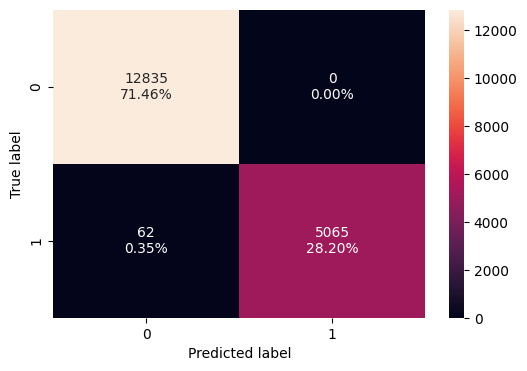

In [115]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [116]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.99655 0.98791    1.00000 0.99392

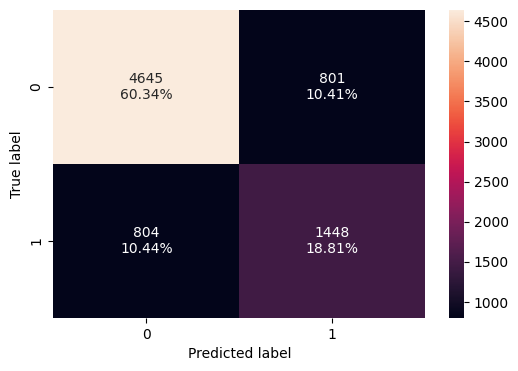

In [117]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [118]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.79150 0.64298    0.64384 0.64341

This model is not able to generalize well on unseen data because the gap between in the training and testing set in terms of Recall and F1 score is markedly large.

## Do we need to prune the tree?

- Prunning is required because The Default model's performance most importantly in precision and F1-score falls dramatically reducsd when tested with the test data, as compared with the training data, where as expected it performed very well.

###Decision Tree(with class_weights)

In [119]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

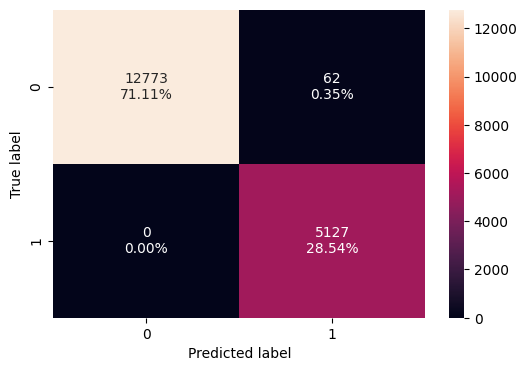

In [120]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [121]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99655 1.00000    0.98805 0.99399

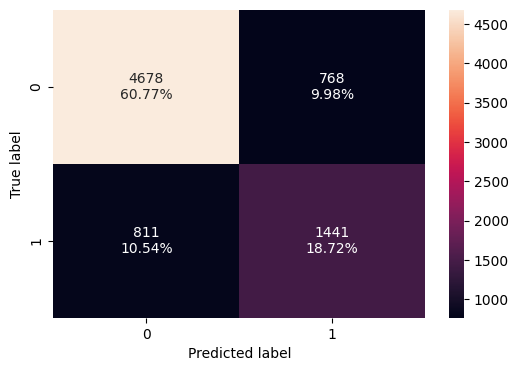

In [122]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [123]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.79488 0.63988    0.65233 0.64604

Like the default decision tree model,this model is not able to generalize well on unseen data because the gap between in the training and testing set in terms of Recall and F1 score is markedly large.

###Decision tree(Pre-prunning)

- I will use the Gridsearch function to get the best possible hyperparameter to tune the model.

In [124]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
model2 = estimator

# Fit the best algorithm to the data.
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

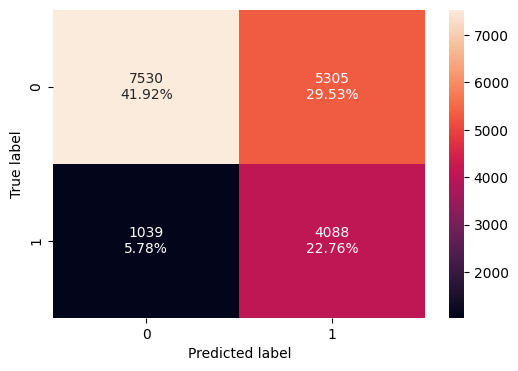

In [125]:
#Visualizing confusion matrix for training data
confusion_matrix_sklearn(model2, X_train, y_train)

In [126]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.64681 0.79735    0.43522 0.56309

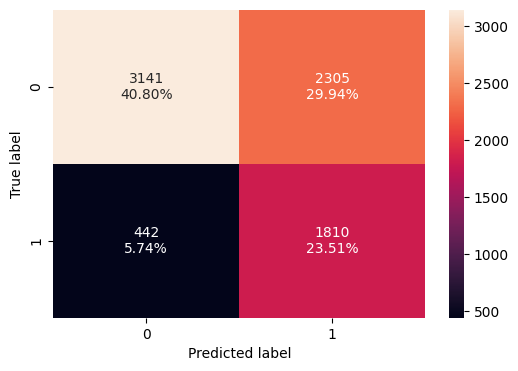

In [127]:
#Visualizing confusion matrix for test data
confusion_matrix_sklearn(model2, X_test, y_test)

In [128]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.64315 0.80373    0.43985 0.56856

* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.8 which shows that the model is able to generalize well on unseen data.

In [129]:
# Writing fubction to visualize decision tree built
feature_names = list(X_train.columns)
importances = model1.feature_importances_
indices = np.argsort(importances)

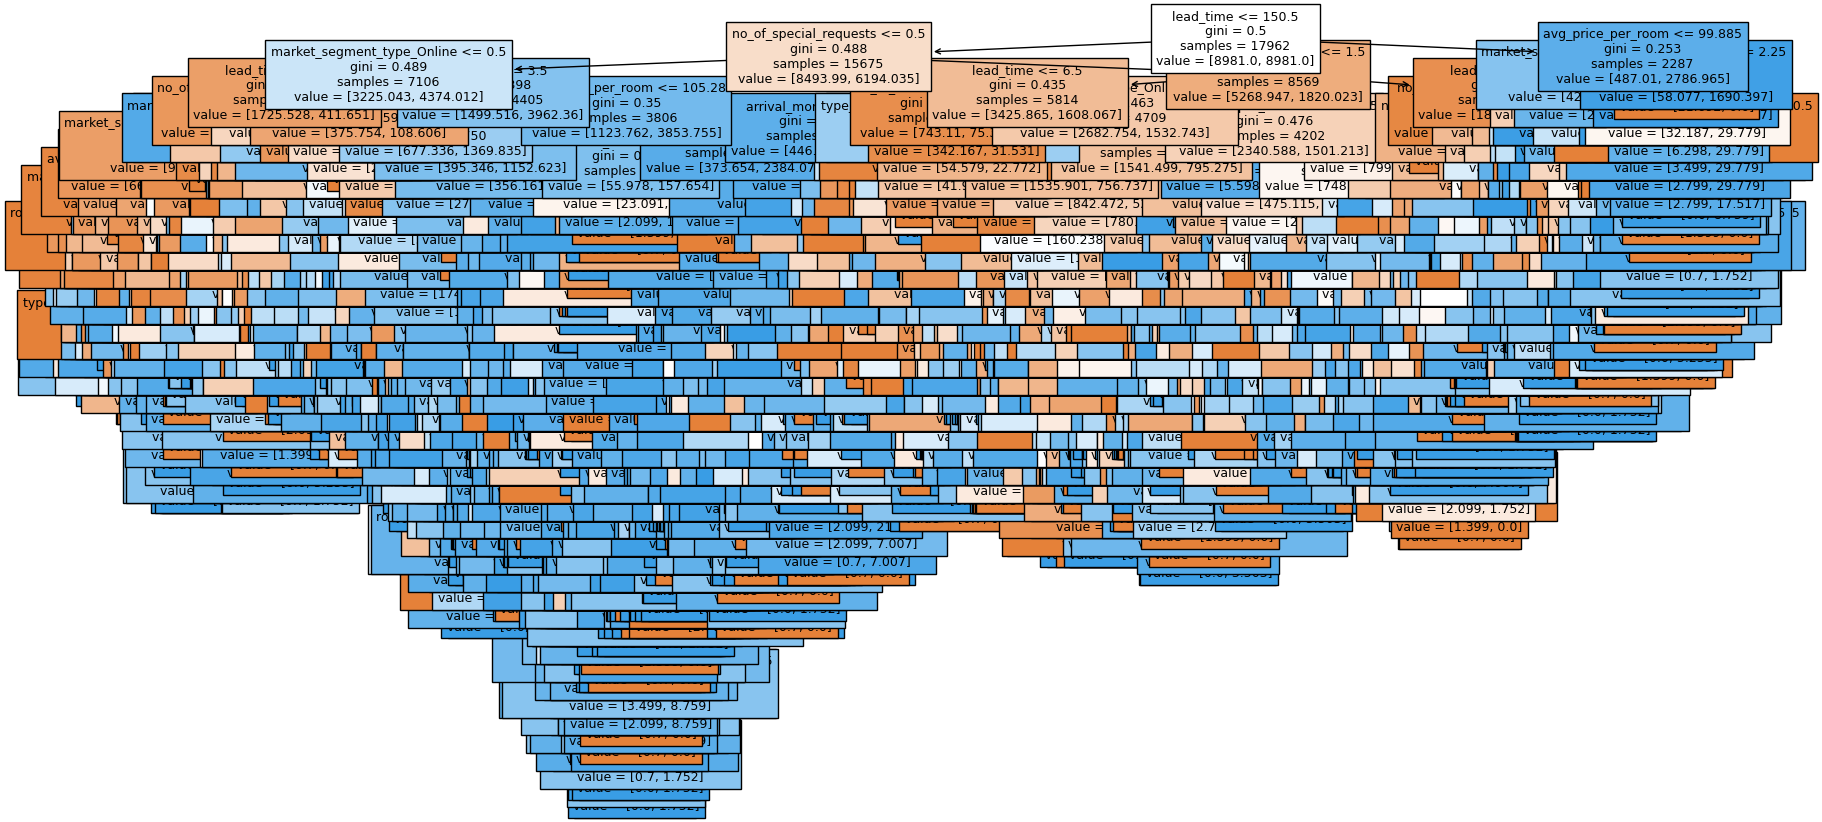

In [130]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [131]:
importances = model1.feature_importances_
importances

array([0.00000000e+00, 0.00000000e+00, 3.94350680e-02, 5.74059421e-02,
       0.00000000e+00, 3.15897423e-01, 0.00000000e+00, 7.92628968e-02,
       9.53611457e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.38250333e-01, 1.22261786e-01, 3.64648127e-03, 0.00000000e+00,
       1.18380955e-02, 2.74383483e-03, 0.00000000e+00, 1.24454264e-02,
       6.71302943e-04, 2.75637334e-03, 3.02490718e-04, 1.29826380e-04,
       1.44599624e-03, 8.18416572e-04, 1.15327162e-01])

In [132]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 178.44
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 91.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  91.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [247.00, 0.00] class: 0
|   |   |   |   |   |   |  

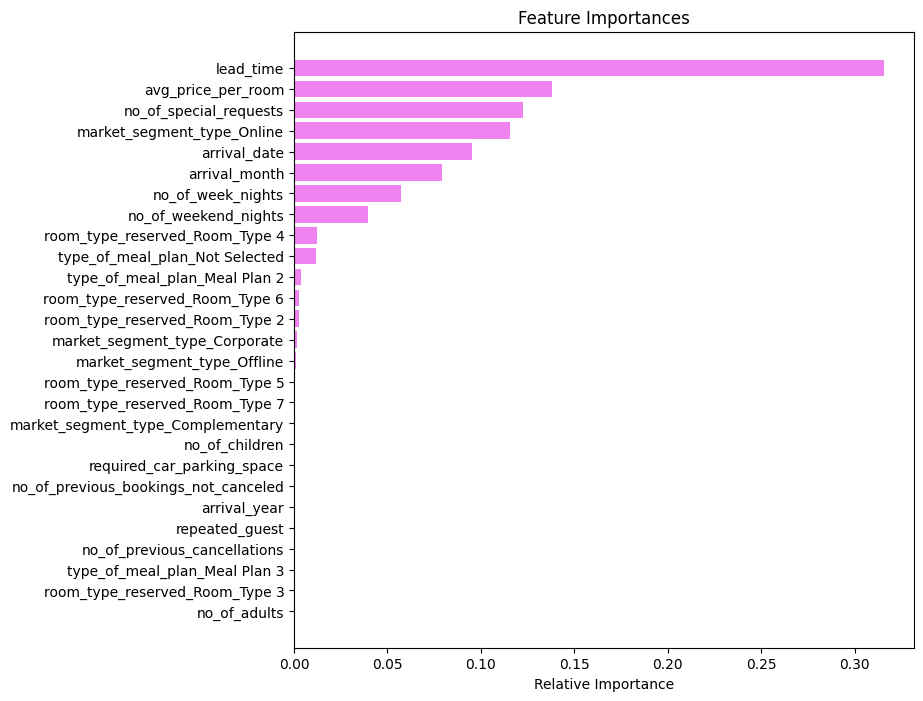

In [133]:
# importance of features in the tree building

importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree also, lead time, average price per romm,number of special requests,market segment type online,arrival date, arrival month,number of week nights,number of weekend nights,room type reserved type 4, type of meal plan not_not selecyed are the most important features.

###Decision tree(post prunning)

- I will be using the DecisionTreeClassifier function to get the ccp_alpha values of a fully grown tree. By using the most effective ccp_alpha which I will be getting from the DecisionTreeClassifier.cost_complexity_pruning_path function.

- i will get the most effective tree where impurities has been reduced to an acceptable level.The goal is to get the highest F1 score after each level of prunning.
- The nodes that have a weighted Gini cost that is less than ccp_alpha are removed. The higher the alpha the more the tree is pruned and the more the impurities in the tree.

In [134]:
# Define a Decision Tree Classifier with random state and class weight
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [135]:
# Print the entire path information (for exploration purposes)
pd.DataFrame(path)


ccp_alphas  impurities
0        0.00000     0.00345
1       -0.00000     0.00345
2       -0.00000     0.00345
3       -0.00000     0.00345
4       -0.00000     0.00345
...          ...         ...
1475     0.00563     0.33245
1476     0.00760     0.34005
1477     0.01487     0.35492
1478     0.04504     0.44500
1479     0.05500     0.50000

[1480 rows x 2 columns]

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [136]:
# List to store trained decision tree models
clfs = []
# Iterate over different alpha values obtained from pruning path
for ccp_alpha in ccp_alphas:
   # Create a new Decision Tree Classifier with current alpha and other parameters
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
      # Train the model on the training data
    clf.fit(X_train, y_train)
    # Append the trained model to the list
    clfs.append(clf)
    # Print information about the last model in the list
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05500091294910969


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

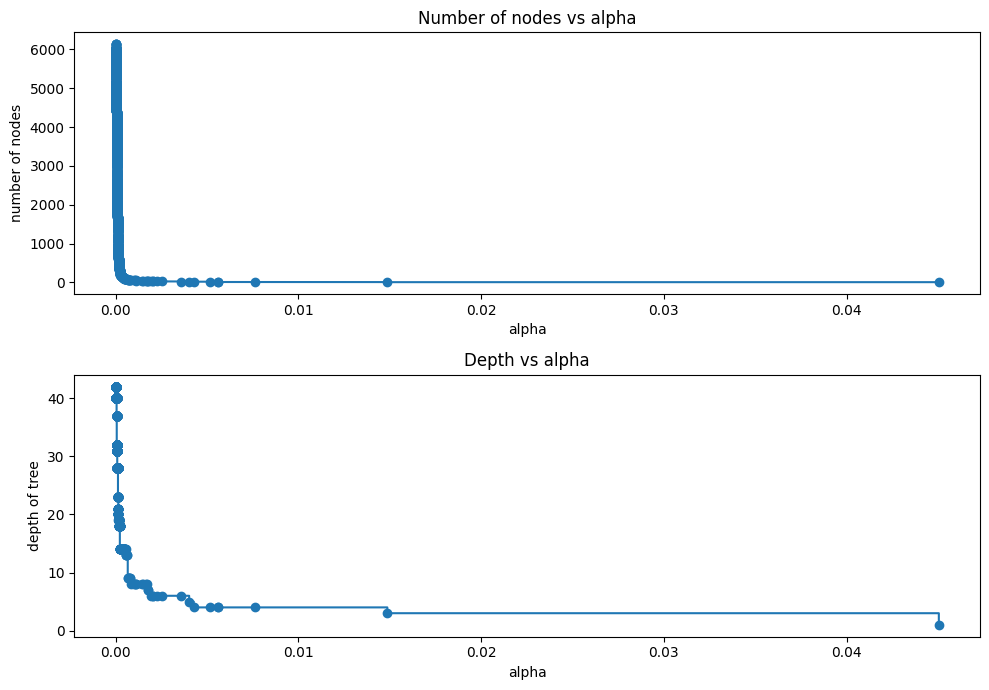

In [137]:
# Remove the last model from the list
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract number of nodes and depth for each model
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
# Plot number of nodes vs alpha
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
# Plot number of nodes vs alpha
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
# Adjust layout to prevent overlapping elements
fig.tight_layout()

In [138]:
# Lists to store recall scores for training and testing data
recall_train = []
recall_test = []
# Calculate recall score on training data for each model
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [139]:
# Calculate recall score on testing data for each model
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [140]:
# Lists to store accuracy scores for training and testing data
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [141]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
# Get the best model based on the index
best_model = clfs[index_best_model]
# Print details of the best model
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00023579767770967944,
                       class_weight='balanced', random_state=1)


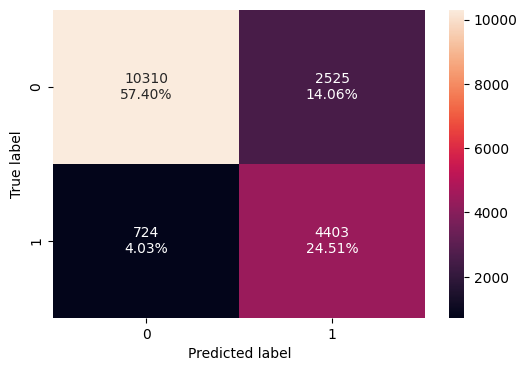

In [142]:
# Confusion matrix for the best model on training data
confusion_matrix_sklearn(best_model, X_train, y_train)

In [143]:
print("Test set performance:")
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Test set performance:


Accuracy  Recall  Precision      F1
0   0.81912 0.85879    0.63554 0.73049

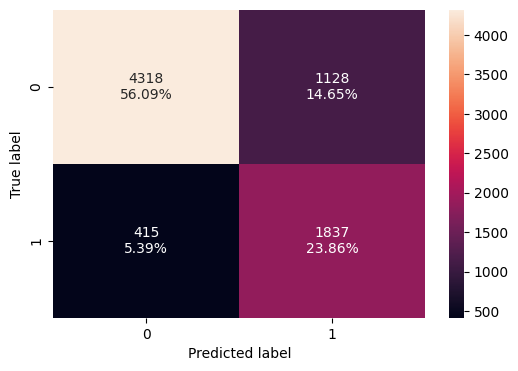

In [144]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [145]:
print("Test set performance:")
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Test set performance:


Accuracy  Recall  Precision      F1
0   0.79956 0.81572    0.61956 0.70424

* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.80, while best F1 score for training and test is around 0.7 .This shows that the model is able to generalize well on unseen data.

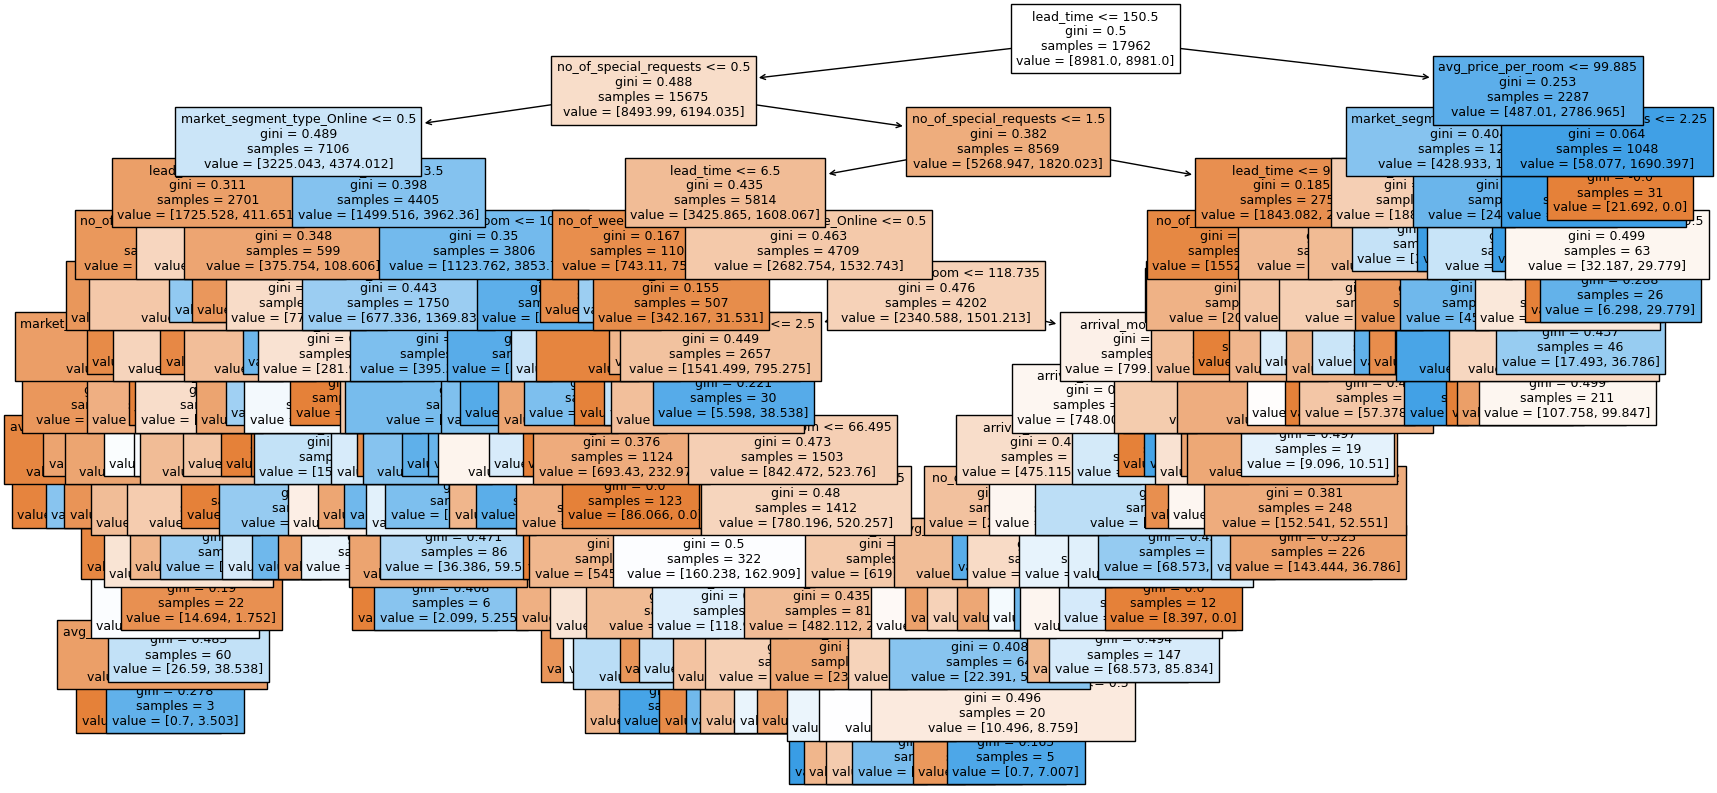

In [146]:
# Plotting image report showing the rules of a decision tree -
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [147]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 178.44
|   |   |   |   |   |   |   |   |   |--- weights: [285.49, 7.01] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  178.44
|   |   |   |   |   |   |   |   |   |--- weights: [2.10, 5.26] class: 1
|   |   |   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |   |   |--- weights: [376.45, 105.10] class: 0
|   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |--- lead_time <= 27.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 79.10
|   |   |   |   |   |   |   |

In [148]:
#identifying the most important features
importances = best_model.feature_importances_
indices = np.argsort(importances)

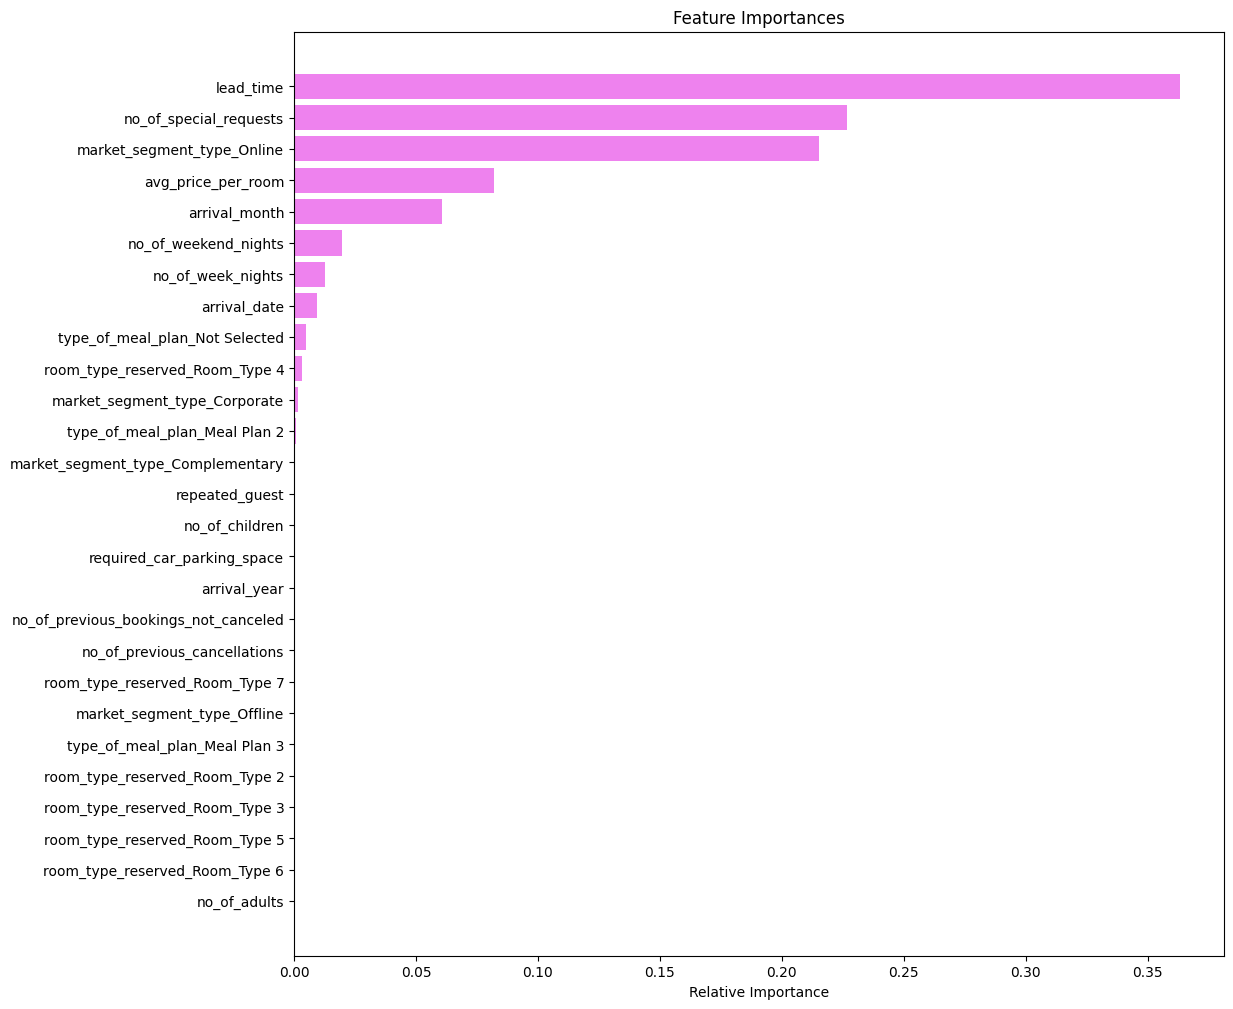

In [149]:
#Visualizing the most important features
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead Time,number of special requests, market segment type_online, average price per room, and arrival month are the top 5 most important features from the tree pruned.

## Model Performance Comparison(Decision tree)

###**Model performance comparisms**

In [160]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "decision_tree_post_train",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.99655   
Recall                                0.98791   
Precision                             1.00000   
F1                                    0.99392   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.99655                      0.64681   
Recall                             1.00000                      0.79735   
Precision                          0.98805                      0.43522   
F1                                 0.99399                      0.56309   

           decision_tree_post_train  
Accuracy                    0.81912  
Recall                      0.85879  
Precision                   0.63554  
F1                          0.73049

In [174]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "decision_tree_post_test"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.79150   
Recall                                0.64298   
Precision                             0.64384   
F1                                    0.64341   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.79488                      0.64315   
Recall                             0.63988                      0.80373   
Precision                          0.65233                      0.43985   
F1                                 0.64604                      0.56856   

           decision_tree_post_test  
Accuracy                   0.79956  
Recall                     0.81572  
Precision                  0.61956  
F1                         0.70424

All the models here with the exception of Decision Tree without class weight and the one with default class weight perfor very well and can generalize well with unseen data.

However, the decision_tree_post_test is the best and will be selected becuase it has the best F1 score, as well as, Recall score on testing data.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

####Final model performance selection.

In [161]:
#Assigning variable name to the best decision tree model
Final_decision_Tree_model = best_model

In [162]:
#Assigning a variable name to the best logistic regression model
Final_Regression_model = Logistic_regression_model_train_4

In [163]:
# training performance comparison


Final_models_train_comp = pd.concat(
    [
        decision_tree_post_perf_train.T,Logistic_regression_model_train_4.T
    ],
    axis=1,
)
Final_models_train_comp.columns = [

    "Decision Tree (Post-Pruning)", "Logistic_regression_model_train_4"
]
print("Training performance comparison:")
Final_models_train_comp

Training performance comparison:


Decision Tree (Post-Pruning)  Logistic_regression_model_train_4
Accuracy                        0.81912                            0.78221
Recall                          0.85879                            0.76204
Precision                       0.63554                            0.59206
F1                              0.73049                            0.66638

In [164]:
# testing performance comparison


Final_models_test_comp = pd.concat(
    [
        decision_tree_post_test.T,Logistic_regression_model_test_4.T
    ],
    axis=1,
)
Final_models_test_comp.columns = [

    "decision_tree_post_test", "Logistic_regression_model_test_2"
]
print("Test performance comparison:")
Final_models_test_comp

Test performance comparison:


decision_tree_post_test  Logistic_regression_model_test_2
Accuracy                   0.79956                           0.76929
Recall                     0.81572                           0.75533
Precision                  0.61956                           0.58134
F1                         0.70424                           0.65701

- The decision tree model will be selected becuase it has better F1 scored when compared to the final logistic regression model F1 score.

###Final model prediction and insights

So I will be assigning the best model selected as my final model, then make predictions based on the model.

In [165]:
# Assighning best model selected to to final model variable.
final_model = Final_decision_Tree_model


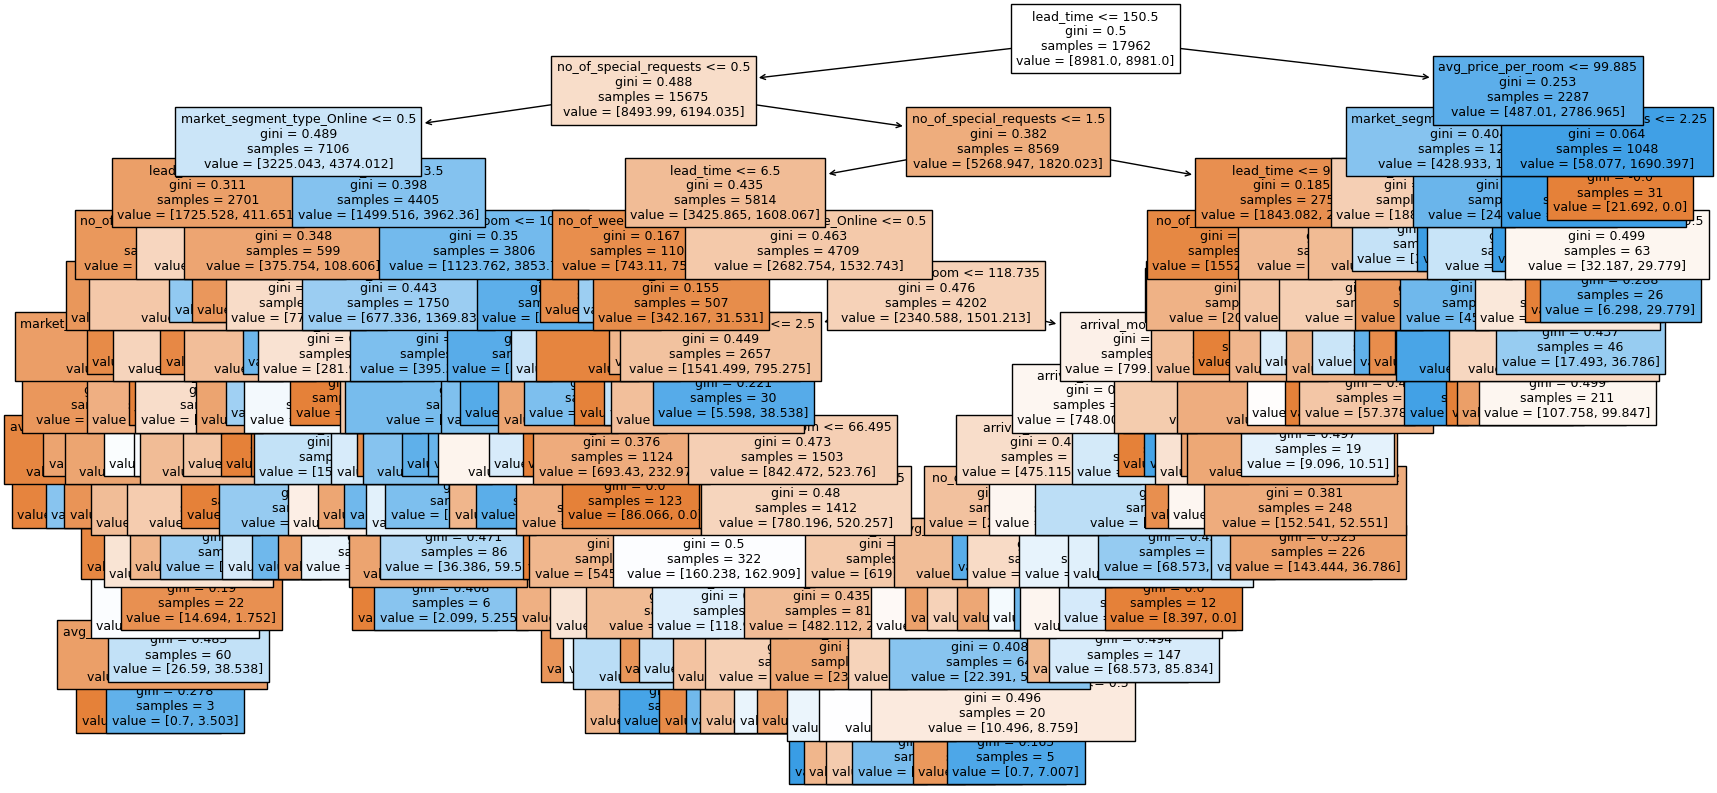

In [166]:
# Plotting image report showing the rules of final model decision tree -
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    final_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [167]:
# Text report showing the rules of final model decision tree -

print(tree.export_text(final_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 178.44
|   |   |   |   |   |   |   |   |   |--- weights: [285.49, 7.01] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  178.44
|   |   |   |   |   |   |   |   |   |--- weights: [2.10, 5.26] class: 1
|   |   |   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |   |   |--- weights: [376.45, 105.10] class: 0
|   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |--- lead_time <= 27.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 79.10
|   |   |   |   |   |   |   |

In [168]:
#identifying the most important features in the final model
importances = final_model.feature_importances_
indices = np.argsort(importances)

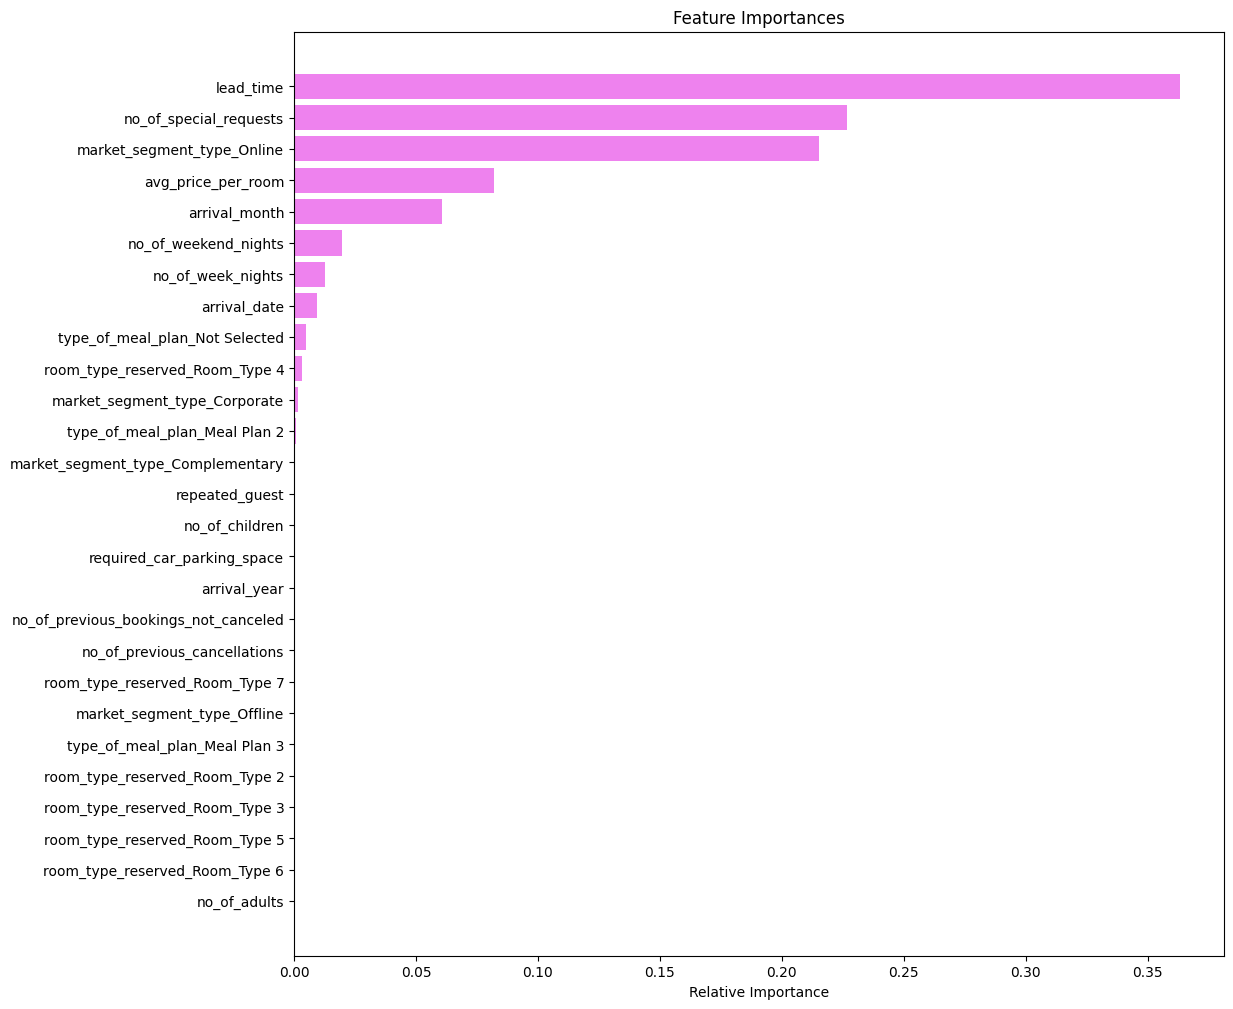

In [169]:
#Visualizing the most important features in the final model
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

###**Intepretation of Prediction and insights**

- There are chances of booking cancellation with lead time over 150 days(5 months). Five months is a long time to make any booking. During this period, average cost of rooms might have reduced thus the need to rebook, or the guest needs might have been overtaken by events,thus the guest may not have any need for the booking anymore.

- Guest with at least 1 special request are more likely to cancel bookings. This may like be due to such services included in the special request by the customer not provided by the hotel.

- Guests whose bookings were made online are more likely to cancel them. The ease to cancel bookings online and even the anonymity associated with online booking may be the reason for this phenomenon. Another possibility could be that the there are not enough enticing elements on the hotel webpage compared to competitiors to keep the guest interested in the hotel.

- Bookings with average room prices equal over 100 Euros are likely to cancel bookings. This may be due to the customers finding more bargain deals from competing hotel at same price range or lesser.

- Guest who book beyond September are have a higher chance of cancelling their bookings before checking-in. Beyond September, it is observed that demand for hotel rooms drop, thus guest usually have the luxury picking the best bargains across different hotels who may have discounts to attract guest due to reduced demand.

- Guess who do not have meal plan selected are more likely to cancel bookings. These category of guest are likely who do not have their stay previously planned and thus may likly cancel at any point especially if they get better deals from other hotels.

- Guest who book less than four weekend nights are least likely to cancel their bookings. These group of guest may have had their stay all planned out and may have done their research about the hotel before booking,hence their least likelihood of cancelling. These may include travellers or even holiday-fun seekers.

###Recommendations

1. The penalty fees for booking cancellation with lead times over 5 month should be increased to level that serves as a deterent for cancellation.It should carry the highest cancellation charge especially if they were suppose to check-in during the months of July,August, and September which are the peak moanths for guest arriving into the hotel, and may lead to financial loss to the hotel.

2. The hotel should ensure that the number of additional services offered is increased to a level that it could compete or even surpass other hotels in the same city.

3. The hotels webpage should be refreshed to be more intutive and attractive to guest. The page should be able to showcase all the services it offers in such a way the guest can easily know about. it should also have a dedicated 24 customer service chat or help desk where the guest can make inquiries(could be AI-powered).Regular discounts should be regularly posted on the webpage. The hotel should regularly send out mails about its latest discounts to those who enter their email on the landing page, as well as, old customers.

4. The hotel should review quality of services and rooms they offer 100 Euros or above to match or even surpass what competing hotels in city offer. They should have better deal for this price range.


5. More deals and discounts should be rolled out during months of October, November, December.

6. A campaign or investigation by the hotel to identify the most popular factors that drive holiday-ssekers and long-term guest to hotels in the city should be done. This may involve collaborating with travel agencies to collect more data about these category of people, or even through online polls. When these factors are identified, they should incorparated into the hotels strategic plans to attract guest to their hotel.

7. Further information like demographic data, sex, occupation, and purpose of visit will be needed to get more insights about the factors around booking cancellations in the hotel.

8. Further data should also include more repeat clients to get a more rounded insight, the few that was included in this data set were actually duplicates thus were cleared during pre processing.

9. Online booking should attract 2% percent cancellation charges for the initial booking cost,while refunds should take 2 weeks to process. Then 4 weeks refund cool-off period should  apply for those with lead times over 5 months, while their cancellation charge should be up to 5% of booking cost.